<a href="https://colab.research.google.com/github/DtotheS/AI-in-the-wild/blob/main/src/sport_participation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn

# from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.animation as animation


# Allow Korean in img
plt.rcParams['font.family'] = 'AppleGothic'  # Use 'Nanum Gothic' on Linux/Mac
plt.rcParams['axes.unicode_minus'] = False  # Fix issue with negative signs

In [ ]:
# # linking to my google drive

# drive.mount('/content/drive')

In [4]:
%cd ./DtotheS/sport_analytics/dr_oh/sports_survey
%pwd

/Users/agathos/DtotheS/sport_analytics/dr_oh/sports_survey


'/Users/agathos/DtotheS/sport_analytics/dr_oh/sports_survey'

# 2023 Preliminary EDA

In [ ]:
# Use read_excel for .xlsx files
df = pd.read_excel('data/2023 국민생활체육참여실태조사 rawdata.xlsx', header=2)

In [ ]:
df.head()

In [ ]:
# Assuming 'Q16' is a column name in your DataFrame 'df'
part_count = df[df['Q16'] != 1]['Q16'].count()
notpart_count = df[df['Q16'] == 1]['Q16'].count()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
for ind, cnt in zip(df.isnull().sum().index,df.isnull().sum()):
    print(ind,' ',cnt)

In [ ]:
part_count = df[df['Q16'] != 1]['Q16'].count()
notpart_count = df[df['Q16'] == 1]['Q16'].count()

In [ ]:
# prompt: bar plots for part_count vs. notpart_count, with data label and percentage

import matplotlib.pyplot as plt

# Data
labels = ['Participant', 'Non-Participant']
counts = [part_count, notpart_count]
percentages = [f'{count / sum(counts) * 100:.1f}%' for count in counts]

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
bars = plt.bar(labels, counts, color=['skyblue', 'lightcoral'])

# Add data labels and percentages above the bars
for bar, percentage in zip(bars, percentages):
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}({percentage})', ha='center', va='bottom')


plt.xlabel('Sport Participation Status (Q16)')
plt.ylabel('Count')
plt.title('Participation Status Counts')
plt.show()

In [ ]:
part_df = df[df['Q16'] != 1]
nonpart_df = df[df['Q16'] == 1]

In [ ]:
# prompt: average of column 'Q1' between part_df vs. nonpart_df

# Calculate the average of 'Q1' for participants and non-participants
avg_q1_part = part_df['Q1'].mean()
avg_q1_notpart = nonpart_df['Q1'].mean()

print(f"Average of 'Q1' for participants: {avg_q1_part}")
print(f"Average of 'Q1' for non-participants: {avg_q1_notpart}")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dist(column_name):
    plt.figure(figsize=(12, 6))

    # Plot for participants
    plt.subplot(1, 2, 1)
    ax1 = sns.countplot(x=column_name, data=part_df)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column_name} (Participants)')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    # Adding data labels with percentage values for participants
    total_part = len(part_df)
    for p in ax1.patches:
        percentage = f'{100 * p.get_height() / total_part:.1f}%'
        ax1.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom')

    # Plot for non-participants
    plt.subplot(1, 2, 2)
    ax2 = sns.countplot(x=column_name, data=nonpart_df)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column_name} (Non-Participants)')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

    # Adding data labels with percentage values for non-participants
    total_nonpart = len(nonpart_df)
    for p in ax2.patches:
        percentage = f'{100 * p.get_height() / total_nonpart:.1f}%'
        ax2.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom')

    # Set the y-axis range to match for both plots
    max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
    ax1.set_ylim(0, max_y)
    ax2.set_ylim(0, max_y)

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_dist('Q1')  # Replace 'Q1' with the column you want to analyze



In [ ]:
plot_dist('Q1')

In [ ]:
plot_dist('Q2')

In [ ]:
plot_dist('Q3')

In [ ]:
plot_dist('Q4')

In [ ]:
plot_dist('Q6')

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# # If you're using macOS
plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['font.family'] = 'NanumGothic'
# # Preventing minus sign issues
# plt.rcParams['axes.unicode_minus'] = False
# print(plt.rcParams['font.family'])

In [ ]:
plot_dist('Q7')

In [ ]:
# prompt: part_df, sort by frequency of Q17_1_1, show top 10

# Sort part_df by the frequency of 'Q17_1_1' and display the top 10
top_10_q17 = part_df['Q17_1_1'].value_counts().nlargest(10)
top_10_q17

In [ ]:
# prompt: translate korean of translate korean of set(df['XA17011']) in English

print(set(df['XA17011']))
# Creating a dictionary with Korean elements and their English translations
translations = {
    '점핑': 'Jumping',
    '탁구': 'Table Tennis',
    '스노우보드, 스키': 'Snowboarding, Skiing',
    '태권도': 'Taekwondo',
    '체조(맨손체조, 생활체조)': 'Gymnastics (Free Gymnastics, Recreational Gymnastics)',
    '마을회관운동': 'Community Center Exercise',
    '훌라후프': 'Hula Hoop',
    '야구': 'Baseball',
    '빙상(아이스하키, 스케이팅 포함)': 'Ice Sports (including Ice Hockey, Skating)',
    '볼링': 'Bowling',
    '게이트볼': 'Gateball',
    '댄스스포츠': 'Dance Sports',
    '아쿠아로빅, 수중발레': 'Aquarobics, Water Ballet',
    '수상스키, 웨이크보드, 윈드서핑': 'Water Skiing, Wakeboarding, Windsurfing',
    '배구': 'Volleyball',
    '스쿼시': 'Squash',
    '테니스': 'Tennis',
    '아파트내운동기구': 'Apartment Gym Equipment',
    '골프(그라운드, 파크 포함)': 'Golf (including Ground Golf, Park Golf)',
    '수영': 'Swimming',
    '플로어볼': 'Floorball',
    '레슬링': 'Wrestling',
    '야외간이운동기구': 'Outdoor Exercise Equipment',
    '마라톤': 'Marathon',
    '래프팅': 'Rafting',
    '승마': 'Horse Riding',
    '항공레저(스카이다이빙, 패러글라이딩, 행글라이더 등)': 'Aerial Leisure (Skydiving, Paragliding, Hang Gliding, etc.)',
    '족구': 'Foot Volleyball',
    '낚시': 'Fishing',
    '검도': 'Kendo',
    '격투기(킥복싱, 이종격투기)': 'Martial Arts (Kickboxing, Mixed Martial Arts)',
    '인라인하키, 필드하키': 'Inline Hockey, Field Hockey',
    '사격': 'Shooting',
    '육상(걷기, 마라톤 제외)': 'Track and Field (excluding Walking, Marathon)',
    '유도': 'Judo',
    '근력운동': 'Strength Training',
    '럭비, 미식축구': 'Rugby, American Football',
    '배드민턴': 'Badminton',
    '방송댄스': 'Broadcast Dance',
    '걷기(조깅, 속보)': 'Walking (Jogging, Speed Walking)',
    '공원운동기구': 'Park Exercise Equipment',
    '무도(유도, 검도, 태권도 제외)': 'Martial Arts (excluding Judo, Kendo, Taekwondo)',
    '보디빌딩(헬스)': 'Bodybuilding (Fitness)',
    '인라인스케이트': 'Inline Skating',
    '폴댄스': 'Pole Dance',
    '핸드볼': 'Handball',
    '소프트볼': 'Softball',
    '축구, 풋살': 'Soccer, Futsal',
    '권투': 'Boxing',
    'k팝댄스': 'K-pop Dance',
    '줄넘기': 'Jump Rope',
    '야외운동기구': 'Outdoor Exercise Equipment',
    '에어로빅': 'Aerobics',
    '라켓볼': 'Racquetball',
    '자전거, 사이클, 산악자전거': 'Bicycling, Cycling, Mountain Biking',
    '요가, 필라테스, 태보': 'Yoga, Pilates, Tae Bo',
    '당구, 포켓볼': 'Billiards, Pool',
    '암벽등반': 'Rock Climbing',
    '등산': 'Hiking',
    '농구': 'Basketball'
    # float('nan'): 'NaN'  # Handling NaN values if needed
}

In [ ]:
# Example usage: translating each unique element in the set
df['XA17011_translated'] = df['XA17011'].map(translations)

# Printing the translated elements
print(df['XA17011_translated'])


In [ ]:
print(df['XA17011'].isnull().sum())
print(df['XA17011_translated'].isnull().sum())

In [ ]:
# Count the frequency of each activity
activity_counts = df['XA17011_translated'].value_counts().head(10)

# Calculate percentages
total = activity_counts.sum()
percentages = (activity_counts / total) * 100

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(activity_counts.index, activity_counts.values)

# Add data labels with percentages
for bar, percentage in zip(bars, percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{percentage:.1f}%',
        ha='center',
        va='bottom'
    )

plt.title('Top 10 Activities in XA17011_translated')
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', wrap=True)
plt.tight_layout()
plt.show()

In [ ]:
!pwd

# Read all data and store to dic

In [48]:
import pandas as pd
import os

# Path to the folder containing the Excel files
data_folder = "data"

# Generate a list of file names for 2012 to 2023
file_list = [os.path.join(data_folder, f'{year}rawdata.xlsx') for year in range(2012, 2024)]

# Dictionary to store DataFrames for each sheet in each file
data_dict = {}

# Iterate through each file
for file in file_list:
    # Load the Excel file
    xl = pd.ExcelFile(file)
    print(f"{file}: {xl.sheet_names}")  # Print the sheet names for reference

    # Iterate through each sheet in the file
    for sheet in xl.sheet_names:
        # Create a key for the dictionary with the format 'Year_SheetName'
        year = os.path.basename(file).split('rawdata')[0]  # Extract the year from the filename
        key = f'{year}_{sheet}'
        # Read the sheet into a DataFrame and store it in the dictionary
        data_dict[key] = pd.read_excel(xl, sheet_name=sheet)

data/2012rawdata.xlsx: ['Data']
data/2013rawdata.xlsx: ['Sheet1']
data/2014rawdata.xlsx: ['2014 국민생활체육참여실태조사 rawdata']
data/2015rawdata.xlsx: ['2015 국민생활체육참여실태조사 rawdata']
data/2016rawdata.xlsx: ['Sheet1']
data/2017rawdata.xlsx: ['Sheet1']
data/2018rawdata.xlsx: ['2018 국민생활체육 참여실태조사 원자료', '항목정의서', '코드정의서']
data/2019rawdata.xlsx: ['DATA', 'DATA(변수값)', '변수설명', 'CODEBOOK']
data/2020rawdata.xlsx: ['DATA', 'DATA(변수값)', '변수가이드', '코드정의서']
data/2021rawdata.xlsx: ['DATA', 'DATA(값)', '변수']
data/2022rawdata.xlsx: ['DATA', 'DATA(값)', '변수']
data/2023rawdata.xlsx: ['DATA_2023']


In [49]:
data_dict.keys()

dict_keys(['2012_Data', '2013_Sheet1', '2014_2014 국민생활체육참여실태조사 rawdata', '2015_2015 국민생활체육참여실태조사 rawdata', '2016_Sheet1', '2017_Sheet1', '2018_2018 국민생활체육 참여실태조사 원자료', '2018_항목정의서', '2018_코드정의서', '2019_DATA', '2019_DATA(변수값)', '2019_변수설명', '2019_CODEBOOK', '2020_DATA', '2020_DATA(변수값)', '2020_변수가이드', '2020_코드정의서', '2021_DATA', '2021_DATA(값)', '2021_변수', '2022_DATA', '2022_DATA(값)', '2022_변수', '2023_DATA_2023'])

In [ ]:
# Save the dictionary to a pickle file
with open('data_dict.pkl', 'wb') as f:
    pickle.dump(data_dict, f)

print("Dictionary has been stored in 'data_dict.pkl'.")

In [50]:
# Load the dictionary from a pickle file
with open('data_dict.pkl', 'rb') as f:
    data_dict = pickle.load(f)

print("Dictionary has been loaded from 'data_dict.pkl'.")

Dictionary has been loaded from 'data_dict.pkl'.


In [51]:
def add_rows(df, foo):
    df = pd.concat([df, foo], ignore_index=True)
    return df

# Preprocess each year's data

## 2023 Data Preprocessing

In [ ]:
data_dict['2023_DATA_2023'].iloc[:10,120:140]

In [ ]:
col_li=[0,3,5,8,120,121,122]
foo2023 = data_dict['2023_DATA_2023'].iloc[2:,col_li]
foo2023['data_year'] = 2023
foo2023

In [ ]:
col_name = ['id','area1','gender','age','sport_part','sport1','sport1_kor','data_year']

In [ ]:
df = pd.DataFrame(columns=col_name)

In [ ]:
foo2023.columns = col_name

In [ ]:
df = pd.concat([df, foo2023], ignore_index=True)

In [ ]:
df

## 2022



In [ ]:
data_dict.keys()

In [ ]:
data_dict['2022_DATA(값)'].iloc[:10,109:120]

In [ ]:
data_dict['2022_DATA(값)'].iloc[:10,[0,1,5,8,109,110]]

In [ ]:
data_dict['2022_DATA'].iloc[:10,[0,1,5,8,109,110]]

In [ ]:
foo2022 = pd.DataFrame()

In [ ]:
foo2022

In [ ]:
foo2022 = data_dict['2022_DATA'].iloc[:,[0,1,5,8,109,110]]

In [ ]:
foo2022['▣ 지역'] = data_dict['2022_DATA(값)'].iloc[:,1]

In [ ]:
foo2022 = foo2022[1:]

In [ ]:
foo2022

In [ ]:
foo2022['sport1_kor'] = data_dict['2022_DATA(값)'].iloc[:,110]

In [ ]:
foo2022['data_year'] = 2022

In [ ]:
foo2022.columns = col_name

In [ ]:
# Data Error. 408 : 요가, 필라테스, 태보 // 402 : 걷기(조깅, 속보) & duplicated id: 50765 => remove these two
foo2022[foo2022['id'] == 50765]

In [ ]:
foo2022 = foo2022[foo2022['id'] != 50765]

In [ ]:
df = pd.concat([df, foo2022], ignore_index=True)

In [ ]:
df

In [ ]:
# df[(df['data_year'] == 2022) & (df['sport1'].isna())]

## 2021

In [ ]:
foo2021 = data_dict['2021_DATA'].iloc[:,[0,2,5,8,103,104]]

In [ ]:
foo2021['sport1_kor'] = data_dict['2021_DATA(값)'].iloc[:,104]

In [ ]:
foo2021['data_year'] = 2021

In [ ]:
foo2021 = foo2021[1:]

In [ ]:
foo2021.columns = col_name

In [ ]:
df = pd.concat([df, foo2021], ignore_index=True)

In [ ]:
df['area1'][18000:] = data_dict['2021_DATA(값)'].iloc[1:,2].values

In [ ]:
df['area1'][18000:]

In [ ]:
df

## 2020

In [ ]:
data_dict.keys()

In [ ]:
data_dict['2020_DATA(변수값)'].iloc[:,208:210]

In [ ]:
data_dict['2020_DATA'].iloc[:,[0,4,7,9,208,209]]

In [ ]:
foo2020 = data_dict['2020_DATA'].iloc[:,[0,4,7,9,208,209]]

In [ ]:
foo2020

In [ ]:
data_dict['2020_DATA(변수값)'].iloc[:,209]

In [ ]:
foo2020['sport1_kor'] = data_dict['2020_DATA(변수값)'].iloc[:,209]

In [ ]:
foo2020['dyear'] = 2020

In [ ]:
foo2020 = foo2020[1:]

In [ ]:
foo2020.columns = col_name

In [ ]:
foo2020

In [ ]:
df = add_rows(df,foo2020)

In [ ]:
df

## 2019

In [ ]:
data_dict.keys()

In [ ]:
data_dict['2019_DATA'].iloc[:,114:116]

In [ ]:
data_dict['2019_DATA'].iloc[:,[0,2,7,9,114,115]]

In [ ]:
foo2019 = data_dict['2019_DATA'].iloc[:,[0,2,7,9,114,115]]

In [ ]:
data_dict['2019_DATA(변수값)'].iloc[:,115]

In [ ]:
foo2019['sport1_kor'] = data_dict['2019_DATA(변수값)'].iloc[:,115]

In [ ]:
foo2019['dyear'] = 2019

In [ ]:
foo2019

In [ ]:
foo2019.columns = col_name

In [ ]:
foo2019 = foo2019[1:]

In [ ]:
foo2019

In [ ]:
df = add_rows(df,foo2019)

In [ ]:
df

## 2018

In [ ]:
data_dict.keys()

In [ ]:
data_dict['2018_2018 국민생활체육 참여실태조사 원자료'].iloc[:,325:]

In [ ]:
foo2018 = data_dict['2018_2018 국민생활체육 참여실태조사 원자료'].iloc[:,[0,423,421,422,325,326]]

In [ ]:
foo2018.columns = col_name[:6]

In [ ]:
foo2018

In [ ]:
# Create the mapping dictionary
sport_mapping = {
    101: "게이트볼", 102: "골프", 103: "농구", 104: "배구", 105: "럭비, 미식축구", 106: "축구, 풋살",
    107: "족구", 108: "핸드볼", 109: "야구", 110: "소프트볼", 111: "수구", 112: "당구, 포켓볼",
    113: "볼링", 114: "인라인 하키, 필드하키", 115: "라켓볼", 116: "테니스", 117: "배드민턴", 118: "스쿼시",
    119: "정구", 120: "탁구", 121: "구기및 라켓류 그외 종목", 201: "유도", 202: "검도", 203: "태권도",
    204: "무도", 205: "격투기", 206: "레슬링", 207: "권투", 208: "펜싱", 209: "무도/ 격투기 그외 종목",
    301: "석궁, 양궁, 국궁", 302: "씨름", 303: "민속 스포츠 그외 종목", 401: "마라톤", 402: "걷기",
    403: "육상", 404: "보디빌딩", 405: "수영", 406: "아쿠아 로빅, 수중발레", 407: "에어로빅",
    408: "요가, 필라테스 ,태보", 409: "댄스 스포츠", 410: "자전거, 사이클, 산악 자전거", 411: "줄넘기",
    412: "체조", 413: "훌라후프", 414: "체력단련 및 생활운동 그외 종목", 501: "빙상", 502: "사격",
    503: "서바이벌", 504: "스노우 보드, 스키", 505: "승마", 506: "암벽등반", 507: "인라인 스케이트",
    508: "트라이 애스론", 509: "항공레저", 510: "래프팅", 511: "수상스키 ,웨이크 보드, 윈드서핑",
    512: "스킨 스쿠버", 513: "카누", 514: "요트", 515: "레저 스포츠 그외 종목", 601: "등산",
    602: "낚시", 603: "기타 스포츠 그외 종목", 9998: "없다", 9999: "모름/ 무응답"
}

# Assign values
foo2018['sport1_kor'] = foo2018['sport1'].apply(lambda x: sport_mapping.get(x, "Unknown") if pd.notna(x) else np.nan)

In [ ]:
# Verify
print(foo2018['sport1'].isna().sum() == foo2018['sport1_kor'].isna().sum())
print((foo2018['sport1_kor'] == 'Unknown').sum()) #1 for the first line

In [ ]:
foo2018['data_year'] = 2018

In [ ]:
foo2018 = foo2018[1:]

In [ ]:
foo2018

In [ ]:
df = add_rows(df,foo2018)

In [ ]:
df.to_csv('output2018.csv', index=False, encoding='utf-8-sig')

## 2017

In [ ]:
data_dict.keys()

In [ ]:
data_dict['2017_Sheet1']

In [ ]:
data_dict['2017_Sheet1'].iloc[:,[0,2,3,5,91,176]] # used "CITY" column for area1 column.

In [ ]:
foo2017 = data_dict['2017_Sheet1'].iloc[:,[0,2,3,5,91,176]]

In [ ]:
foo2017['Q18_1A1'].astype('Int64')

In [ ]:
# Assign values
foo2017['sport1_kor'] = foo2017['Q18_1A1'].astype('Int64').apply(lambda x: sport_mapping.get(x, "Unknown") if pd.notna(x) else np.nan) #2018 & 2017 have the same code for sports

In [ ]:
foo2017['dye'] = 2017

In [ ]:
foo2017.columns = col_name

In [ ]:
# Verify
print(foo2017['sport1'].isna().sum() == foo2017['sport1_kor'].isna().sum())
print((foo2017['sport1_kor'] == 'Unknown').sum())

In [ ]:
df = add_rows(df,foo2017)

In [ ]:
df

In [ ]:
# df.to_csv('output2017.csv', index=False, encoding='utf-8-sig')

In [ ]:
foo2017

In [ ]:
df[df['data_year'] == 2017]

In [ ]:
# df.loc[54000:62999, 'area1'] = foo2017['area1'].values

In [ ]:
# df[df['data_year']==2017]

## 2016

In [52]:
data_dict.keys()

dict_keys(['2012_Data', '2013_Sheet1', '2014_2014 국민생활체육참여실태조사 rawdata', '2015_2015 국민생활체육참여실태조사 rawdata', '2016_Sheet1', '2017_Sheet1', '2018_2018 국민생활체육 참여실태조사 원자료', '2018_항목정의서', '2018_코드정의서', '2019_DATA', '2019_DATA(변수값)', '2019_변수설명', '2019_CODEBOOK', '2020_DATA', '2020_DATA(변수값)', '2020_변수가이드', '2020_코드정의서', '2021_DATA', '2021_DATA(값)', '2021_변수', '2022_DATA', '2022_DATA(값)', '2022_변수', '2023_DATA_2023'])

In [59]:
data_dict['2016_Sheet1'].iloc[:,3:6]

GENDER  SQ2  AGE
0          1   18    1
1          1   32    3
2          1   41    4
3          1   54    5
4          1   61    6
...      ...  ...  ...
9007       1   43    4
9008       1   71    7
9009       2   42    4
9010       2   53    5
9011       2   72    7

[9012 rows x 3 columns]

In [60]:
foo2016 = data_dict['2016_Sheet1'].iloc[:,[0,2,3,4,108,190]] # column 4 shows real age. Age column shows 10th. e.g., 23 => 2, 45 => 4, 41 => 4....

In [69]:
foo2016

ID  AREA  GENDER  SQ2  Q16  Q19A1
0        1    11       1   18    5  106.0
1        2    11       1   32    8  203.0
2        3    11       1   41    5  117.0
3        4    11       1   54    4  117.0
4        5    11       1   61    9  120.0
...    ...   ...     ...  ...  ...    ...
9007  9916    39       1   43    2  402.0
9008  9917    39       1   71    1    NaN
9009  9918    39       2   42    1    NaN
9010  9919    39       2   53    1    NaN
9011  9920    39       2   72    1    NaN

[9012 rows x 6 columns]

In [70]:
######## Update final df: Replaced data_dict['2016_Sheet1'].iloc[:,5] with data_dict['2016_Sheet1'].iloc[:,4]
# # Ensure that the lengths of the rows and foo2016['SQ2'] match
# if len(df[df['dyear'] == 2016]) != len(foo2016['SQ2']):
#     print("Length mismatch: Cannot replace values.")
# else:
#     # Replace values in 'age' column where 'dyear' is 2016
#     df.loc[df['dyear'] == 2016, 'age'] = foo2016['SQ2'].values

# # Verify the updated DataFrame
# print(df[df['dyear'] == 2016][['age']].head())

       age
63000   18
63001   32
63002   41
63003   54
63004   61


In [67]:
# Extract the relevant Series
age_2016 = df[df['dyear'] == 2016]['age']
sheet_2016_column = data_dict['2016_Sheet1'].iloc[:, 5]

# Reset index for alignment
age_2016_reset = age_2016.reset_index(drop=True)
sheet_2016_reset = sheet_2016_column.reset_index(drop=True)

# Ensure both Series are the same length
if len(age_2016_reset) != len(sheet_2016_reset):
    print("The two Series have different lengths and cannot be directly compared.")
else:
    # Element-wise comparison
    comparison_result = age_2016_reset == sheet_2016_reset

    if comparison_result.all():
        print("Every element in the two Series is the same.")
    else:
        print("The two Series are not the same. Mismatched rows:")

        # Identify mismatched indices
        mismatched_indices = comparison_result[~comparison_result].index

        # Display mismatched rows
        print("Mismatched rows:")
        for idx in mismatched_indices:
            print(f"Row {idx}: df['age'] = {age_2016_reset[idx]}, Sheet1 column = {sheet_2016_reset[idx]}")


Every element in the two Series is the same.


In [ ]:
# Assign values
foo2016['sport1_kor'] = foo2016['Q19A1'].astype('Int64').apply(lambda x: sport_mapping.get(x, "Unknown") if pd.notna(x) else np.nan) #2018 & 2017 &2016 have the same code for sports

In [ ]:
foo2016['dy'] = 2016

In [ ]:
foo2016.columns = col_name

In [ ]:
# Verify
print(foo2016['sport1'].isna().sum() == foo2016['sport1_kor'].isna().sum())
print((foo2016['sport1_kor'] == 'Unknown').sum())

In [ ]:
foo2016

In [ ]:
df = add_rows(df,foo2016)

In [ ]:
df.to_csv('output1623.csv', index=False, encoding='utf-8-sig')

In [ ]:
foo2016

## 2015: 2015~2012 have different survey questions

In [ ]:
data_dict.keys()

In [ ]:
data_dict['2015_2015 국민생활체육참여실태조사 rawdata'].iloc[:,218:]

In [ ]:
data_dict['2015_2015 국민생활체육참여실태조사 rawdata'].iloc[:,[0,1,4,5,109,218]]

In [ ]:
foo2015 = data_dict['2015_2015 국민생활체육참여실태조사 rawdata'].iloc[:,[0,1,4,5,109,218]]

In [ ]:
set(foo2015['Q29A1'])

In [ ]:
foo2015['Q29A1'] = foo2015['Q29A1'].replace(' ', np.nan)

In [ ]:
sport_mapping_2015 = {
    101: "게이트볼", 102: "골프", 103: "그라운드골프", 104: "농구", 105: "당구", 106: "럭비, 미식축구", 107: "배구",
    108: "볼링", 109: "소프트볼", 110: "수구", 111: "아이스하키", 112: "야구", 113: "인라인 하키",
    114: "족구", 115: "축구", 116: "파크골프", 117: "필드하키", 118: "핸드볼",
    201: "라켓볼", 202: "배드민턴", 203: "스쿼시", 204: "정구", 205: "탁구", 206: "테니스",
    301: "검도", 302: "레슬링", 303: "무도(유도,검도,태권도제외)", 304: "유도", 305: "태권도", 306: "펜싱", 307: "권투", 308: "격투기(킥복싱,이종격투기)",
    401: "석궁, 양궁, 국궁", 402: "씨름",
    501: "댄스스포츠", 502: "아쿠아로빅, 수중발레", 503: "에어로빅", 504: "피켜스케이팅",
    601: "마라톤", 602: "육상(걷기,마라톤제외)",603: "보디빌딩(헬스)", 604: "수영", 605: "요가", 606: "자전거(사이클)", 607: "줄넘기", 608: "체조(맨손체조, 생활체조)",
    701: "빙상", 702: "사격", 703: "산악자전거", 704: "서바이벌", 705: "스노우보드", 706: "스케이팅", 707: "스키", 708: "승마", 709: "암벽등반", 710: "인라인스케이트", 711: "트라이애슬론(철인3종)",
    801: "스카이다이빙", 802: "패러글라이딩", 803: "행글라이딩",
    901: "레프팅", 902: "수상스키", 903: "스킨스쿠버", 904: "요트", 905: "웨이크보드", 906: "윈드서핑", 907: "카누", 908: "그 외 종목",
    1001: "걷기", 1002: "등산", 1003: "낚시"
}

In [ ]:
set(foo2015['Q29A1'].dropna())

In [ ]:
foo2015

In [ ]:
# Assign values
foo2015['sport1_kor'] = foo2015['Q29A1'].astype('Int64').apply(lambda x: sport_mapping_2015.get(x, "Unknown") if pd.notna(x) else np.nan) # new sport mapping dictionary for 2012~2015

In [ ]:
foo2015['dy'] = 2015

In [ ]:
foo2015.columns = col_name

In [ ]:
# Verify
print(foo2015['sport1'].isna().sum() == foo2015['sport1_kor'].isna().sum())
print((foo2015['sport1_kor'] == 'Unknown').sum())

In [ ]:
# Need to check these code...and the correctness of the data.
foo2015[foo2015['sport1_kor'] == 'Unknown']

In [ ]:
df1215 = foo2015

In [ ]:
df1215

## 2014

In [ ]:
data_dict.keys()

In [ ]:
data_dict['2014_2014 국민생활체육참여실태조사 rawdata'].iloc[:,251:]

In [ ]:
foo2014 = data_dict['2014_2014 국민생활체육참여실태조사 rawdata'].iloc[:,[0,1,4,5,141,251]]

In [ ]:
foo2014

In [ ]:
foo2014['Q32A1'] = foo2014['Q32A1'].replace(' ', np.nan)

In [ ]:
# Assign values
foo2014['sport1_kor'] = foo2014['Q32A1'].apply(lambda x: sport_mapping_2015.get(x, "Unknown") if pd.notna(x) else np.nan) # new sport mapping dictionary for 2012~2015

In [ ]:
foo2014['dy'] = 2014

In [ ]:
foo2014.columns = col_name

In [ ]:
# Verify
print(foo2014['sport1'].isna().sum() == foo2014['sport1_kor'].isna().sum())
print((foo2014['sport1_kor'] == 'Unknown').sum())

In [ ]:
df1215 = add_rows(df1215,foo2014)

In [ ]:
df1215

## 2013

In [ ]:
data_dict.keys()

In [ ]:
data_dict['2013_Sheet1'].iloc[:,194:]

In [ ]:
foo2013 = data_dict['2013_Sheet1'].iloc[:,[0,3,8,9,129,194]]

In [ ]:
foo2013

In [ ]:
# Assign values
foo2013['sport1_kor'] = foo2013['q17_101'].apply(lambda x: sport_mapping_2015.get(x, "Unknown") if pd.notna(x) else np.nan) # new sport mapping dictionary for 2012~2015

In [ ]:
foo2013['dy'] = 2013

In [ ]:
foo2013.columns = col_name

In [ ]:
# Verify
print(foo2013['sport1'].isna().sum() == foo2013['sport1_kor'].isna().sum())
print((foo2013['sport1_kor'] == 'Unknown').sum())

In [ ]:
foo2013[foo2013['sport1_kor'] == 'Unknown']

In [ ]:
df1215 = add_rows(df1215,foo2013)

## 2012

In [ ]:
data_dict['2012_Data'].iloc[:,321:]

In [ ]:
foo2012 = data_dict['2012_Data'].iloc[:,[0,1,3,4,235,321]]

In [ ]:
foo2012['Q15A1']

In [ ]:
# Assign values
foo2012['sport1_kor'] = foo2012['Q15A1'].apply(lambda x: sport_mapping_2015.get(x, "Unknown") if pd.notna(x) else np.nan) # new sport mapping dictionary for 2012~2015

In [ ]:
foo2012['dy'] = 2012

In [ ]:
foo2012.columns = col_name

In [ ]:
# Verify
print(foo2012['sport1'].isna().sum() == foo2012['sport1_kor'].isna().sum())
print((foo2012['sport1_kor'] == 'Unknown').sum())

In [ ]:
df1215 = add_rows(df1215,foo2012)

In [ ]:
df1215.to_csv('output1215.csv', index=False, encoding='utf-8-sig')

In [ ]:
df.to_csv('output1623.csv', index=False, encoding='utf-8-sig')

In [ ]:
df

In [ ]:
df.columns

# Data Cleaning (2016~2023 data)

In [ ]:
df = pd.read_csv('output1623.csv', encoding='utf-8-sig')

In [ ]:
df

In [ ]:
df[df['sport1_kor'] == '야외운동기구']

In [ ]:
sorted(df['sport1_kor'].dropna().unique())

In [ ]:
replace_sport1 = {
    "[기타스포츠] 그 외 종목" : "(기타 스포츠) 그 외 종목",
    "[레저스포츠] 그 외 종목" : "(레저 스포츠) 그 외 종목",
    "[체력단련 및 생활운동] 그 외 종목" : "(체력단력 및 생활 운동) 그 외 종목",
    "걷기" : "걷기(조깅, 속보)",
    '격투기' : '격투기(킥복싱, 이종격투기)',
    '골프' :  '골프(그라운드, 파크 포함)',
    "기타 스포츠 그외 종목" : "(기타 스포츠) 그 외 종목",
    "구기및 라켓류 그외 종목" : "(구기 및 라켓류) 그 외 종목",
    '댄스 스포츠' : '댄스스포츠',
    '레저 스포츠 그외 종목' : "(레저 스포츠) 그 외 종목",
    '무도' : '무도(유도, 검도, 태권도 제외)',
    '민속 스포츠 그외 종목' : "(민속 스포츠) 그 외 종목",
    '보디빌딩' : '보디빌딩(헬스)',
    '빙상' : '빙상(아이스하키, 스케이팅 포함)',
    '빙상(아이스하키, 스케이팅 포함))' : '빙상(아이스하키, 스케이팅 포함)',
    '수상스키 ,웨이크 보드, 윈드서핑' : '수상스키, 웨이크보드, 윈드서핑',
    '스노우 보드, 스키' : '스노우보드, 스키',
    '스킨 스쿠버' : '스킨스쿠버',
    '아쿠아 로빅, 수중발레' : '아쿠아로빅, 수중발레',
    '야외간이운동기구' : "(체력단력 및 생활 운동) 그 외 종목",
    '야외운동기구' : "(체력단력 및 생활 운동) 그 외 종목",
    '요가, 필라테스 ,태보' : '요가, 필라테스, 태보',
    '육상' : '육상(걷기, 마라톤 제외)',
    '인라인 스케이트' : '인라인스케이트',
    '인라인 하키, 필드하키' : '인라인하키, 필드하키',
    '자전거, 사이클, 산악 자전거' : '자전거, 사이클, 산악자전거',
    '체력단련 및 생활운동 그외 종목' : "(체력단력 및 생활 운동) 그 외 종목",
    '체조' : '체조(맨손체조, 생활체조)',
    '항공레저' : '항공레저(스카이다이빙, 패러글라이딩, 행글라이더 등)'
}

In [ ]:
sorted(df['sport1_kor'].replace(replace_sport1).dropna().unique())

In [ ]:
df[df['sport1_kor'] == '그 외 종목']['sport1'].unique()

In [ ]:
# replace typos
df['sport1_kor'] = df['sport1_kor'].replace(replace_sport1)

In [ ]:
# seperate '그 외 종목'
# Define the mapping dictionary
sport1_mapping_etc = {
    414: "(체력단력 및 생활 운동) 그 외 종목",
    121: "(구기 및 라켓류) 그 외 종목",
    515: "(레저 스포츠) 그 외 종목",
    209: "(무도/격투기) 그 외 종목",
    303: "(민속 스포츠) 그 외 종목",
    603: "(기타 스포츠) 그 외 종목"
}

# Replace using the mapping dictionary, keep original value if no match
df['sport1_kor'] = df['sport1'].map(sport1_mapping_etc).fillna(df['sport1_kor'])

In [ ]:
print(len(df['sport1_kor'].dropna().unique())) == print(21+9+3+14+15+3) # total number of sports

In [ ]:
from matplotlib import font_manager

# List all available system fonts
available_fonts = sorted([f.name for f in font_manager.fontManager.ttflist])
print(available_fonts)

# Check if a Korean font is in the list
korean_fonts = [f for f in available_fonts if 'Gothic' in f or 'Nanum' in f]
print("Available Korean Fonts:", korean_fonts)

In [ ]:
# Allow Korean in img
plt.rcParams['font.family'] = 'AppleGothic'  # Use 'Nanum Gothic' on Linux/Mac
plt.rcParams['axes.unicode_minus'] = False  # Fix issue with negative signs

In [ ]:
import pandas as pd

# Step 1: Group by 'data_year' and 'sport1_kor' and count occurrences
sport_counts = df.groupby(['data_year', 'sport1_kor']).size().reset_index(name='count')

# Step 2: Find top 10 sports for each year
top_sports_by_year = (
    sport_counts.groupby('data_year', group_keys=False)
    .apply(lambda x: x.nlargest(20, 'count'))
)

# Step 3: Pivot table for visualization (rows: sports, columns: years, values: counts)
pivot_table = top_sports_by_year.pivot(index='sport1_kor', columns='data_year', values='count').fillna(0)

# Display the pivot table for analysis
print(pivot_table)

# Step 4: Visualize changes over years (e.g., heatmap or line chart)
import matplotlib.pyplot as plt

# Line chart for changes
pivot_table.T.plot(figsize=(12, 8), marker='o')
plt.title('Top 10 Sports Changes Across Years')
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend(title='Sports', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
df[df['data_year'] == 2016]['area1']

In [ ]:
df

In [ ]:
df[(df['data_year']==2016) | (df['data_year']==2018)]['area1'].unique()

In [ ]:
df[df['data_year'] == 2017]['area1'].unique()

In [ ]:
area_1618 = {
    11: "서울", 21: "부산", 22: "대구", 23: "인천",
    24: "광주", 25: "대전", 26: "울산", 29: "세종",
    31: "경기", 32: "강원", 33: "충북", 34: "충남",
    35: "전북", 36: "전남", 37: "경북", 38: "경남", 39: "제주"
}

area_17 = {
    1: "서울", 2: "부산", 3: "대구", 4: "인천",
    5: "광주", 6: "대전", 7: "울산", 8: "세종",
    9: "경기", 10: "강원", 11: "충북", 12: "충남",
    13: "전북", 14: "전남", 15: "경북", 16: "경남", 17: "제주"
}

In [ ]:
df.loc[df['data_year'].isin([2016, 2018]), 'area1']

In [ ]:
pd.to_numeric(df.loc[df['data_year'].isin([2016, 2018]), 'area1'], errors='coerce').astype('Int64').isna().sum()

In [ ]:
pd.to_numeric(df.loc[df['data_year'].isin([2016, 2018]), 'area1'], errors='coerce').astype('Int64').map(area_1618).isna().sum()

In [ ]:
df.loc[df['data_year'].isin([2016, 2018]), 'area1'] = pd.to_numeric(df.loc[df['data_year'].isin([2016, 2018]), 'area1'], errors='coerce').astype('Int64').map(area_1618)

In [ ]:
df.loc[df['data_year'].isin([2016, 2018]), 'area1']

In [ ]:
df.loc[df['data_year'].isin([2017]), 'area1']

In [ ]:
pd.to_numeric(df.loc[df['data_year'].isin([2017]), 'area1'], errors='coerce').astype('Int64').map(area_17)

In [ ]:
df.loc[df['data_year'].isin([2017]), 'area1'] = pd.to_numeric(df.loc[df['data_year'].isin([2017]), 'area1'], errors='coerce').astype('Int64').map(area_17)

In [ ]:
df.loc[df['data_year'].isin([2017]), 'area1']

In [ ]:
df['area1'].unique()

In [ ]:
df[df['area1'] == '경기 수원'] #1 item

In [ ]:
df[df['data_year'] == 2020]['area1'].unique()

In [ ]:
df[df['area1'] == '수원']

In [ ]:
region_mapping = {
    # 서울
    "서울특별시": "서울",
    "서울": "서울",
    "01. 서울특별시": "서울",

    # 부산
    "부산광역시": "부산",
    "부산": "부산",
    "부산시": "부산",
    "02. 부산광역시": "부산",

    # 대구
    "대구광역시": "대구",
    "대구": "대구",
    "03. 대구광역시": "대구",

    # 인천
    "인천광역시": "인천",
    "인천": "인천",
    "04. 인천광역시": "인천",

    # 광주
    "광주광역시": "광주",
    "광주": "광주",
    "05. 광주광역시": "광주",

    # 대전
    "대전광역시": "대전",
    "대전": "대전",
    "대전시": "대전",
    "06. 대전광역시": "대전",

    # 울산
    "울산광역시": "울산",
    "울산": "울산",
    "울산시": "울산",
    "07. 울산광역시": "울산",

    # 세종
    "세종특별자치시": "세종",
    "세종": "세종",
    "세종시": "세종",
    "08. 세종특별자치시": "세종",

    # 경기도
    "경기도": "경기",
    "경기": "경기",
    "경기안양": "경기", #2020 only
    "경기용인": "경기", #2020 only
    "경기 수원": "경기", #1, 2020 only
    "경기 안산": "경기", #2020 only
    "수원" : "경기", # 2020 only
    "09. 경기도": "경기",

    # 강원도
    "강원도": "강원",
    "강원": "강원",
    "10. 강원도": "강원",

    # 충청북도
    "충청북도": "충북",
    "충북": "충북",
    "충북청주": "충북",
    "충청북": "충북",
    "청주": "충북", #2020 only
    "충북 청주": "충북",
    "11. 충청북도": "충북",

    # 충청남도
    "충청남도": "충남",
    "충남": "충남",
    "12. 충청남도": "충남",

    # 전라북도
    "전라북도": "전북",
    "전북": "전북",
    "전주": "전북",
    "13. 전라북도": "전북",

    # 전라남도
    "전라남도": "전남",
    "전남": "전남",
    "14. 전라남도": "전남",

    # 경상북도
    "경상북도": "경북",
    "경북": "경북",
    "경상북": "경북",
    "포항": "경북", #2020 only
    "포항시": "경북", #2020 only
    "경북 포항": "경북", #2020 only
    "15. 경상북도": "경북",

    # 경상남도
    "경상남도": "경남",
    "경남": "경남",
    "경상남": "경남",
    "경상남동": "경남",
    "창원": "경남", #2020 only
    "경남 창원": "경남", #2020 only
    "창원시": "경남", #2020 only
    "16. 경상남도": "경남",

    # 제주
    "제주특별자치도": "제주",
    "제주": "제주",
    "제주도": "제주",
    "17. 제주특별자치도": "제주",
}

In [ ]:
df['area1'].map(region_mapping).isna().sum()

In [ ]:
df['area1'] = df['area1'].map(region_mapping)

In [ ]:
len(df['area1'].unique())

In [ ]:
(df['sport1'].isna() == df['sport1'].astype('Int64').isna()).sum() ==len(df)

In [ ]:
df['sport1'] = df['sport1'].astype('Int64')

In [ ]:
df[df['sport1'].isna() != df['sport1_kor'].isna()]

In [ ]:
# df.to_csv('output1623_cleaned.csv', index=False, encoding='utf-8-sig')
df = pd.read_csv('output1623_cleaned.csv', encoding='utf-8-sig')

In [ ]:
sports_mapping_16 = {
    101: "게이트볼",
    102: "골프(그라운드, 파크 포함)",
    103: "농구",
    104: "배구",
    105: "럭비, 미식축구",
    106: "축구, 풋살",
    107: "족구",
    108: "핸드볼",
    109: "야구",
    110: "소프트볼",
    111: "수구",
    112: "당구, 포켓볼",
    113: "볼링",
    114: "인라인하키, 필드하키",
    115: "라켓볼",
    116: "테니스",
    117: "배드민턴",
    118: "스쿼시",
    119: "정구",
    120: "탁구",
    121: "(구기 및 라켓류) 그 외 종목",
    201: "유도",
    202: "검도",
    203: "태권도",
    204: "무도(유도, 검도, 태권도 제외)",
    205: "격투기(킥복싱, 이종격투기)",
    206: "레슬링",
    207: "권투",
    208: "펜싱",
    209: "(무도/격투기) 그 외 종목",
    301: "석궁, 양궁, 국궁",
    302: "씨름",
    303: "(민속 스포츠) 그 외 종목",
    401: "마라톤",
    402: "걷기(조깅, 속보)",
    403: "육상(걷기, 마라톤 제외)",
    404: "보디빌딩(헬스)",
    405: "수영",
    406: "아쿠아로빅, 수중발레",
    407: "에어로빅",
    408: "요가, 필라테스, 태보",
    409: "댄스스포츠",
    410: "자전거, 사이클, 산악자전거",
    411: "줄넘기",
    412: "체조(맨손체조, 생활체조)",
    413: "훌라후프",
    414: "(체력단력 및 생활 운동) 그 외 종목",
    501: "빙상(아이스하키, 스케이팅 포함)",
    502: "사격",
    503: "서바이벌",
    504: "스노우보드, 스키",
    505: "승마",
    506: "암벽등반",
    507: "인라인스케이트",
    508: "트라이애스론(철인3종)",
    509: "항공레저(스카이다이빙, 패러글라이딩, 행글라이더 등)",
    510: "래프팅",
    511: "수상스키, 웨이크보드, 윈드서핑",
    512: "스킨스쿠버",
    513: "카누",
    514: "요트",
    515: "(레저 스포츠) 그 외 종목",
    601: "등산",
    602: "낚시",
    603: "(기타 스포츠) 그 외 종목",
}

In [ ]:
df['sport1'].map(sports_mapping_16).isna().sum() == df['sport1'].isna().sum()

In [ ]:
df['sport1_kor2'] = df['sport1'].map(sports_mapping_16)

In [ ]:
df[df['sport1_kor'] != df['sport1_kor2']][['sport1_kor','sport1_kor2']].dropna()

In [ ]:
# df.loc[[17645,17646]]

In [ ]:
# df = df.drop(index=[17645, 17646])
# df = df.reset_index(drop=True)

In [ ]:
df

In [ ]:
df[df['sport1_kor'].isna() & df['sport1_kor2'].notna()] # 2023: id 9294, 9290, 2549, 5546, 20032 code Yes, but kor No. => Used code for generating korean sports.

In [ ]:
df['sport1_kor2'].isna().sum() == df['sport1'].isna().sum()

In [ ]:
df = df[['data_year', 'id', 'gender', 'age', 'area1', 'sport_part', 'sport1', 'sport1_kor2']]

In [ ]:
df.columns = ['dyear', 'id', 'gender', 'age', 'area', 'sport_part', 'csport', 'ksport']

In [71]:
df

dyear    id  gender  age area  sport_part  csport      ksport  \
0       2023  2256    Male   17   서울           3   103.0          농구   
1       2023  2214    Male   17   서울           1     NaN         NaN   
2       2023  2265    Male   16   서울           1     NaN         NaN   
3       2023    62    Male   17   서울           1     NaN         NaN   
4       2023  2071    Male   18   서울           1     NaN         NaN   
...      ...   ...     ...  ...  ...         ...     ...         ...   
72007   2016  9916    Male   43   제주           2   402.0  걷기(조깅, 속보)   
72008   2016  9917    Male   71   제주           1     NaN         NaN   
72009   2016  9918  Female   42   제주           1     NaN         NaN   
72010   2016  9919  Female   53   제주           1     NaN         NaN   
72011   2016  9920  Female   72   제주           1     NaN         NaN   

          ksport_c  csport_part   cage  
0         구기 및 라켓류            1  young  
1              NaN            0  young  
2              NaN            0  young  
3              NaN            0  young  
4              NaN            0  young  
...            ...          ...    ...  
72007  체력단련 및 생활운동            1  young  
72008          NaN            0  young  
72009          NaN            0  young  
72010          NaN            0  young  
72011          NaN            0  young  

[72012 rows x 11 columns]

In [7]:
def categorize_csport(code):
    """
    Categorize csport codes into descriptive categories.

    Parameters:
    - code: The value from the csport column.

    Returns:
    - The corresponding category or the original code if it doesn't match.
    """
    if pd.isna(code):  # Handle NaN values
        return code
    elif str(code).startswith("1"):
        return "구기 및 라켓류"
    elif str(code).startswith("2"):
        return "무도 및 격투기"
    elif str(code).startswith("3"):
        return "민속스포츠"
    elif str(code).startswith("4"):
        return "체력단련 및 생활운동"
    elif str(code).startswith("5"):
        return "레저 스포츠"
    elif str(code).startswith("6"):
        return "기타 스포츠"
    else:
        print(f"Unhandled csport code: {code}")
        return code  # Return the original value if not matched

# Apply the function to the csport column
df['ksport_c'] = df['csport'].apply(categorize_csport)

# Display a sample of the transformed DataFrame
print(df[['csport', 'ksport_c']].head())

   csport  ksport_c
0   103.0  구기 및 라켓류
1     NaN       NaN
2     NaN       NaN
3     NaN       NaN
4     NaN       NaN


In [16]:
# Create 'csport_part' column based on 'sport_part'
if 'sport_part' in df.columns:
    df['csport_part'] = df['sport_part'].apply(lambda x: 0 if x == 1 else 1)
else:
    print("Column 'sport_part' does not exist in the dataset.")

In [77]:
# 청년층(만15세~39세), 중·장년층(만40세~64세), 노년층(만65세 이상)
if 'age' in df.columns:
    df['cage'] = df['age'].apply(lambda x: 'young' if x <= 39 else ('middle' if 40 <= x <= 64 else ('old' if 65 <= x else None)))

In [19]:
# Replace gender labels: 1 -> Male, 2 -> Female
df['gender'] = df['gender'].replace({1: 'Male', 2: 'Female'})

In [20]:
df['cage'].isna().sum()

0

In [81]:
df.to_csv('output1623_cl.csv', index=False, encoding='utf-8-sig')

# EDA

In [79]:
df = pd.read_csv('output1623_cl.csv',encoding="utf-8-sig")

In [74]:
df['ksport_c'].unique()

array(['구기 및 라켓류', nan, '체력단련 및 생활운동', '레저 스포츠', '무도 및 격투기', '기타 스포츠',
       '민속스포츠'], dtype=object)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72012 entries, 0 to 72011
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dyear        72012 non-null  int64  
 1   id           72012 non-null  int64  
 2   gender       72012 non-null  object 
 3   age          72012 non-null  int64  
 4   area         72012 non-null  object 
 5   sport_part   72012 non-null  int64  
 6   csport       51034 non-null  float64
 7   ksport       51034 non-null  object 
 8   ksport_c     51034 non-null  object 
 9   csport_part  72012 non-null  int64  
 10  cage         72012 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 6.0+ MB


In [14]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
               dyear            id        gender           age   area  \
count   72012.000000  7.201200e+04  72012.000000  72012.000000  72012   
unique           NaN           NaN           NaN           NaN     17   
top              NaN           NaN           NaN           NaN     경기   
freq             NaN           NaN           NaN           NaN  10013   
mean     2019.499417  1.107897e+04      1.501944     39.324515    NaN   
std         2.291558  1.238101e+05      0.500000     22.237317    NaN   
min      2016.000000  1.000000e+00      1.000000      0.000000    NaN   
25%      2017.000000  2.648750e+03      1.000000     21.000000    NaN   
50%      2019.000000  5.391000e+03      2.000000     41.000000    NaN   
75%      2021.000000  8.128000e+03      2.000000     57.000000    NaN   
max      2023.000000  9.913515e+06      2.000000     90.000000    NaN   

          sport_part        csport      ksport     ksport_c  
count   72012.000000  51034.000000  

In [15]:
df.isna().sum()

dyear             0
id                0
gender            0
age               0
area              0
sport_part        0
csport        20978
ksport        20978
ksport_c      20978
dtype: int64

In [80]:
print(df['gender'].value_counts())
print(df['gender'].value_counts(normalize=True)*100)
print(df['cage'].value_counts())
print(df['cage'].value_counts(normalize=True)*100)
print(df['csport_part'].value_counts())
print(df['csport_part'].value_counts(normalize=True)*100)
print(df['ksport_c'].value_counts())
print(df['ksport_c'].value_counts(normalize=True)*100)

Female    36146
Male      35866
Name: gender, dtype: int64
Female    50.194412
Male      49.805588
Name: gender, dtype: float64
young     30315
middle    30071
old       11626
Name: cage, dtype: int64
young     42.097150
middle    41.758318
old       16.144531
Name: cage, dtype: float64
1    51034
0    20978
Name: csport_part, dtype: int64
1    70.868744
0    29.131256
Name: csport_part, dtype: float64
체력단련 및 생활운동    33758
구기 및 라켓류       12153
기타 스포츠          3959
무도 및 격투기         908
레저 스포츠           242
민속스포츠             14
Name: ksport_c, dtype: int64
체력단련 및 생활운동    66.148058
구기 및 라켓류       23.813536
기타 스포츠          7.757573
무도 및 격투기        1.779206
레저 스포츠          0.474194
민속스포츠           0.027433
Name: ksport_c, dtype: float64


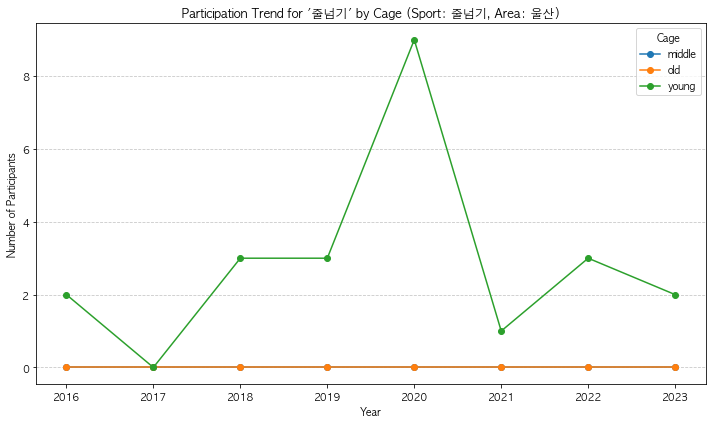

Trend Data for '줄넘기' by Cage (Sport: 줄넘기, Area: 울산):
cage   middle  old  young
dyear                    
2016        0    0      2
2017        0    0      0
2018        0    0      3
2019        0    0      3
2020        0    0      9
2021        0    0      1
2022        0    0      3
2023        0    0      2


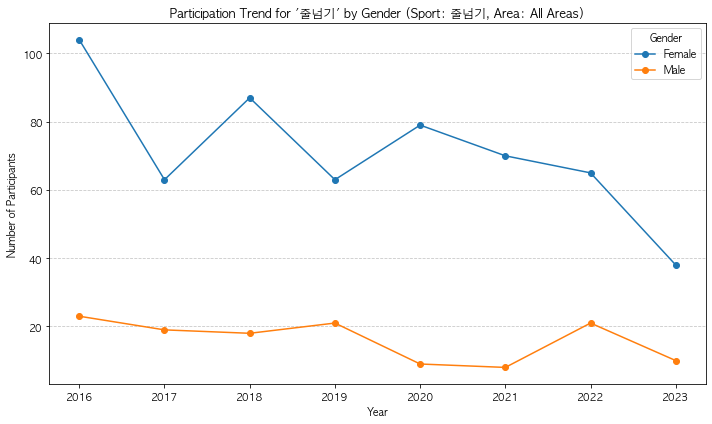

Trend Data for '줄넘기' by Gender (Sport: 줄넘기, Area: All Areas):
gender  Female  Male
dyear               
2016       104    23
2017        63    19
2018        87    18
2019        63    21
2020        79     9
2021        70     8
2022        65    21
2023        38    10


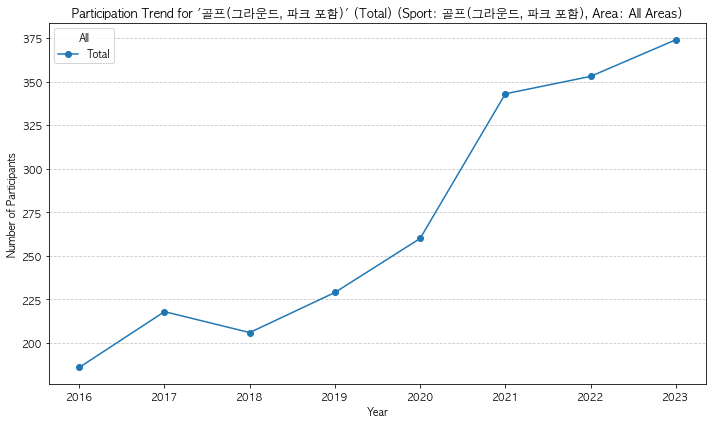

Trend Data for '골프(그라운드, 파크 포함)' (Total) (Sport: 골프(그라운드, 파크 포함), Area: All Areas):
   dyear  count
0   2016    186
1   2017    218
2   2018    206
3   2019    229
4   2020    260
5   2021    343
6   2022    353
7   2023    374


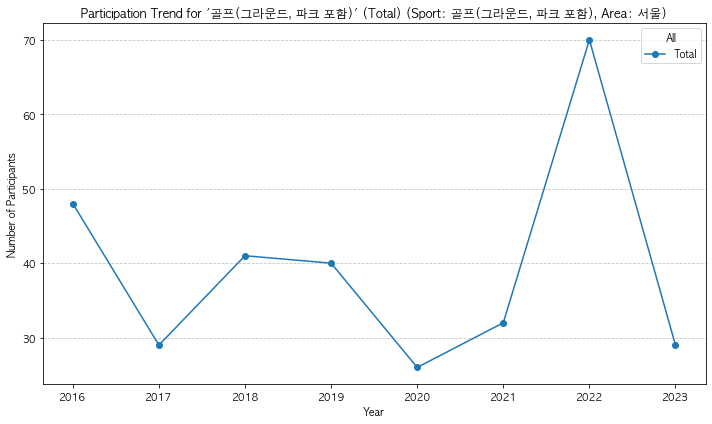

Trend Data for '골프(그라운드, 파크 포함)' (Total) (Sport: 골프(그라운드, 파크 포함), Area: 서울):
   dyear  count
0   2016     48
1   2017     29
2   2018     41
3   2019     40
4   2020     26
5   2021     32
6   2022     70
7   2023     29


In [90]:
def show_trend(df, filter_type, ksport, area=None):
    """
    Show trends across years (2016-2023) for unique values of 'gender', 'cage', or all data combined,
    filtered by a specific sport (ksport) and optionally by area.

    Parameters:
    - df: DataFrame with 'gender', 'cage', 'ksport', 'area', and 'dyear' columns.
    - filter_type: 'gender', 'cage', or 'all' to display trends. 'all' shows the total data without separation.
    - ksport: Sport name (string) to filter the data (e.g., '줄넘기').
    - area: Area name (string, optional) to further filter the data (e.g., '울산').
    """
    # Check required columns exist
    required_columns = {'gender', 'cage', 'ksport', 'area', 'dyear'}
    if not required_columns.issubset(df.columns):
        print(f"Please ensure the following columns exist in the DataFrame: {required_columns}")
        return

    # Validate filter_type
    if filter_type not in ['gender', 'cage', 'all']:
        print("Invalid filter_type. Please use 'gender', 'cage', or 'all'.")
        return

    # Filter data for the specified sport
    df_filtered = df[df['ksport'].str.lower() == ksport.lower()]
    if df_filtered.empty:  # Case 1: ksport does not exist
        print(f"No data found for sport '{ksport}'.")
        return

    # Optional: Filter data for the specified area
    if area:
        df_filtered = df_filtered[df_filtered['area'] == area]
        if df_filtered.empty:  # Case 2: area does not exist
            print(f"No data found for sport '{ksport}' in area '{area}'.")
            return

    if filter_type == 'all':
        # Group by year only, count occurrences
        trend_data = df_filtered.groupby('dyear').size().reset_index(name='count')

        # Plot the line graph
        plt.figure(figsize=(10, 6))
        plt.plot(trend_data['dyear'], trend_data['count'], marker='o', linestyle='-', label='Total')

        # Customize the plot
        title_info = f"Sport: {ksport}, Area: {area if area else 'All Areas'}"
        plt.title(f"Participation Trend for '{ksport}' (Total) ({title_info})")
        plt.xlabel('Year')
        plt.ylabel('Number of Participants')
        plt.legend(title='All')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Show the plot
        plt.show()

        # Print the trend data
        print(f"Trend Data for '{ksport}' (Total) ({title_info}):")
        print(trend_data)

    else:
        # Handle filter_type='gender' or 'cage'
        # Get all possible values for the filter type across the entire dataset
        all_filter_values = df[filter_type].dropna().unique()

        # Group by year and filter_type, count occurrences
        trend_data = df_filtered.groupby(['dyear', filter_type]).size().reset_index(name='count')

        # Ensure all year-filter combinations are included (including missing filter_type values)
        full_index = pd.MultiIndex.from_product(
            [range(2016, 2024), all_filter_values], names=['dyear', filter_type]
        )
        trend_data = trend_data.set_index(['dyear', filter_type]).reindex(full_index, fill_value=0).reset_index()

        # Pivot the data for plotting
        trend_pivot = trend_data.pivot(index='dyear', columns=filter_type, values='count').fillna(0)

        # Plot the line graph
        plt.figure(figsize=(10, 6))
        for col in trend_pivot.columns:
            plt.plot(trend_pivot.index, trend_pivot[col], marker='o', linestyle='-', label=col)

        # Customize the plot
        title_info = f"Sport: {ksport}, Area: {area if area else 'All Areas'}"
        plt.title(f"Participation Trend for '{ksport}' by {filter_type.capitalize()} ({title_info})")
        plt.xlabel('Year')
        plt.ylabel('Number of Participants')
        plt.legend(title=filter_type.capitalize())
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Show the plot
        plt.show()

        # Print the trend data
        print(f"Trend Data for '{ksport}' by {filter_type.capitalize()} ({title_info}):")
        print(trend_pivot)

# Example usage:
# Show trend for '줄넘기' by cage in the area '울산'
show_trend(df, filter_type='cage', ksport='줄넘기', area='울산')

# Show trend for '줄넘기' by gender for all areas
show_trend(df, filter_type='gender', ksport='줄넘기')

# Show overall trend for '골프' (no separation by gender or cage)
show_trend(df, filter_type='all', ksport='골프(그라운드, 파크 포함)')

# Show overall trend for '골프' in a specific area
show_trend(df, filter_type='all', ksport='골프(그라운드, 파크 포함)', area='서울')

## RQ: Age and Sport Preferences

Rankings of Areas for Each Year:

Year: 2016
   area  counts  rank
0    경기    1591   1.0
1    서울    1496   2.0
2    경남     591   3.0
3    경북     560   4.0
4    부산     510   5.0
5    충남     480   6.0
6    대구     460   7.0
7    전남     440   8.0
8    인천     431   9.0
9    전북     430  10.0
10   충북     420  11.0
11   강원     413  12.0
12   울산     310  13.0
13   대전     290  14.0
14   광주     280  15.0
15   제주     210  16.0
16   세종     100  17.0
----------------------------------------
Year: 2017
   area  counts  rank
0    경기    1140   1.0
1    서울    1060   2.0
2    부산     640   3.0
3    경남     610   4.0
4    경북     570   5.0
5    인천     560   6.0
6    대구     540   7.0
7    충남     500   8.0
8    전남     460   9.0
9    전북     460   9.0
10   강원     430  10.0
11   충북     430  10.0
12   대전     420  11.0
13   광주     400  12.0
14   울산     360  13.0
15   제주     270  14.0
16   세종     150  15.0
----------------------------------------
Year: 2018
   area  counts  rank
0    경기    1150   1.0
1    서울    1060

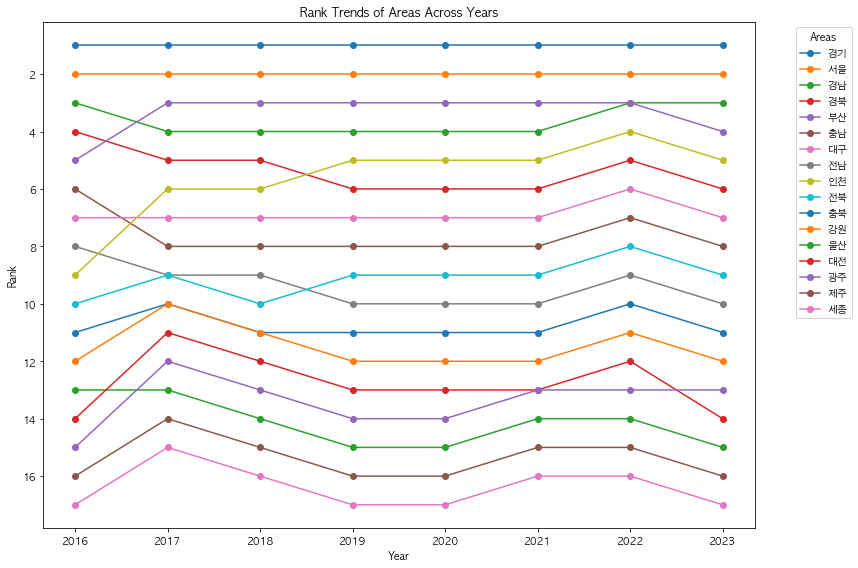

In [25]:
# Assuming 'dyear' and 'area' columns exist, replace with actual column names if different
if 'dyear' not in df.columns or 'area' not in df.columns:
    print("Please specify the correct column names for 'dyear' and 'area'.")
else:
    # Group data by dyear and area, and count occurrences
    area_counts = df.groupby(['dyear', 'area']).size().reset_index(name='counts')

    # Rank areas within each year based on counts
    area_counts['rank'] = area_counts.groupby('dyear')['counts'].rank(ascending=False, method='dense')

    # Sort data for better readability
    area_counts_sorted = area_counts.sort_values(by=['dyear', 'rank'])

    # Show rankings for each year
    print("Rankings of Areas for Each Year:\n")
    for year, group in area_counts_sorted.groupby('dyear'):
        print(f"Year: {year}")
        print(group[['area', 'counts', 'rank']].reset_index(drop=True))
        print("-" * 40)

    # Visualization: Line plot showing the rank trends of areas over years
    plt.figure(figsize=(12, 8))
    for area in area_counts_sorted['area'].unique():
        area_trend = area_counts_sorted[area_counts_sorted['area'] == area]
        plt.plot(area_trend['dyear'], area_trend['rank'], marker='o', linestyle='-', label=area)
    plt.gca().invert_yaxis()  # Invert Y-axis to show rank 1 at the top
    plt.title("Rank Trends of Areas Across Years")
    plt.xlabel("Year")
    plt.ylabel("Rank")
    plt.legend(title="Areas", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Top 20 Sports by Frequency:
             ksport  count
0        걷기(조깅, 속보)  15913
1          보디빌딩(헬스)   6282
2                등산   3498
3                수영   2771
4      요가, 필라테스, 태보   2713
5            축구, 풋살   2709
6   골프(그라운드, 파크 포함)   2169
7   자전거, 사이클, 산악자전거   1702
8              배드민턴   1625
9    체조(맨손체조, 생활체조)   1428
10               농구   1164
11          당구, 포켓볼   1051
12               탁구    845
13               볼링    821
14             에어로빅    707
15              줄넘기    698
16              테니스    553
17              태권도    438
18               낚시    433
19   육상(걷기, 마라톤 제외)    402


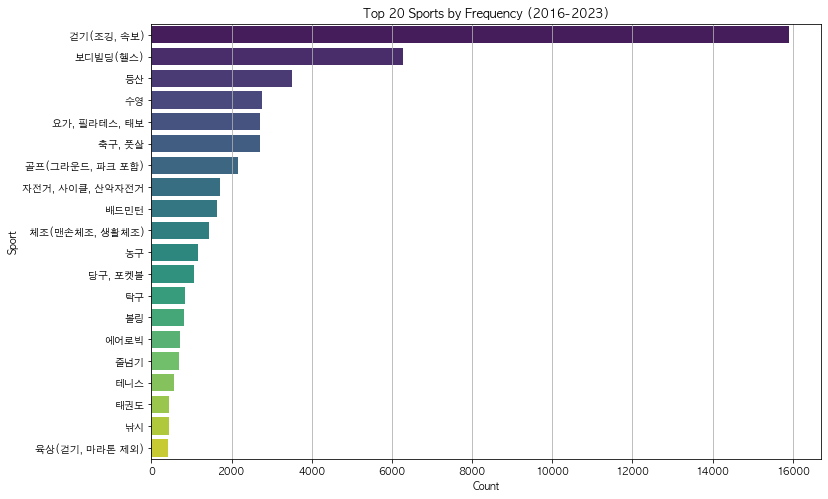

In [26]:
# Frequency ranking of sports from 2016 to 2023
if 'ksport' in df.columns and 'dyear' in df.columns:
    # Group by sport and count occurrences
    sport_counts = df['ksport'].value_counts().reset_index()
    sport_counts.columns = ['ksport', 'count']

    # Display top 20 sports
    print("Top 20 Sports by Frequency:")
    print(sport_counts.head(20))

    # Plot the top 20 sports
    plt.figure(figsize=(12, 8))
    sns.barplot(x='count', y='ksport', data=sport_counts.head(20), palette='viridis')
    plt.title('Top 20 Sports by Frequency (2016-2023)')
    plt.xlabel('Count')
    plt.ylabel('Sport')
    plt.grid(axis='x')
    plt.show()

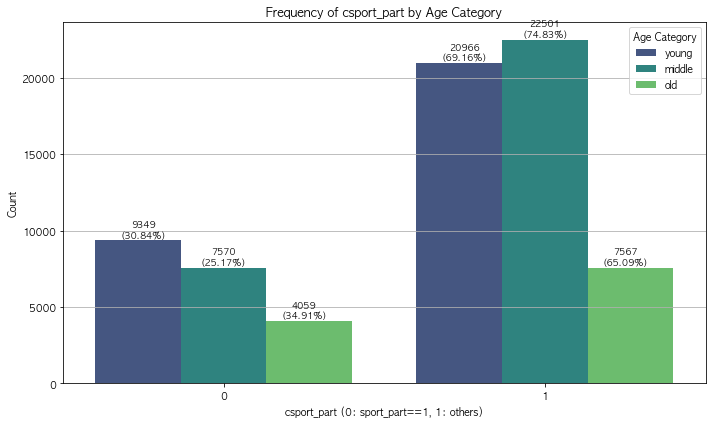

Frequency of csport_part by Age Category with Percentages:

   csport_part    cage  count  percentage
2            0   young   9349       30.84
0            0  middle   7570       25.17
1            0     old   4059       34.91
5            1   young  20966       69.16
3            1  middle  22501       74.83
4            1     old   7567       65.09


In [84]:
# Group by 'csport_part' and 'cage', count occurrences
csport_cage_counts = df.groupby(['csport_part', 'cage']).size().reset_index(name='count')

# Ensure 'cage' order: young -> middle -> old
cage_order = ['young', 'middle', 'old']
csport_cage_counts['cage'] = pd.Categorical(csport_cage_counts['cage'], categories=cage_order, ordered=True)

# Calculate percentage based on each 'cage' group
cage_totals = csport_cage_counts.groupby('cage')['count'].transform('sum')
csport_cage_counts['percentage'] = (csport_cage_counts['count'] / cage_totals * 100).round(2)

# Plot frequency of 'csport_part' separated by age category (cage) with percentages
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='csport_part', y='count', hue='cage', data=csport_cage_counts, palette='viridis')
plt.title('Frequency of csport_part by Age Category')
plt.xlabel('csport_part (0: sport_part==1, 1: others)')
plt.ylabel('Count')
plt.legend(title='Age Category')
plt.grid(axis='y')

# Add percentage labels directly from the data
for i, row in csport_cage_counts.iterrows():
    x_position = row['csport_part'] - 0.25 + 0.25 * cage_order.index(row['cage'])
    ax.annotate(f"{row['count']}\n({row['percentage']}%)",
                (x_position, row['count'] + 50), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print the frequency counts by age category with percentages
print("Frequency of csport_part by Age Category with Percentages:\n")
print(csport_cage_counts.sort_values(by=['csport_part', 'cage']))


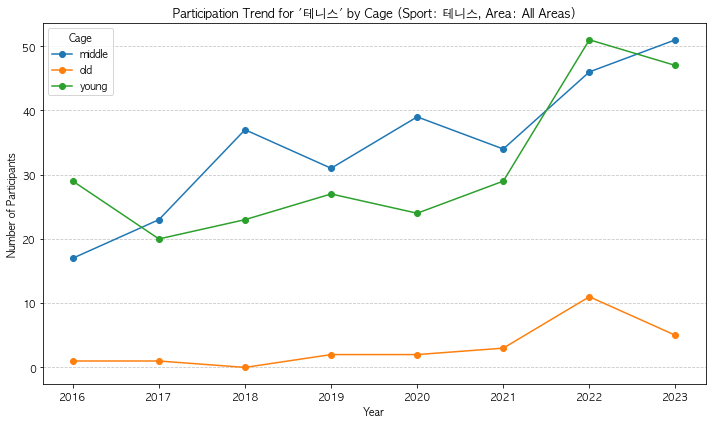

Trend Data for '테니스' by Cage (Sport: 테니스, Area: All Areas):
cage   middle  old  young
dyear                    
2016       17    1     29
2017       23    1     20
2018       37    0     23
2019       31    2     27
2020       39    2     24
2021       34    3     29
2022       46   11     51
2023       51    5     47


In [85]:
show_trend(df, filter_type='cage', ksport='테니스')


--- Showing trend for '걷기(조깅, 속보)' by age ---


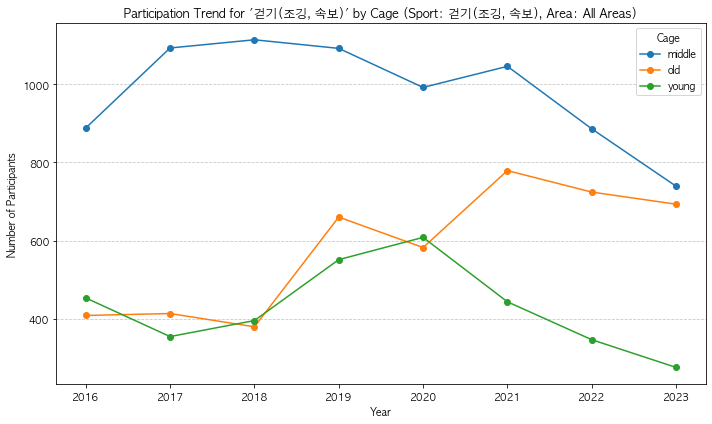

Trend Data for '걷기(조깅, 속보)' by Cage (Sport: 걷기(조깅, 속보), Area: All Areas):
cage   middle  old  young
dyear                    
2016      888  408    453
2017     1093  413    354
2018     1114  379    395
2019     1092  660    551
2020      992  582    608
2021     1046  779    443
2022      886  724    346
2023      739  693    275

--- Showing trend for '보디빌딩(헬스)' by age ---


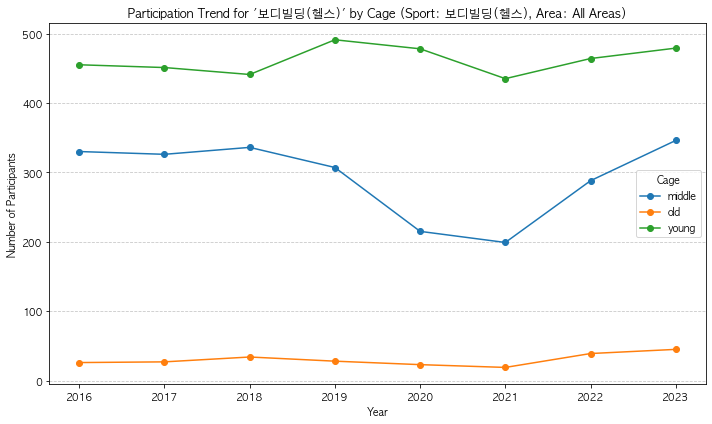

Trend Data for '보디빌딩(헬스)' by Cage (Sport: 보디빌딩(헬스), Area: All Areas):
cage   middle  old  young
dyear                    
2016      330   26    455
2017      326   27    451
2018      336   34    441
2019      307   28    491
2020      215   23    478
2021      199   19    435
2022      288   39    464
2023      346   45    479

--- Showing trend for '등산' by age ---


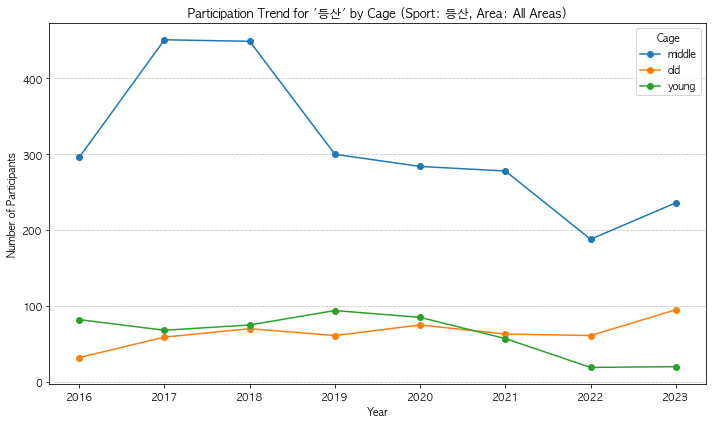

Trend Data for '등산' by Cage (Sport: 등산, Area: All Areas):
cage   middle  old  young
dyear                    
2016      296   32     82
2017      451   59     68
2018      449   70     75
2019      300   61     94
2020      284   75     85
2021      278   63     57
2022      188   61     19
2023      236   95     20

--- Showing trend for '수영' by age ---


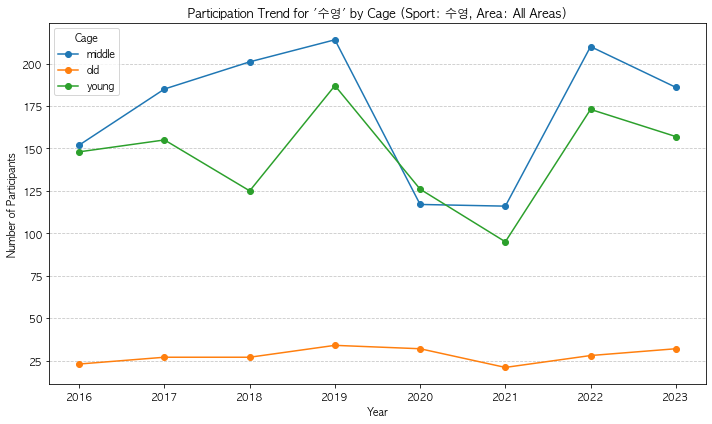

Trend Data for '수영' by Cage (Sport: 수영, Area: All Areas):
cage   middle  old  young
dyear                    
2016      152   23    148
2017      185   27    155
2018      201   27    125
2019      214   34    187
2020      117   32    126
2021      116   21     95
2022      210   28    173
2023      186   32    157

--- Showing trend for '요가, 필라테스, 태보' by age ---


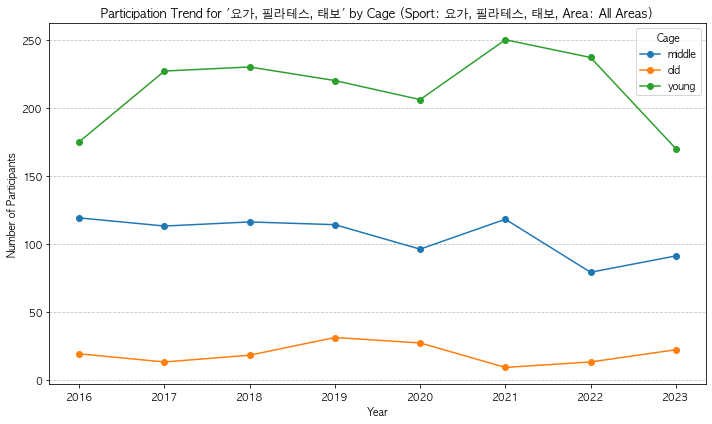

Trend Data for '요가, 필라테스, 태보' by Cage (Sport: 요가, 필라테스, 태보, Area: All Areas):
cage   middle  old  young
dyear                    
2016      119   19    175
2017      113   13    227
2018      116   18    230
2019      114   31    220
2020       96   27    206
2021      118    9    250
2022       79   13    237
2023       91   22    170

--- Showing trend for '축구, 풋살' by age ---


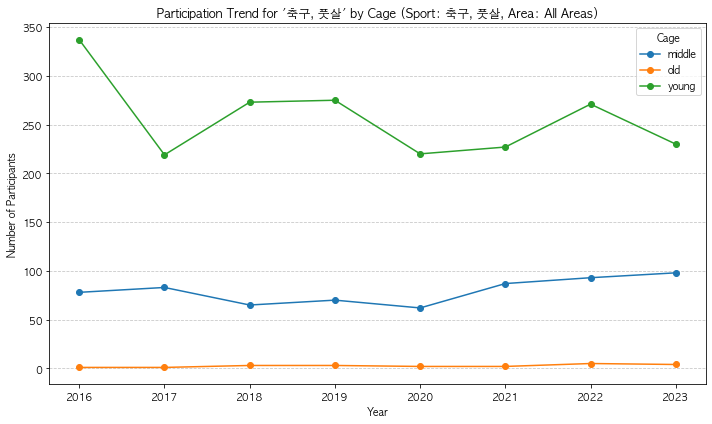

Trend Data for '축구, 풋살' by Cage (Sport: 축구, 풋살, Area: All Areas):
cage   middle  old  young
dyear                    
2016       78    1    337
2017       83    1    219
2018       65    3    273
2019       70    3    275
2020       62    2    220
2021       87    2    227
2022       93    5    271
2023       98    4    230

--- Showing trend for '골프(그라운드, 파크 포함)' by age ---


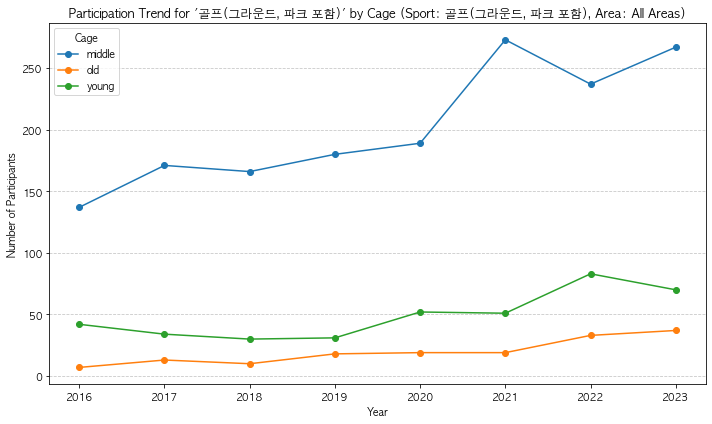

Trend Data for '골프(그라운드, 파크 포함)' by Cage (Sport: 골프(그라운드, 파크 포함), Area: All Areas):
cage   middle  old  young
dyear                    
2016      137    7     42
2017      171   13     34
2018      166   10     30
2019      180   18     31
2020      189   19     52
2021      273   19     51
2022      237   33     83
2023      267   37     70

--- Showing trend for '자전거, 사이클, 산악자전거' by age ---


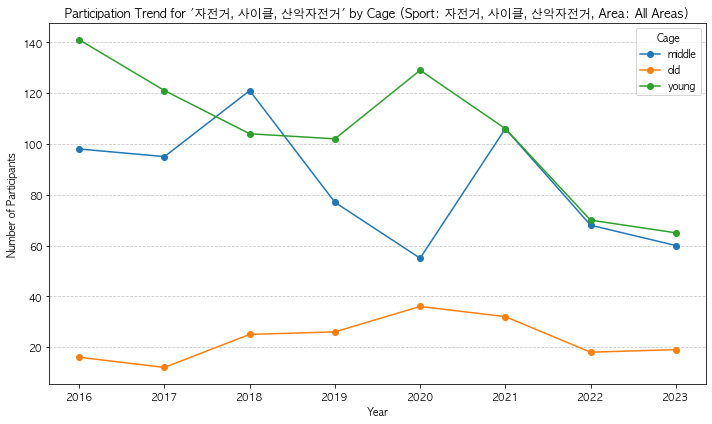

Trend Data for '자전거, 사이클, 산악자전거' by Cage (Sport: 자전거, 사이클, 산악자전거, Area: All Areas):
cage   middle  old  young
dyear                    
2016       98   16    141
2017       95   12    121
2018      121   25    104
2019       77   26    102
2020       55   36    129
2021      106   32    106
2022       68   18     70
2023       60   19     65

--- Showing trend for '배드민턴' by age ---


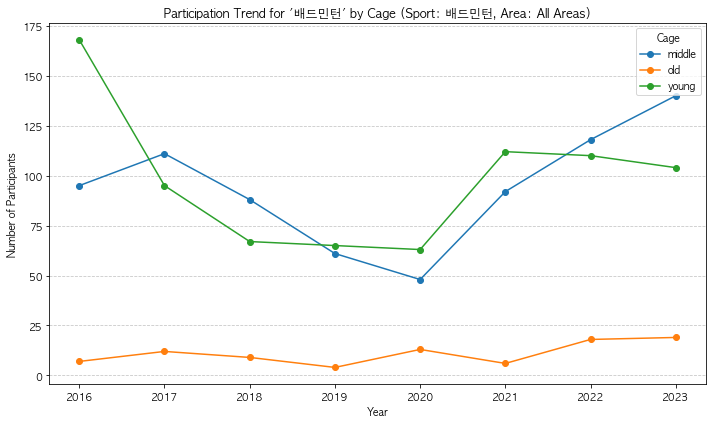

Trend Data for '배드민턴' by Cage (Sport: 배드민턴, Area: All Areas):
cage   middle  old  young
dyear                    
2016       95    7    168
2017      111   12     95
2018       88    9     67
2019       61    4     65
2020       48   13     63
2021       92    6    112
2022      118   18    110
2023      140   19    104

--- Showing trend for '체조(맨손체조, 생활체조)' by age ---


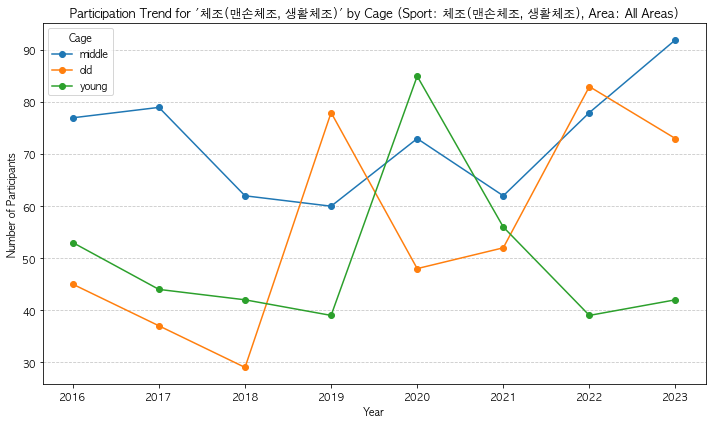

Trend Data for '체조(맨손체조, 생활체조)' by Cage (Sport: 체조(맨손체조, 생활체조), Area: All Areas):
cage   middle  old  young
dyear                    
2016       77   45     53
2017       79   37     44
2018       62   29     42
2019       60   78     39
2020       73   48     85
2021       62   52     56
2022       78   83     39
2023       92   73     42

--- Showing trend for '농구' by age ---


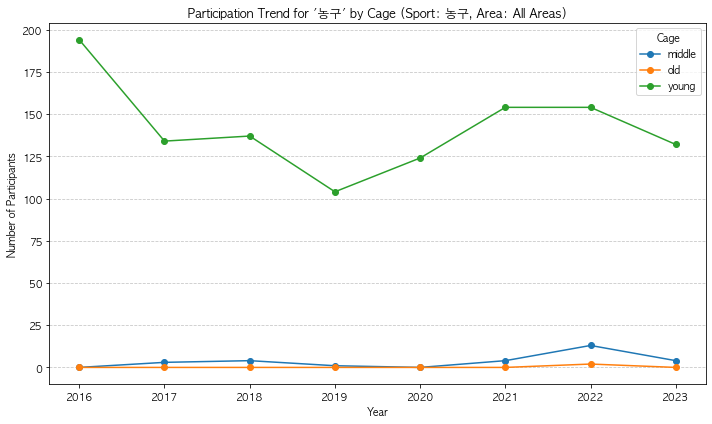

Trend Data for '농구' by Cage (Sport: 농구, Area: All Areas):
cage   middle  old  young
dyear                    
2016        0    0    194
2017        3    0    134
2018        4    0    137
2019        1    0    104
2020        0    0    124
2021        4    0    154
2022       13    2    154
2023        4    0    132

--- Showing trend for '당구, 포켓볼' by age ---


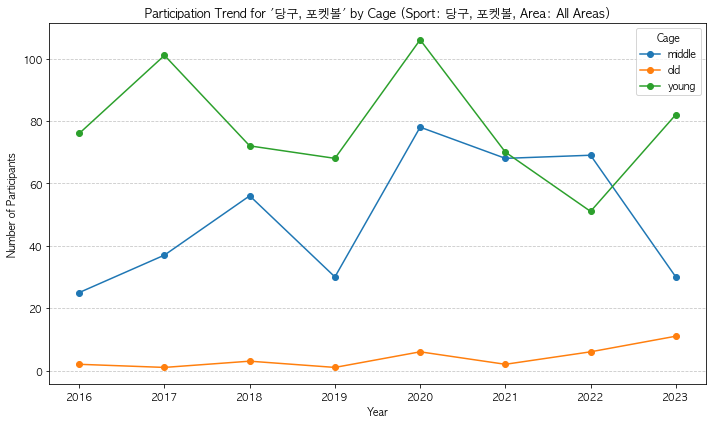

Trend Data for '당구, 포켓볼' by Cage (Sport: 당구, 포켓볼, Area: All Areas):
cage   middle  old  young
dyear                    
2016       25    2     76
2017       37    1    101
2018       56    3     72
2019       30    1     68
2020       78    6    106
2021       68    2     70
2022       69    6     51
2023       30   11     82

--- Showing trend for '탁구' by age ---


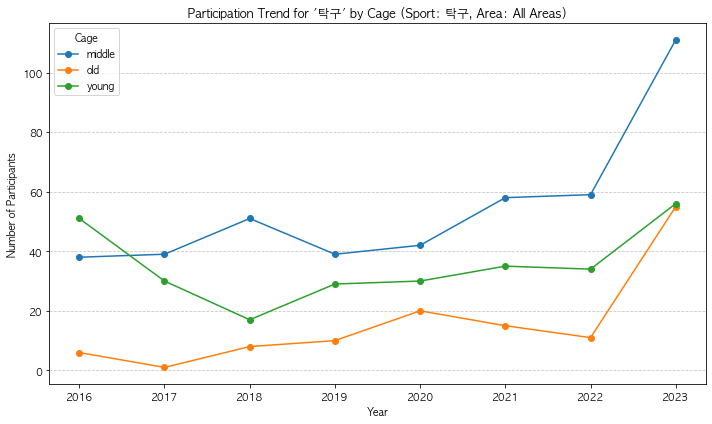

Trend Data for '탁구' by Cage (Sport: 탁구, Area: All Areas):
cage   middle  old  young
dyear                    
2016       38    6     51
2017       39    1     30
2018       51    8     17
2019       39   10     29
2020       42   20     30
2021       58   15     35
2022       59   11     34
2023      111   55     56

--- Showing trend for '볼링' by age ---


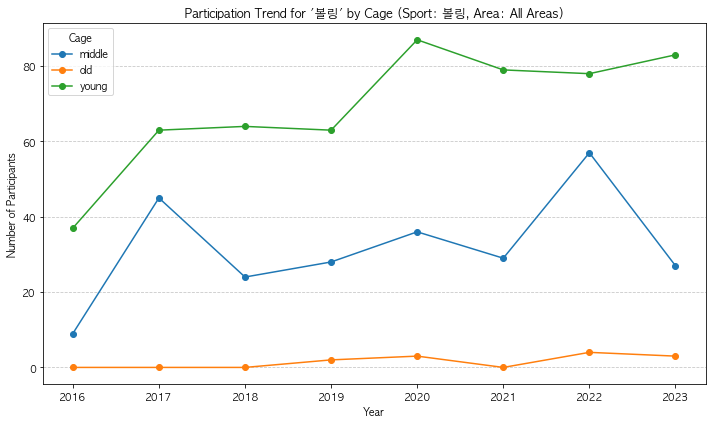

Trend Data for '볼링' by Cage (Sport: 볼링, Area: All Areas):
cage   middle  old  young
dyear                    
2016        9    0     37
2017       45    0     63
2018       24    0     64
2019       28    2     63
2020       36    3     87
2021       29    0     79
2022       57    4     78
2023       27    3     83

--- Showing trend for '에어로빅' by age ---


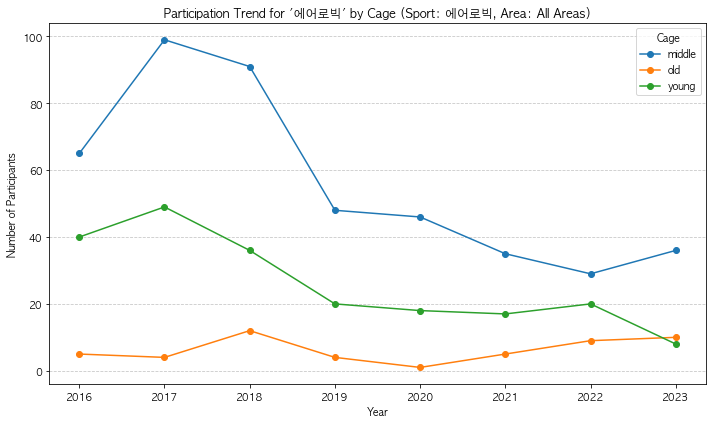

Trend Data for '에어로빅' by Cage (Sport: 에어로빅, Area: All Areas):
cage   middle  old  young
dyear                    
2016       65    5     40
2017       99    4     49
2018       91   12     36
2019       48    4     20
2020       46    1     18
2021       35    5     17
2022       29    9     20
2023       36   10      8

--- Showing trend for '줄넘기' by age ---


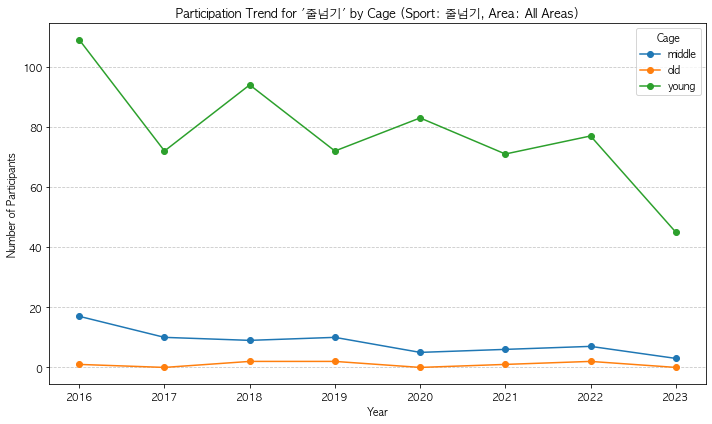

Trend Data for '줄넘기' by Cage (Sport: 줄넘기, Area: All Areas):
cage   middle  old  young
dyear                    
2016       17    1    109
2017       10    0     72
2018        9    2     94
2019       10    2     72
2020        5    0     83
2021        6    1     71
2022        7    2     77
2023        3    0     45

--- Showing trend for '테니스' by age ---


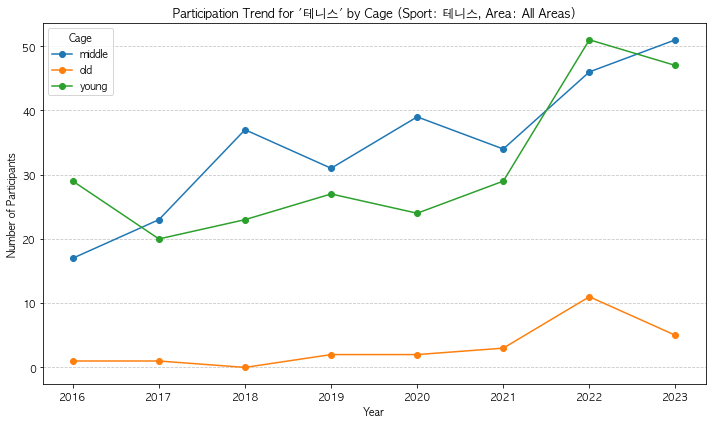

Trend Data for '테니스' by Cage (Sport: 테니스, Area: All Areas):
cage   middle  old  young
dyear                    
2016       17    1     29
2017       23    1     20
2018       37    0     23
2019       31    2     27
2020       39    2     24
2021       34    3     29
2022       46   11     51
2023       51    5     47

--- Showing trend for '태권도' by age ---


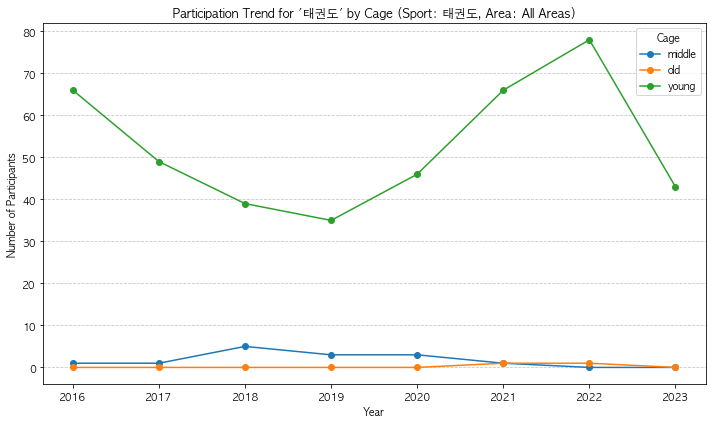

Trend Data for '태권도' by Cage (Sport: 태권도, Area: All Areas):
cage   middle  old  young
dyear                    
2016        1    0     66
2017        1    0     49
2018        5    0     39
2019        3    0     35
2020        3    0     46
2021        1    1     66
2022        0    1     78
2023        0    0     43

--- Showing trend for '낚시' by age ---


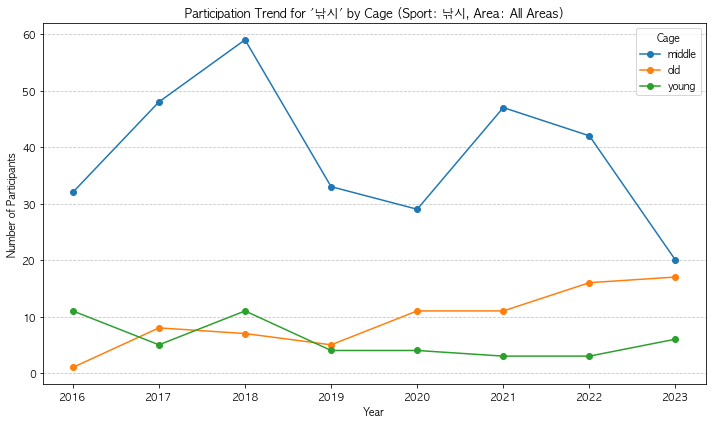

Trend Data for '낚시' by Cage (Sport: 낚시, Area: All Areas):
cage   middle  old  young
dyear                    
2016       32    1     11
2017       48    8      5
2018       59    7     11
2019       33    5      4
2020       29   11      4
2021       47   11      3
2022       42   16      3
2023       20   17      6

--- Showing trend for '육상(걷기, 마라톤 제외)' by age ---


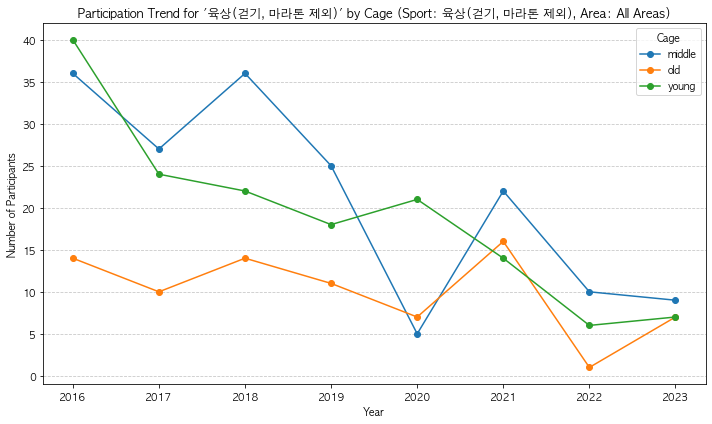

Trend Data for '육상(걷기, 마라톤 제외)' by Cage (Sport: 육상(걷기, 마라톤 제외), Area: All Areas):
cage   middle  old  young
dyear                    
2016       36   14     40
2017       27   10     24
2018       36   14     22
2019       25   11     18
2020        5    7     21
2021       22   16     14
2022       10    1      6
2023        9    7      7


In [88]:
# Get the top 20 most frequent sports in the 'ksport' column
top_20_sports = df['ksport'].value_counts().head(20).index.tolist()

# Loop through each sport and call show_trend for 'cage'
for sport in top_20_sports:
    print(f"\n--- Showing trend for '{sport}' by age ---")
    show_trend(df, filter_type='cage', ksport=sport)

## RQ: Gender and Sports Preference / Sports that male and female can do together?

### 힘이나 체격이 크게 영향을 미치는 종목? 이론적 배경, 설명.

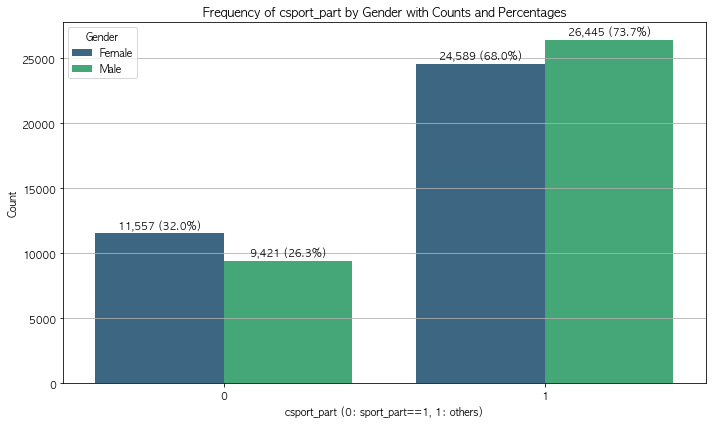

Frequency and Percentage of csport_part by Gender:

   csport_part  gender  count  percentage
0            0  Female  11557   31.973109
1            1  Female  24589   68.026891
2            0    Male   9421   26.267217
3            1    Male  26445   73.732783


In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check if gender column exists
if 'gender' not in df.columns:
    print("Please specify the correct column name for 'gender'.")
else:
    # Group by 'csport_part' and 'gender', count occurrences
    csport_gender_counts = df.groupby(['csport_part', 'gender'], as_index=False).size()
    csport_gender_counts.rename(columns={'size': 'count'}, inplace=True)

    # Calculate total count per gender
    gender_totals = csport_gender_counts.groupby('gender')['count'].sum()

    # Calculate percentage and explicitly assign
    csport_gender_counts['percentage'] = csport_gender_counts.apply(
        lambda row: (row['count'] / gender_totals[row['gender']]) * 100, axis=1
    )

    # Explicitly sort by gender and csport_part to maintain order
    csport_gender_counts = csport_gender_counts.sort_values(by=['gender', 'csport_part']).reset_index(drop=True)

    # Plot the barplot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x='csport_part',
        y='count',
        hue='gender',
        data=csport_gender_counts,
        palette='viridis'
    )

    # Add count and percentage data labels on top of the bars
    for p, count, percentage in zip(ax.patches, csport_gender_counts['count'], csport_gender_counts['percentage']):
        ax.annotate(
            f'{count:,} ({percentage:.1f}%)',  # Display count and percentage
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center', va='center',
            xytext=(0, 8),
            textcoords='offset points',
            fontsize=10, color='black'
        )

    # Customize plot
    plt.title('Frequency of csport_part by Gender with Counts and Percentages')
    plt.xlabel('csport_part (0: sport_part==1, 1: others)')
    plt.ylabel('Count')
    plt.legend(title='Gender')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Print the frequency counts with percentages
    print("Frequency and Percentage of csport_part by Gender:\n")
    print(csport_gender_counts)


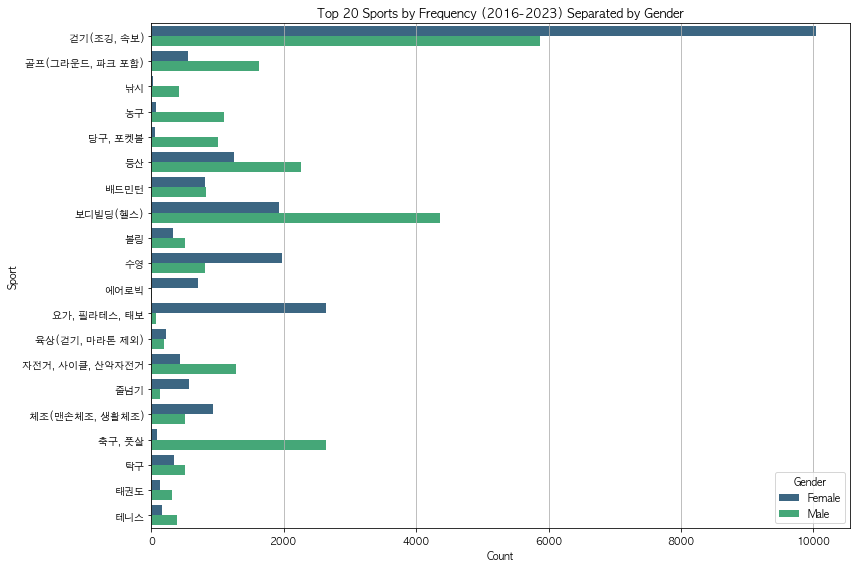

Top 20 Sports by Frequency Separated by Gender:

              ksport  gender  count
11        걷기(조깅, 속보)  Female  10045
12        걷기(조깅, 속보)    Male   5868
49          보디빌딩(헬스)    Male   4352
85      요가, 필라테스, 태보  Female   2642
108           축구, 풋살    Male   2631
32                등산    Male   2255
66                수영  Female   1965
48          보디빌딩(헬스)  Female   1930
20   골프(그라운드, 파크 포함)    Male   1623
98   자전거, 사이클, 산악자전거    Male   1278
31                등산  Female   1243
26                농구    Male   1093
28           당구, 포켓볼    Male   1002
105   체조(맨손체조, 생활체조)  Female    927
47              배드민턴    Male    817
46              배드민턴  Female    808
67                수영    Male    806
83              에어로빅  Female    696
103              줄넘기  Female    569
19   골프(그라운드, 파크 포함)  Female    546
111               탁구    Male    509
51                볼링    Male    502
106   체조(맨손체조, 생활체조)    Male    501
97   자전거, 사이클, 산악자전거  Female    424
24                낚시    Male    412
115            

In [27]:
# Literature on male sports vs. female sports.

# Assuming 'dyear', 'ksport', and 'gender' columns exist
if 'ksport' not in df.columns or 'dyear' not in df.columns or 'gender' not in df.columns:
    print("Please specify the correct column names for 'dyear', 'ksport', and 'gender'.")
else:
    # Group by sport and gender, count occurrences
    sport_gender_counts = df.groupby(['ksport', 'gender']).size().reset_index(name='count')

    # Sort values by count and get the top 20 sports overall
    top_sports = sport_gender_counts.groupby('ksport')['count'].sum().nlargest(20).index
    top_sport_data = sport_gender_counts[sport_gender_counts['ksport'].isin(top_sports)]

    # Plot the top 20 sports separated by gender
    plt.figure(figsize=(12, 8))
    sns.barplot(x='count', y='ksport', hue='gender', data=top_sport_data, palette='viridis')
    plt.title('Top 20 Sports by Frequency (2016-2023) Separated by Gender')
    plt.xlabel('Count')
    plt.ylabel('Sport')
    plt.legend(title='Gender')
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

    # Print the top 20 sports with gender counts
    print("Top 20 Sports by Frequency Separated by Gender:\n")
    print(top_sport_data.sort_values(by=['count'], ascending=False))


Top 20 Sports for Men:
걷기(조깅, 속보)         5868
보디빌딩(헬스)           4352
축구, 풋살             2631
등산                 2255
골프(그라운드, 파크 포함)    1623
자전거, 사이클, 산악자전거    1278
농구                 1093
당구, 포켓볼            1002
배드민턴                817
수영                  806
탁구                  509
볼링                  502
체조(맨손체조, 생활체조)      501
낚시                  412
테니스                 387
태권도                 304
족구                  283
야구                  279
게이트볼                263
육상(걷기, 마라톤 제외)      187
Name: ksport, dtype: int64

Top 20 Sports for Women:
걷기(조깅, 속보)               10045
요가, 필라테스, 태보              2642
수영                        1965
보디빌딩(헬스)                  1930
등산                        1243
체조(맨손체조, 생활체조)             927
배드민턴                       808
에어로빅                       696
줄넘기                        569
골프(그라운드, 파크 포함)            546
자전거, 사이클, 산악자전거            424
댄스스포츠                      352
탁구                         336
볼링                         319
훌라후프      

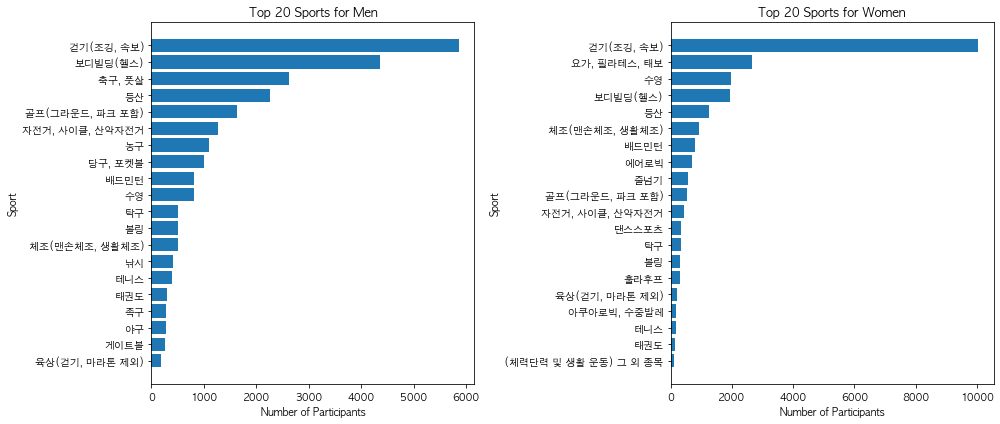

In [28]:
import pandas as pd

# Assuming 'gender' and 'ksport' columns exist in your DataFrame
# Filter data for Male and Female
male_sports = df[df['gender'] == 'Male']['ksport'].value_counts().head(20)
female_sports = df[df['gender'] == 'Female']['ksport'].value_counts().head(20)

# Display results
print("Top 20 Sports for Men:")
print(male_sports)

print("\nTop 20 Sports for Women:")
print(female_sports)

# Plotting results
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top 20 sports for men
axes[0].barh(male_sports.index[::-1], male_sports.values[::-1])
axes[0].set_title("Top 20 Sports for Men")
axes[0].set_xlabel("Number of Participants")
axes[0].set_ylabel("Sport")

# Top 20 sports for women
axes[1].barh(female_sports.index[::-1], female_sports.values[::-1])
axes[1].set_title("Top 20 Sports for Women")
axes[1].set_xlabel("Number of Participants")
axes[1].set_ylabel("Sport")

plt.tight_layout()
plt.show()


--- Showing trend for '걷기(조깅, 속보)' by gender ---


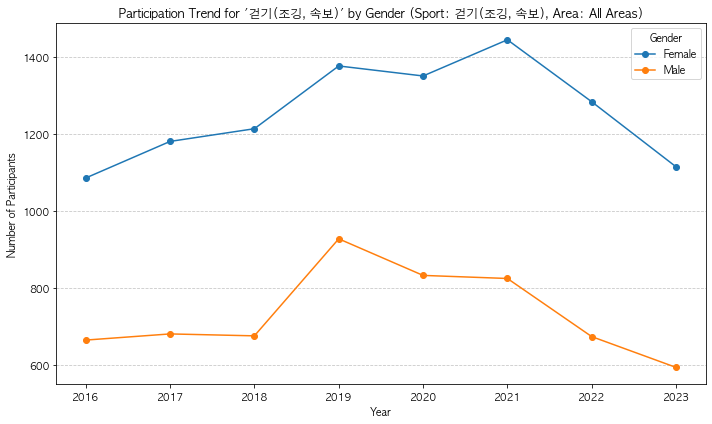

Trend Data for '걷기(조깅, 속보)' by Gender (Sport: 걷기(조깅, 속보), Area: All Areas):
gender  Female  Male
dyear               
2016      1085   664
2017      1180   680
2018      1213   675
2019      1376   927
2020      1350   832
2021      1444   824
2022      1283   673
2023      1114   593

--- Showing trend for '보디빌딩(헬스)' by gender ---


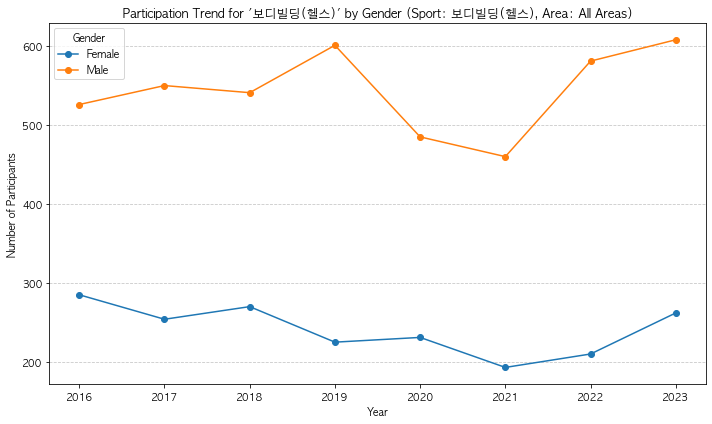

Trend Data for '보디빌딩(헬스)' by Gender (Sport: 보디빌딩(헬스), Area: All Areas):
gender  Female  Male
dyear               
2016       285   526
2017       254   550
2018       270   541
2019       225   601
2020       231   485
2021       193   460
2022       210   581
2023       262   608

--- Showing trend for '등산' by gender ---


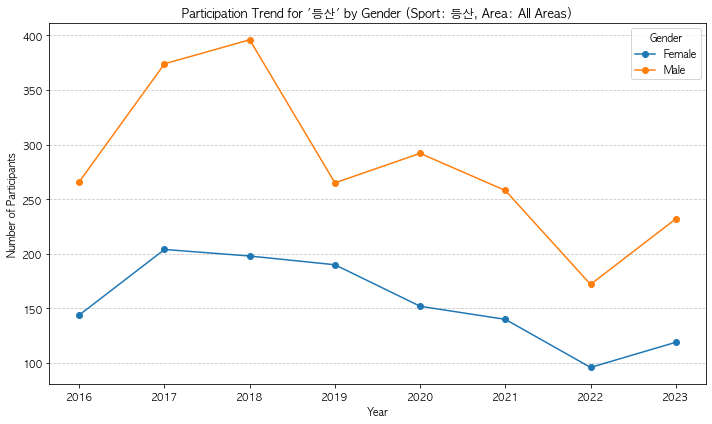

Trend Data for '등산' by Gender (Sport: 등산, Area: All Areas):
gender  Female  Male
dyear               
2016       144   266
2017       204   374
2018       198   396
2019       190   265
2020       152   292
2021       140   258
2022        96   172
2023       119   232

--- Showing trend for '수영' by gender ---


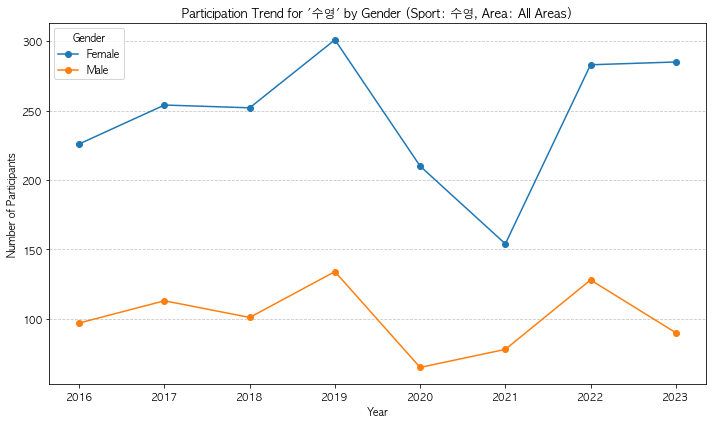

Trend Data for '수영' by Gender (Sport: 수영, Area: All Areas):
gender  Female  Male
dyear               
2016       226    97
2017       254   113
2018       252   101
2019       301   134
2020       210    65
2021       154    78
2022       283   128
2023       285    90

--- Showing trend for '요가, 필라테스, 태보' by gender ---


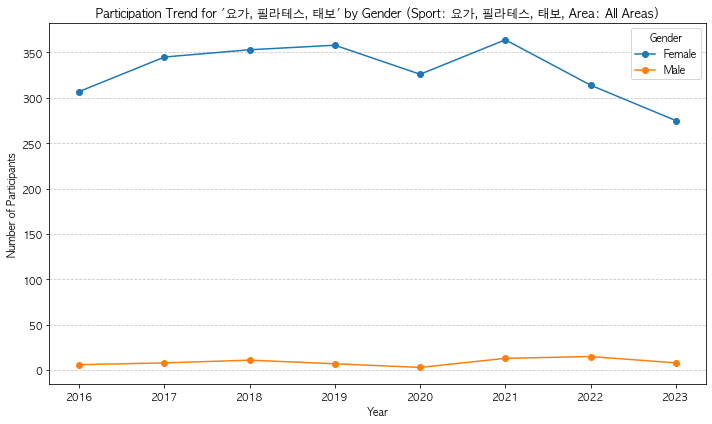

Trend Data for '요가, 필라테스, 태보' by Gender (Sport: 요가, 필라테스, 태보, Area: All Areas):
gender  Female  Male
dyear               
2016       307     6
2017       345     8
2018       353    11
2019       358     7
2020       326     3
2021       364    13
2022       314    15
2023       275     8

--- Showing trend for '축구, 풋살' by gender ---


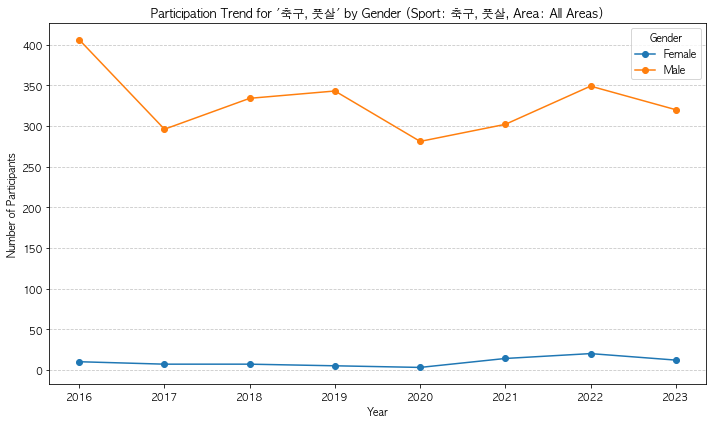

Trend Data for '축구, 풋살' by Gender (Sport: 축구, 풋살, Area: All Areas):
gender  Female  Male
dyear               
2016        10   406
2017         7   296
2018         7   334
2019         5   343
2020         3   281
2021        14   302
2022        20   349
2023        12   320

--- Showing trend for '골프(그라운드, 파크 포함)' by gender ---


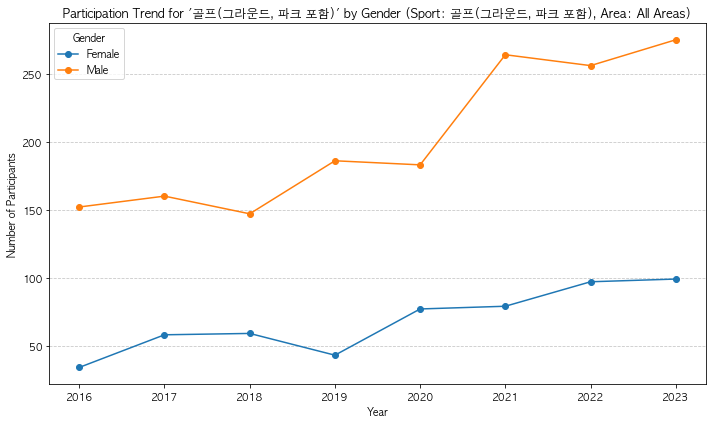

Trend Data for '골프(그라운드, 파크 포함)' by Gender (Sport: 골프(그라운드, 파크 포함), Area: All Areas):
gender  Female  Male
dyear               
2016        34   152
2017        58   160
2018        59   147
2019        43   186
2020        77   183
2021        79   264
2022        97   256
2023        99   275

--- Showing trend for '자전거, 사이클, 산악자전거' by gender ---


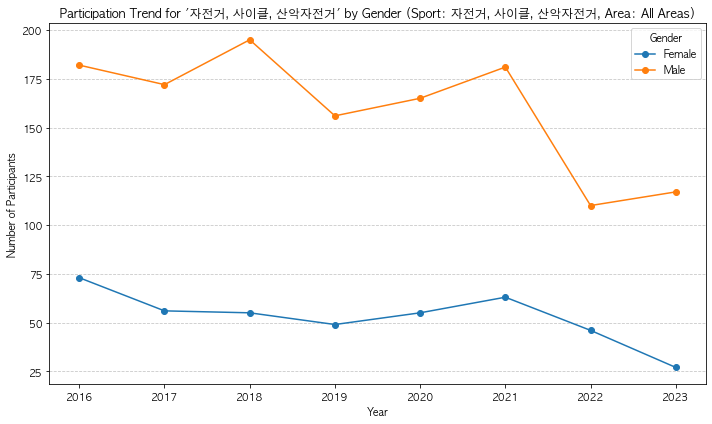

Trend Data for '자전거, 사이클, 산악자전거' by Gender (Sport: 자전거, 사이클, 산악자전거, Area: All Areas):
gender  Female  Male
dyear               
2016        73   182
2017        56   172
2018        55   195
2019        49   156
2020        55   165
2021        63   181
2022        46   110
2023        27   117

--- Showing trend for '배드민턴' by gender ---


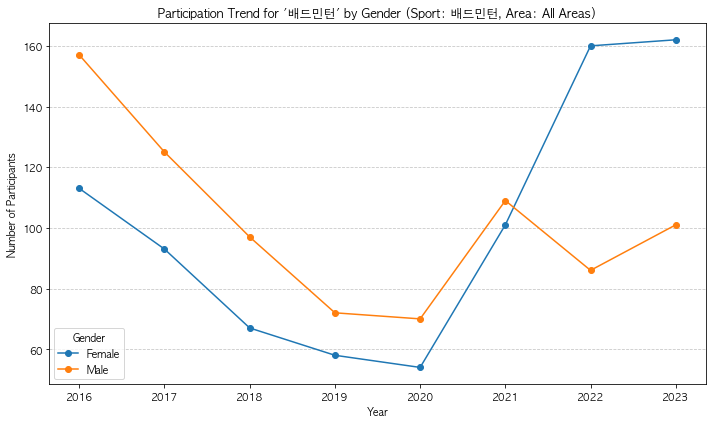

Trend Data for '배드민턴' by Gender (Sport: 배드민턴, Area: All Areas):
gender  Female  Male
dyear               
2016       113   157
2017        93   125
2018        67    97
2019        58    72
2020        54    70
2021       101   109
2022       160    86
2023       162   101

--- Showing trend for '체조(맨손체조, 생활체조)' by gender ---


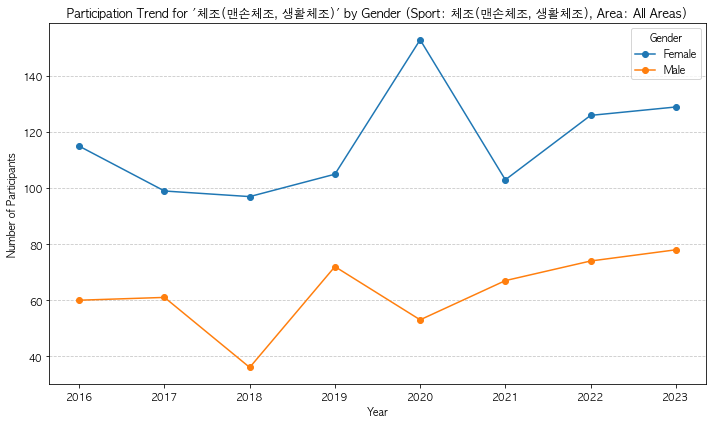

Trend Data for '체조(맨손체조, 생활체조)' by Gender (Sport: 체조(맨손체조, 생활체조), Area: All Areas):
gender  Female  Male
dyear               
2016       115    60
2017        99    61
2018        97    36
2019       105    72
2020       153    53
2021       103    67
2022       126    74
2023       129    78

--- Showing trend for '농구' by gender ---


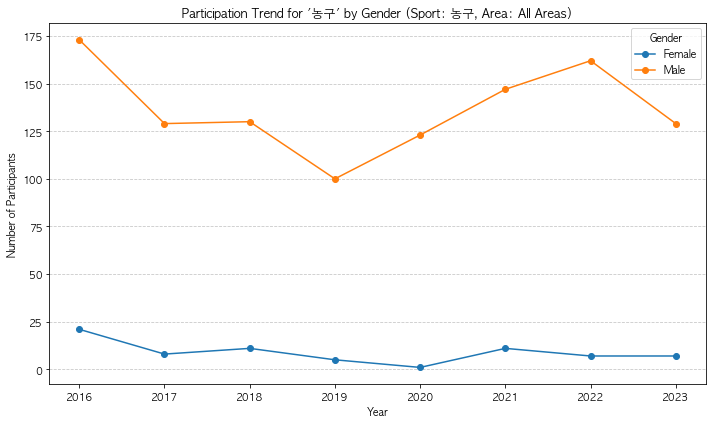

Trend Data for '농구' by Gender (Sport: 농구, Area: All Areas):
gender  Female  Male
dyear               
2016        21   173
2017         8   129
2018        11   130
2019         5   100
2020         1   123
2021        11   147
2022         7   162
2023         7   129

--- Showing trend for '당구, 포켓볼' by gender ---


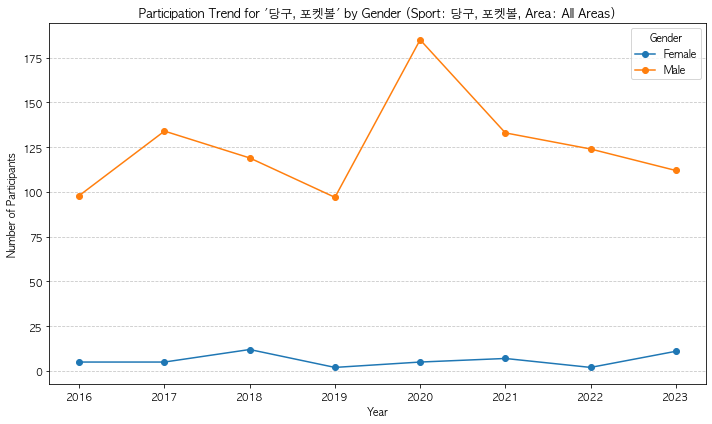

Trend Data for '당구, 포켓볼' by Gender (Sport: 당구, 포켓볼, Area: All Areas):
gender  Female  Male
dyear               
2016         5    98
2017         5   134
2018        12   119
2019         2    97
2020         5   185
2021         7   133
2022         2   124
2023        11   112

--- Showing trend for '탁구' by gender ---


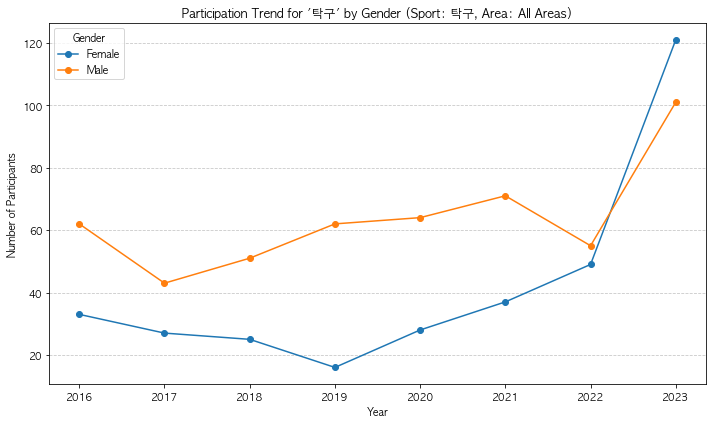

Trend Data for '탁구' by Gender (Sport: 탁구, Area: All Areas):
gender  Female  Male
dyear               
2016        33    62
2017        27    43
2018        25    51
2019        16    62
2020        28    64
2021        37    71
2022        49    55
2023       121   101

--- Showing trend for '볼링' by gender ---


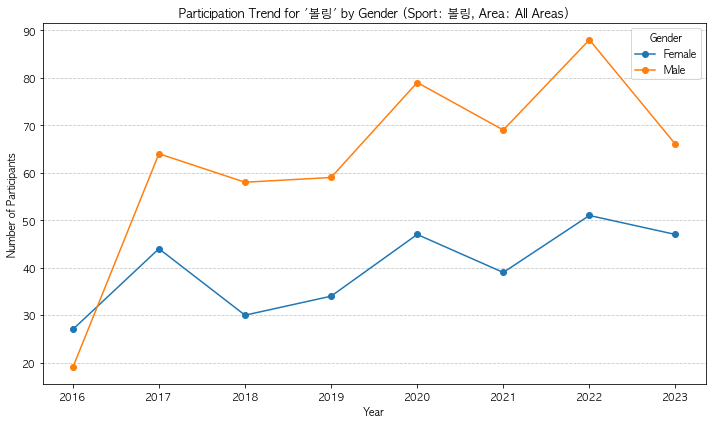

Trend Data for '볼링' by Gender (Sport: 볼링, Area: All Areas):
gender  Female  Male
dyear               
2016        27    19
2017        44    64
2018        30    58
2019        34    59
2020        47    79
2021        39    69
2022        51    88
2023        47    66

--- Showing trend for '에어로빅' by gender ---


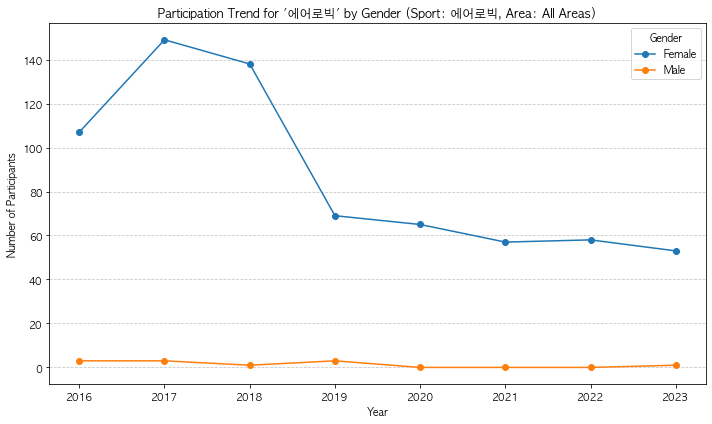

Trend Data for '에어로빅' by Gender (Sport: 에어로빅, Area: All Areas):
gender  Female  Male
dyear               
2016       107     3
2017       149     3
2018       138     1
2019        69     3
2020        65     0
2021        57     0
2022        58     0
2023        53     1

--- Showing trend for '줄넘기' by gender ---


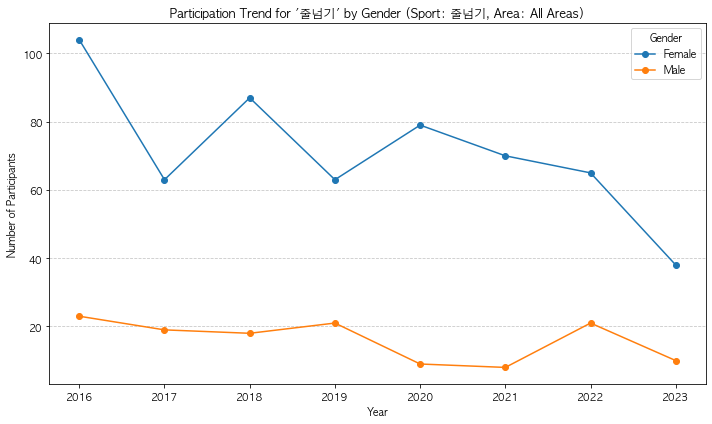

Trend Data for '줄넘기' by Gender (Sport: 줄넘기, Area: All Areas):
gender  Female  Male
dyear               
2016       104    23
2017        63    19
2018        87    18
2019        63    21
2020        79     9
2021        70     8
2022        65    21
2023        38    10

--- Showing trend for '테니스' by gender ---


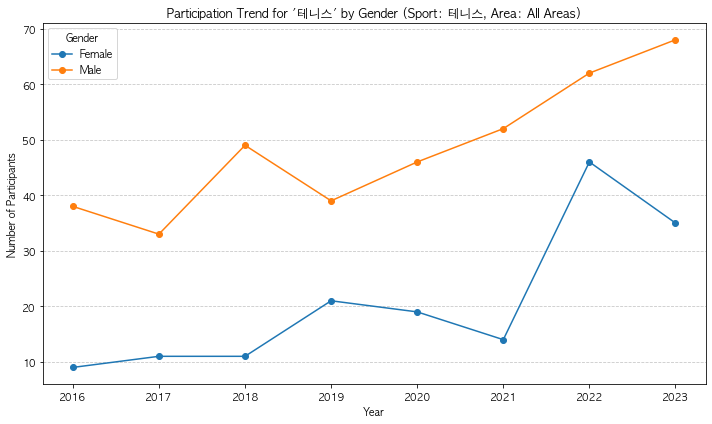

Trend Data for '테니스' by Gender (Sport: 테니스, Area: All Areas):
gender  Female  Male
dyear               
2016         9    38
2017        11    33
2018        11    49
2019        21    39
2020        19    46
2021        14    52
2022        46    62
2023        35    68

--- Showing trend for '태권도' by gender ---


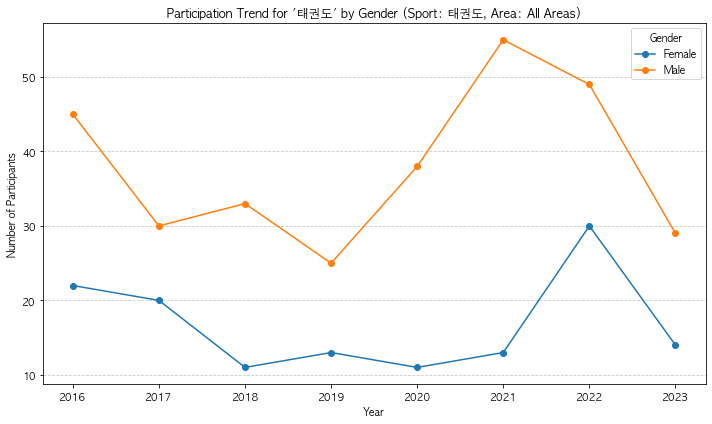

Trend Data for '태권도' by Gender (Sport: 태권도, Area: All Areas):
gender  Female  Male
dyear               
2016        22    45
2017        20    30
2018        11    33
2019        13    25
2020        11    38
2021        13    55
2022        30    49
2023        14    29

--- Showing trend for '낚시' by gender ---


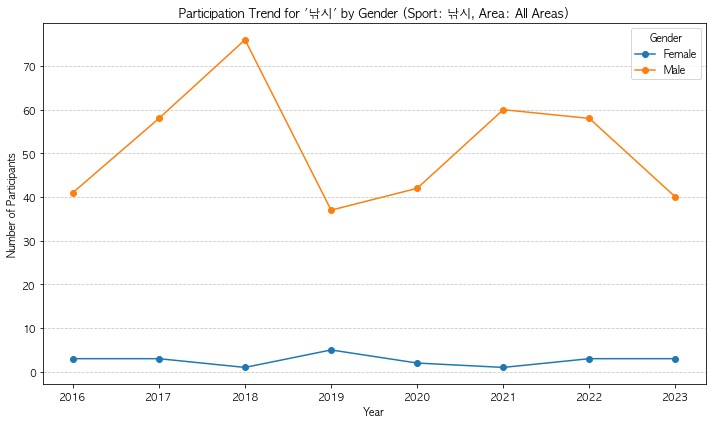

Trend Data for '낚시' by Gender (Sport: 낚시, Area: All Areas):
gender  Female  Male
dyear               
2016         3    41
2017         3    58
2018         1    76
2019         5    37
2020         2    42
2021         1    60
2022         3    58
2023         3    40

--- Showing trend for '육상(걷기, 마라톤 제외)' by gender ---


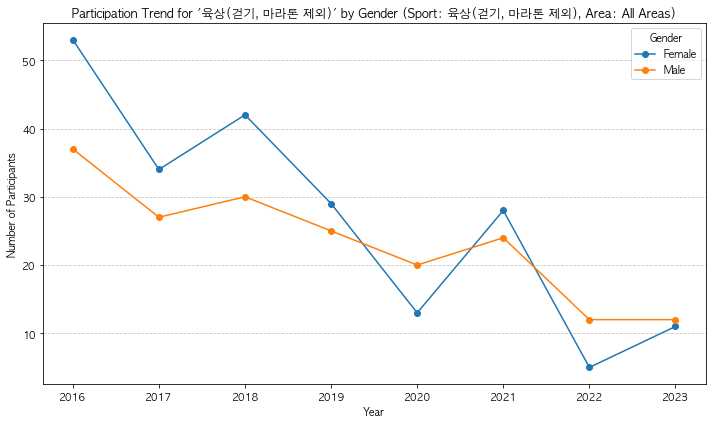

Trend Data for '육상(걷기, 마라톤 제외)' by Gender (Sport: 육상(걷기, 마라톤 제외), Area: All Areas):
gender  Female  Male
dyear               
2016        53    37
2017        34    27
2018        42    30
2019        29    25
2020        13    20
2021        28    24
2022         5    12
2023        11    12


In [91]:
# Get the top 20 most frequent sports in the 'ksport' column
top_20_sports = df['ksport'].value_counts().head(20).index.tolist()

# Loop through each sport and call show_trend for 'cage'
for sport in top_20_sports:
    print(f"\n--- Showing trend for '{sport}' by gender ---")
    show_trend(df, filter_type='gender', ksport=sport)

## RQ: What distinguishes COVID-19 high-risk sports from low-risk sports?

#### Participation Recovery after COVID19 higher? same? lower? What could be the possible reasons?

#### Substitute vs. Complement sports by analyzing trends during covid?

#### by age or gender?
#### Which age group or gender reports the highest levels of concern about COVID-19 infection during sports activities, and what are the underlying reasons?


--- Showing trend for '걷기(조깅, 속보)' for all ---


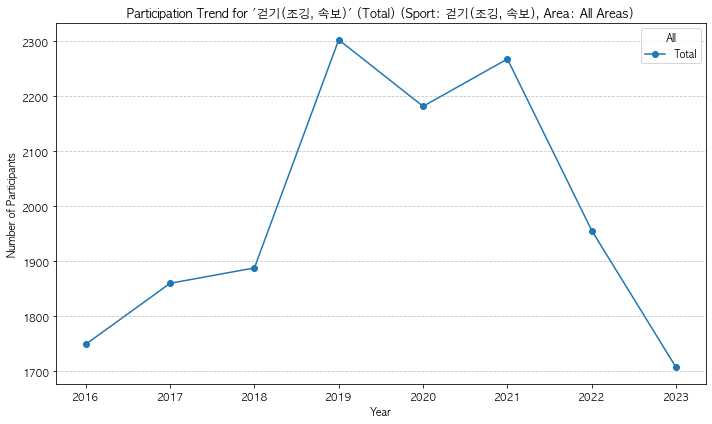

Trend Data for '걷기(조깅, 속보)' (Total) (Sport: 걷기(조깅, 속보), Area: All Areas):
   dyear  count
0   2016   1749
1   2017   1860
2   2018   1888
3   2019   2303
4   2020   2182
5   2021   2268
6   2022   1956
7   2023   1707

--- Showing trend for '보디빌딩(헬스)' for all ---


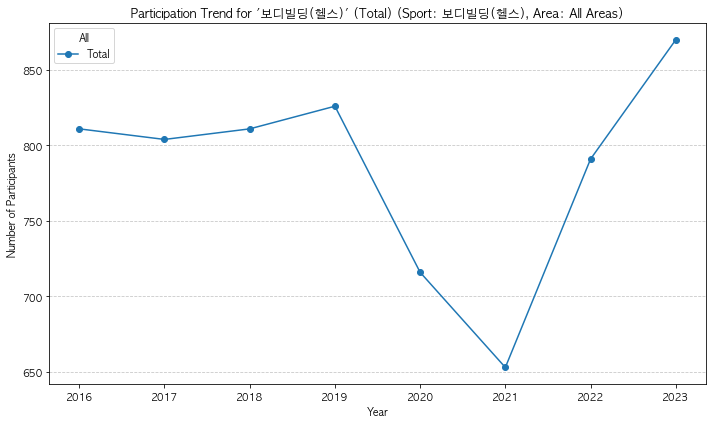

Trend Data for '보디빌딩(헬스)' (Total) (Sport: 보디빌딩(헬스), Area: All Areas):
   dyear  count
0   2016    811
1   2017    804
2   2018    811
3   2019    826
4   2020    716
5   2021    653
6   2022    791
7   2023    870

--- Showing trend for '등산' for all ---


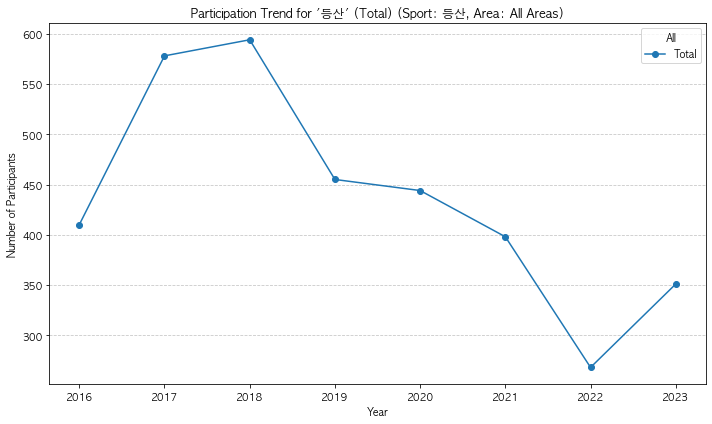

Trend Data for '등산' (Total) (Sport: 등산, Area: All Areas):
   dyear  count
0   2016    410
1   2017    578
2   2018    594
3   2019    455
4   2020    444
5   2021    398
6   2022    268
7   2023    351

--- Showing trend for '수영' for all ---


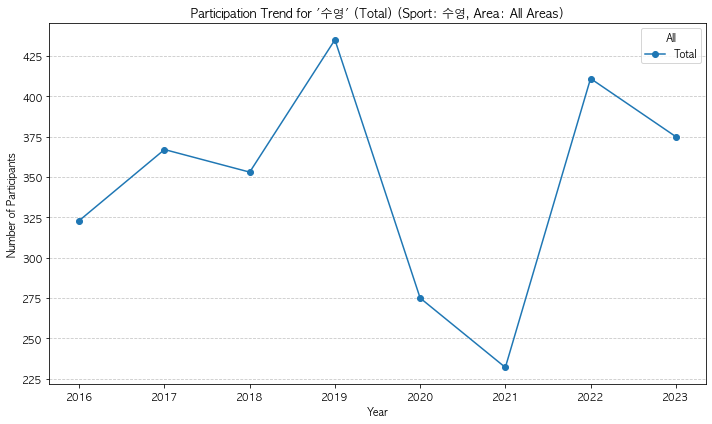

Trend Data for '수영' (Total) (Sport: 수영, Area: All Areas):
   dyear  count
0   2016    323
1   2017    367
2   2018    353
3   2019    435
4   2020    275
5   2021    232
6   2022    411
7   2023    375

--- Showing trend for '요가, 필라테스, 태보' for all ---


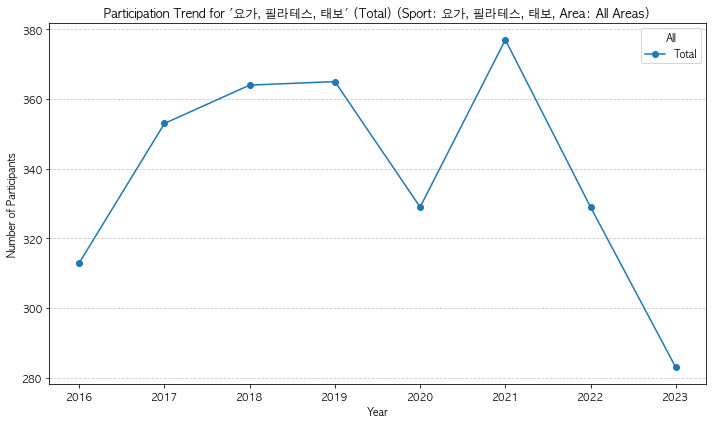

Trend Data for '요가, 필라테스, 태보' (Total) (Sport: 요가, 필라테스, 태보, Area: All Areas):
   dyear  count
0   2016    313
1   2017    353
2   2018    364
3   2019    365
4   2020    329
5   2021    377
6   2022    329
7   2023    283

--- Showing trend for '축구, 풋살' for all ---


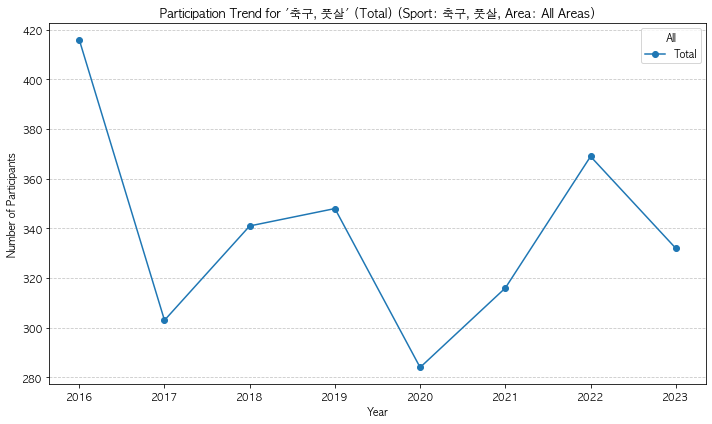

Trend Data for '축구, 풋살' (Total) (Sport: 축구, 풋살, Area: All Areas):
   dyear  count
0   2016    416
1   2017    303
2   2018    341
3   2019    348
4   2020    284
5   2021    316
6   2022    369
7   2023    332

--- Showing trend for '골프(그라운드, 파크 포함)' for all ---


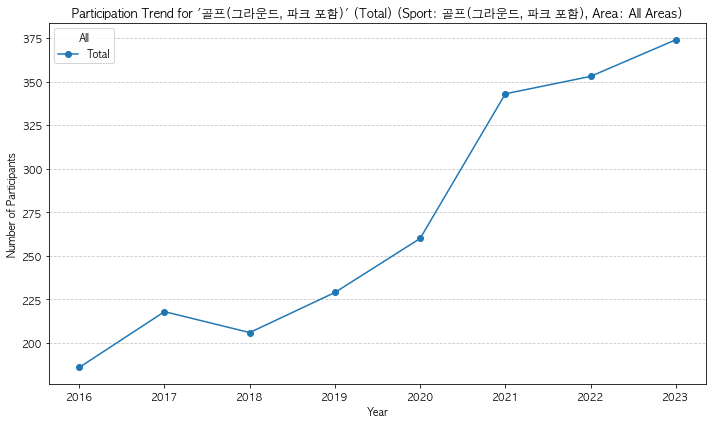

Trend Data for '골프(그라운드, 파크 포함)' (Total) (Sport: 골프(그라운드, 파크 포함), Area: All Areas):
   dyear  count
0   2016    186
1   2017    218
2   2018    206
3   2019    229
4   2020    260
5   2021    343
6   2022    353
7   2023    374

--- Showing trend for '자전거, 사이클, 산악자전거' for all ---


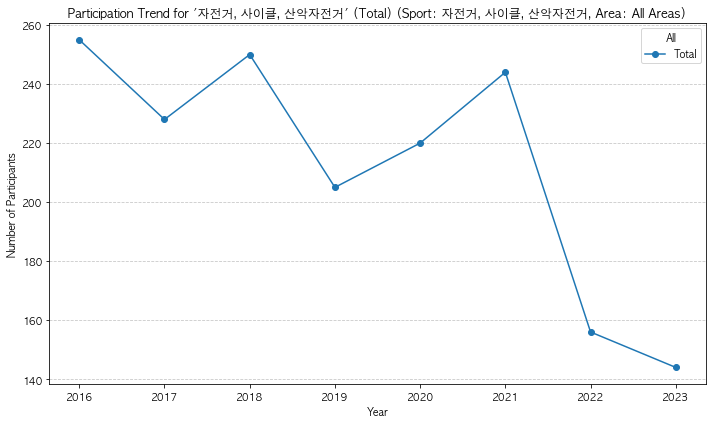

Trend Data for '자전거, 사이클, 산악자전거' (Total) (Sport: 자전거, 사이클, 산악자전거, Area: All Areas):
   dyear  count
0   2016    255
1   2017    228
2   2018    250
3   2019    205
4   2020    220
5   2021    244
6   2022    156
7   2023    144

--- Showing trend for '배드민턴' for all ---


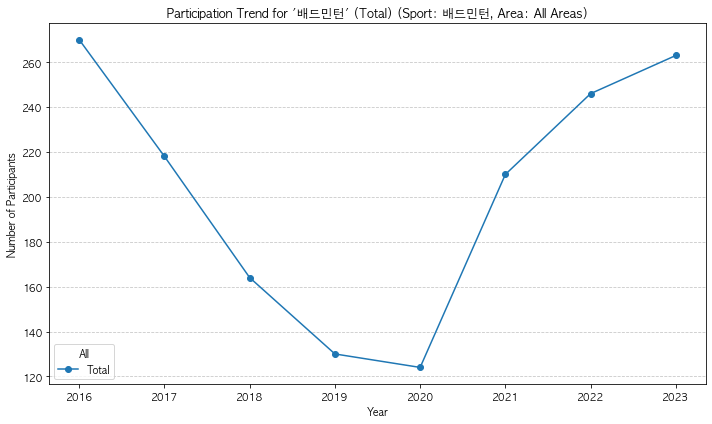

Trend Data for '배드민턴' (Total) (Sport: 배드민턴, Area: All Areas):
   dyear  count
0   2016    270
1   2017    218
2   2018    164
3   2019    130
4   2020    124
5   2021    210
6   2022    246
7   2023    263

--- Showing trend for '체조(맨손체조, 생활체조)' for all ---


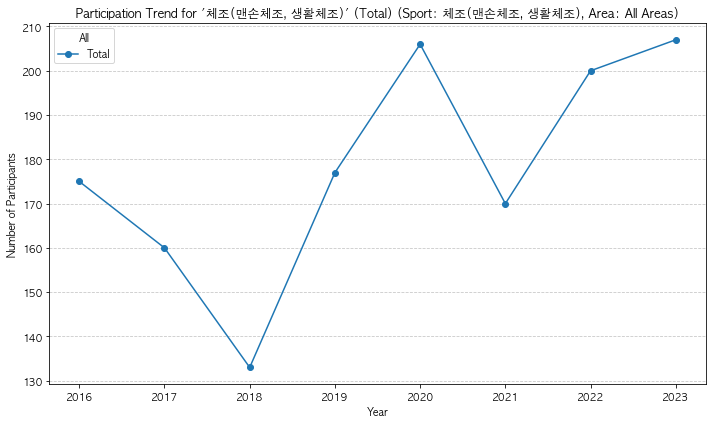

Trend Data for '체조(맨손체조, 생활체조)' (Total) (Sport: 체조(맨손체조, 생활체조), Area: All Areas):
   dyear  count
0   2016    175
1   2017    160
2   2018    133
3   2019    177
4   2020    206
5   2021    170
6   2022    200
7   2023    207

--- Showing trend for '농구' for all ---


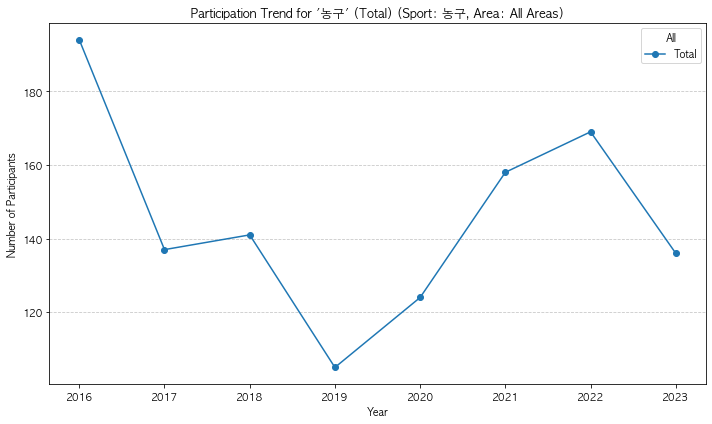

Trend Data for '농구' (Total) (Sport: 농구, Area: All Areas):
   dyear  count
0   2016    194
1   2017    137
2   2018    141
3   2019    105
4   2020    124
5   2021    158
6   2022    169
7   2023    136

--- Showing trend for '당구, 포켓볼' for all ---


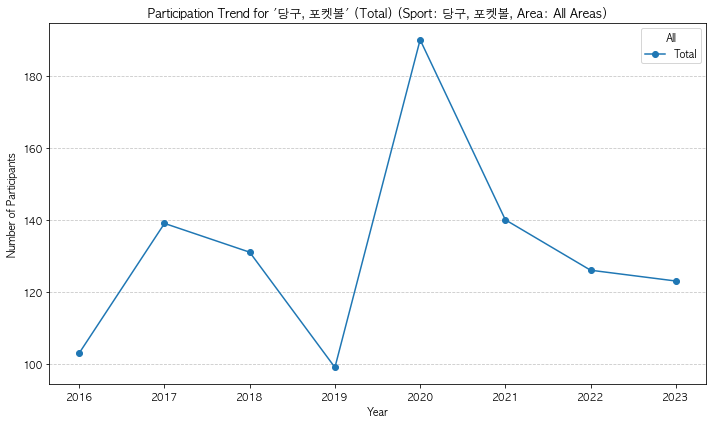

Trend Data for '당구, 포켓볼' (Total) (Sport: 당구, 포켓볼, Area: All Areas):
   dyear  count
0   2016    103
1   2017    139
2   2018    131
3   2019     99
4   2020    190
5   2021    140
6   2022    126
7   2023    123

--- Showing trend for '탁구' for all ---


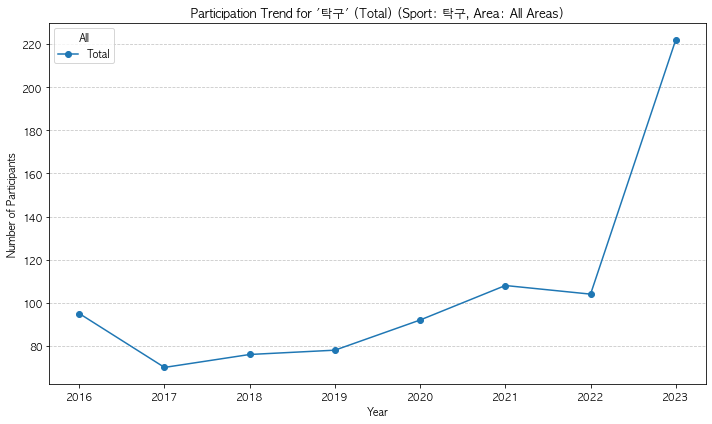

Trend Data for '탁구' (Total) (Sport: 탁구, Area: All Areas):
   dyear  count
0   2016     95
1   2017     70
2   2018     76
3   2019     78
4   2020     92
5   2021    108
6   2022    104
7   2023    222

--- Showing trend for '볼링' for all ---


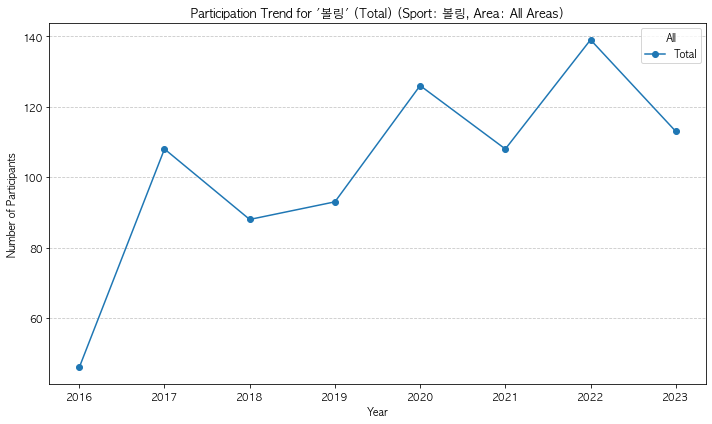

Trend Data for '볼링' (Total) (Sport: 볼링, Area: All Areas):
   dyear  count
0   2016     46
1   2017    108
2   2018     88
3   2019     93
4   2020    126
5   2021    108
6   2022    139
7   2023    113

--- Showing trend for '에어로빅' for all ---


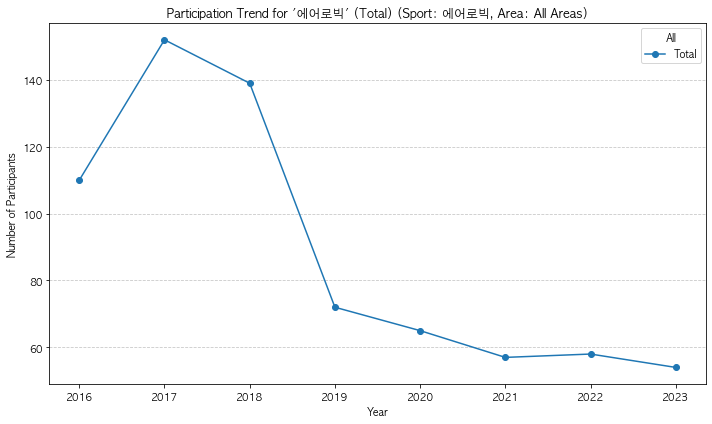

Trend Data for '에어로빅' (Total) (Sport: 에어로빅, Area: All Areas):
   dyear  count
0   2016    110
1   2017    152
2   2018    139
3   2019     72
4   2020     65
5   2021     57
6   2022     58
7   2023     54

--- Showing trend for '줄넘기' for all ---


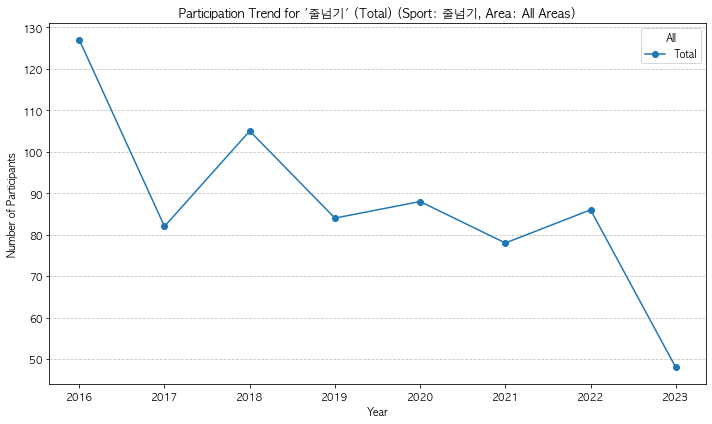

Trend Data for '줄넘기' (Total) (Sport: 줄넘기, Area: All Areas):
   dyear  count
0   2016    127
1   2017     82
2   2018    105
3   2019     84
4   2020     88
5   2021     78
6   2022     86
7   2023     48

--- Showing trend for '테니스' for all ---


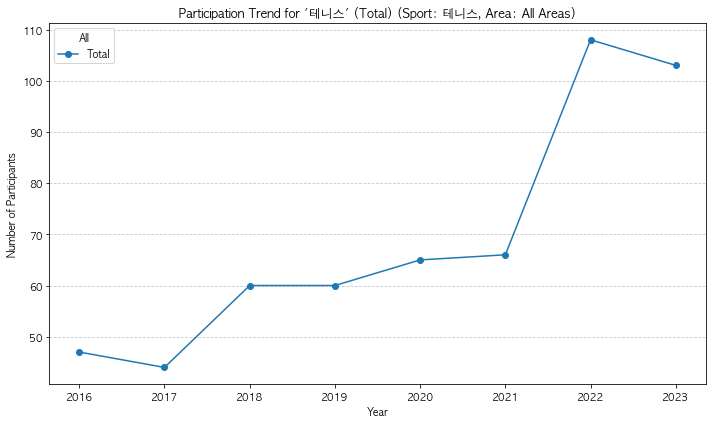

Trend Data for '테니스' (Total) (Sport: 테니스, Area: All Areas):
   dyear  count
0   2016     47
1   2017     44
2   2018     60
3   2019     60
4   2020     65
5   2021     66
6   2022    108
7   2023    103

--- Showing trend for '태권도' for all ---


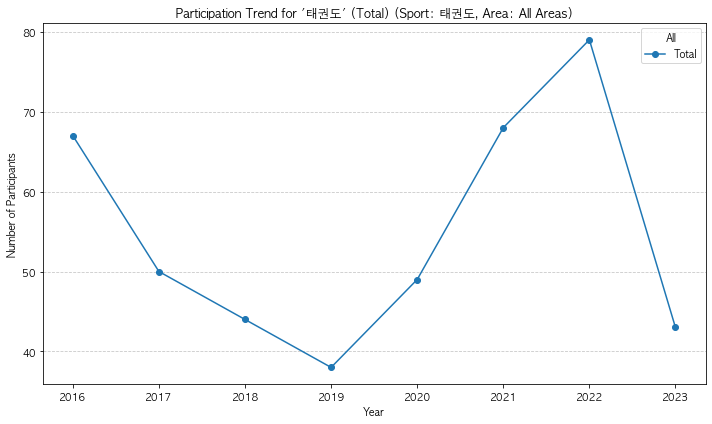

Trend Data for '태권도' (Total) (Sport: 태권도, Area: All Areas):
   dyear  count
0   2016     67
1   2017     50
2   2018     44
3   2019     38
4   2020     49
5   2021     68
6   2022     79
7   2023     43

--- Showing trend for '낚시' for all ---


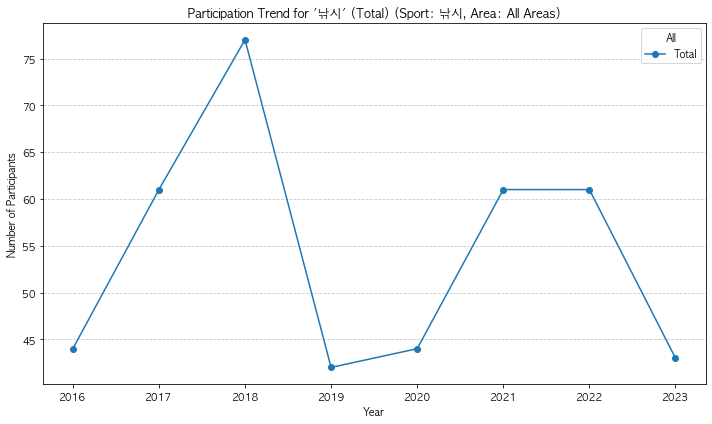

Trend Data for '낚시' (Total) (Sport: 낚시, Area: All Areas):
   dyear  count
0   2016     44
1   2017     61
2   2018     77
3   2019     42
4   2020     44
5   2021     61
6   2022     61
7   2023     43

--- Showing trend for '육상(걷기, 마라톤 제외)' for all ---


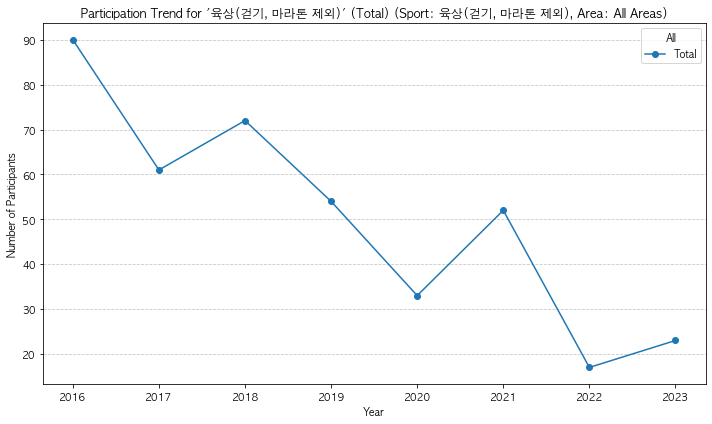

Trend Data for '육상(걷기, 마라톤 제외)' (Total) (Sport: 육상(걷기, 마라톤 제외), Area: All Areas):
   dyear  count
0   2016     90
1   2017     61
2   2018     72
3   2019     54
4   2020     33
5   2021     52
6   2022     17
7   2023     23


In [92]:
# Get the top 20 most frequent sports in the 'ksport' column
top_20_sports = df['ksport'].value_counts().head(20).index.tolist()

# Loop through each sport and call show_trend for 'cage'
for sport in top_20_sports:
    print(f"\n--- Showing trend for '{sport}' for all ---")
    show_trend(df, filter_type='all', ksport=sport)

## 골프는 COVID19때 증가하면서 계속 증가. 연속성이 중요?
## 반대로 걷기는 COVID19때 증가했지만, 다시 돌아옴. 연속성이 필요 없음? Investment 관점? 투자 - 수익? 재매있을듯.

## RQ: Area Effects?

#### Need to combine facility information.


--- Showing trend for '걷기(조깅, 속보)' of '서울' ---


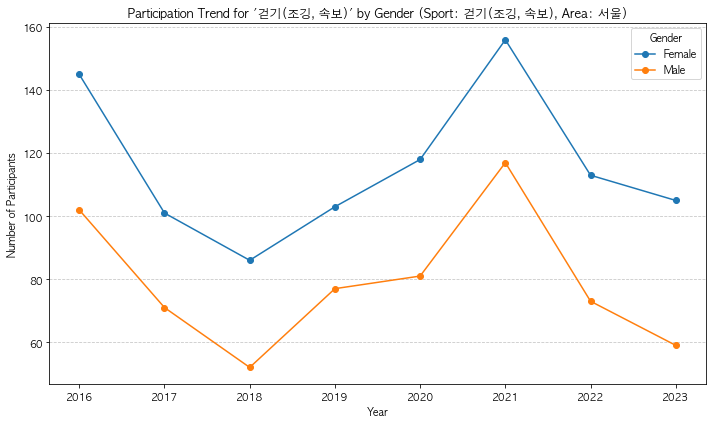

Trend Data for '걷기(조깅, 속보)' by Gender (Sport: 걷기(조깅, 속보), Area: 서울):
gender  Female  Male
dyear               
2016       145   102
2017       101    71
2018        86    52
2019       103    77
2020       118    81
2021       156   117
2022       113    73
2023       105    59

--- Showing trend for '걷기(조깅, 속보)' of '경기' ---


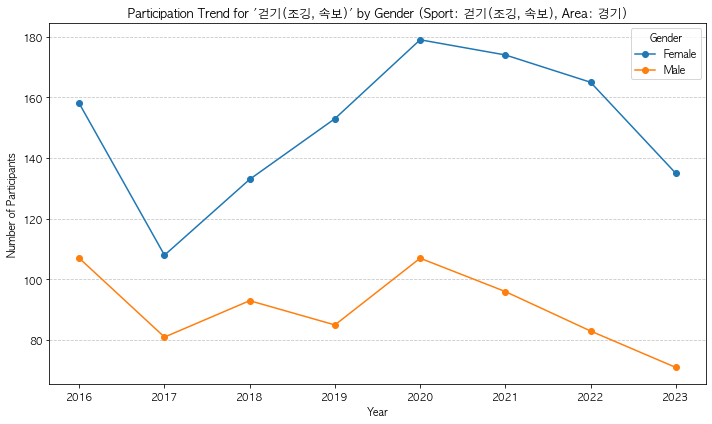

Trend Data for '걷기(조깅, 속보)' by Gender (Sport: 걷기(조깅, 속보), Area: 경기):
gender  Female  Male
dyear               
2016       158   107
2017       108    81
2018       133    93
2019       153    85
2020       179   107
2021       174    96
2022       165    83
2023       135    71

--- Showing trend for '걷기(조깅, 속보)' of '부산' ---


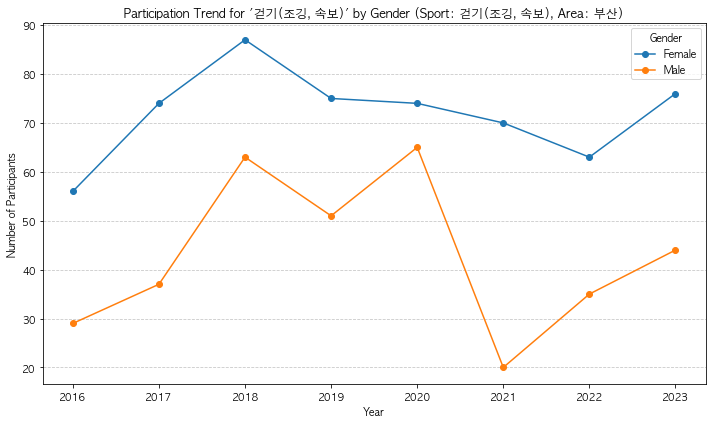

Trend Data for '걷기(조깅, 속보)' by Gender (Sport: 걷기(조깅, 속보), Area: 부산):
gender  Female  Male
dyear               
2016        56    29
2017        74    37
2018        87    63
2019        75    51
2020        74    65
2021        70    20
2022        63    35
2023        76    44

--- Showing trend for '보디빌딩(헬스)' of '서울' ---


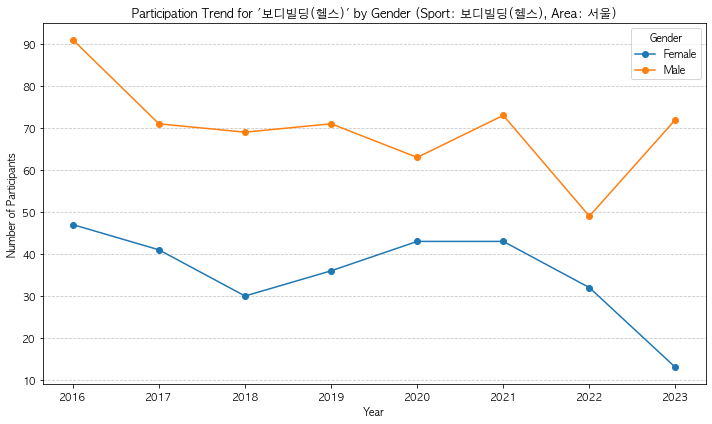

Trend Data for '보디빌딩(헬스)' by Gender (Sport: 보디빌딩(헬스), Area: 서울):
gender  Female  Male
dyear               
2016        47    91
2017        41    71
2018        30    69
2019        36    71
2020        43    63
2021        43    73
2022        32    49
2023        13    72

--- Showing trend for '보디빌딩(헬스)' of '경기' ---


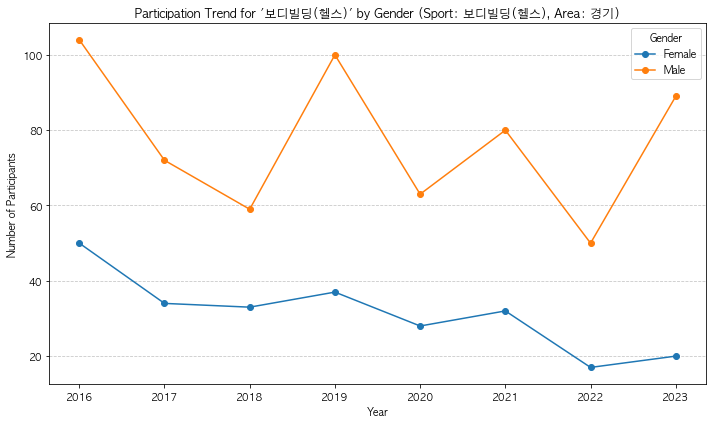

Trend Data for '보디빌딩(헬스)' by Gender (Sport: 보디빌딩(헬스), Area: 경기):
gender  Female  Male
dyear               
2016        50   104
2017        34    72
2018        33    59
2019        37   100
2020        28    63
2021        32    80
2022        17    50
2023        20    89

--- Showing trend for '보디빌딩(헬스)' of '부산' ---


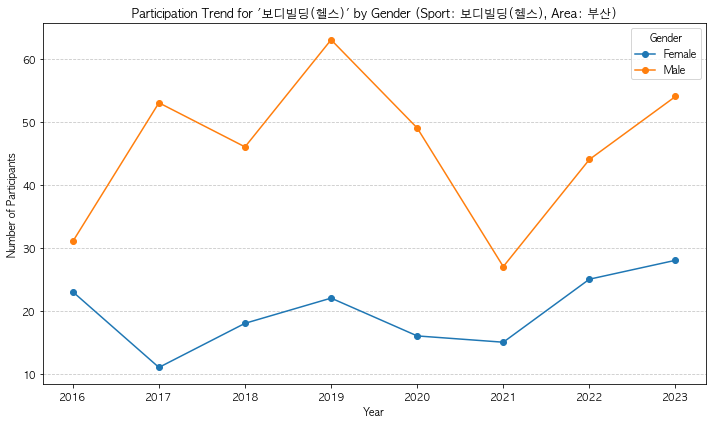

Trend Data for '보디빌딩(헬스)' by Gender (Sport: 보디빌딩(헬스), Area: 부산):
gender  Female  Male
dyear               
2016        23    31
2017        11    53
2018        18    46
2019        22    63
2020        16    49
2021        15    27
2022        25    44
2023        28    54

--- Showing trend for '등산' of '서울' ---


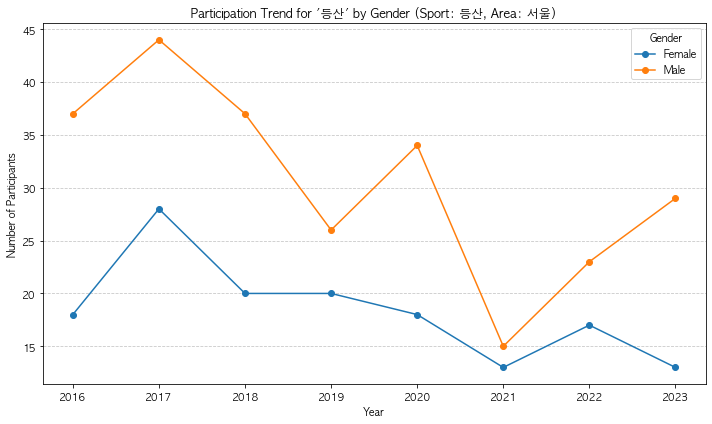

Trend Data for '등산' by Gender (Sport: 등산, Area: 서울):
gender  Female  Male
dyear               
2016        18    37
2017        28    44
2018        20    37
2019        20    26
2020        18    34
2021        13    15
2022        17    23
2023        13    29

--- Showing trend for '등산' of '경기' ---


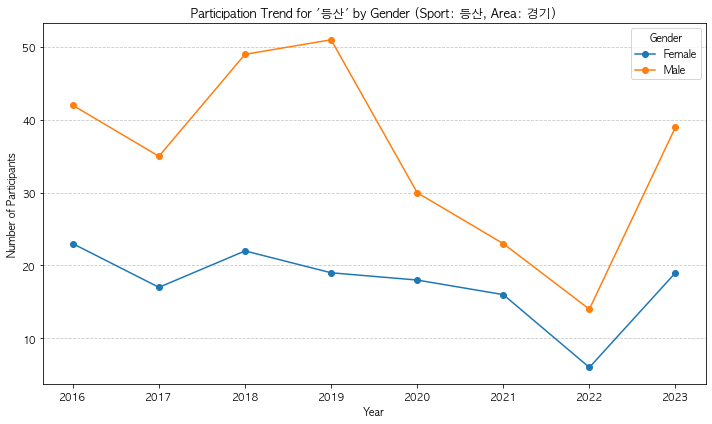

Trend Data for '등산' by Gender (Sport: 등산, Area: 경기):
gender  Female  Male
dyear               
2016        23    42
2017        17    35
2018        22    49
2019        19    51
2020        18    30
2021        16    23
2022         6    14
2023        19    39

--- Showing trend for '등산' of '부산' ---


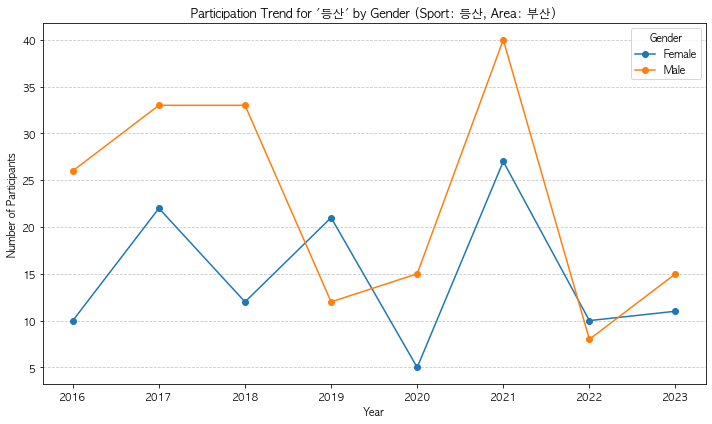

Trend Data for '등산' by Gender (Sport: 등산, Area: 부산):
gender  Female  Male
dyear               
2016        10    26
2017        22    33
2018        12    33
2019        21    12
2020         5    15
2021        27    40
2022        10     8
2023        11    15

--- Showing trend for '수영' of '서울' ---


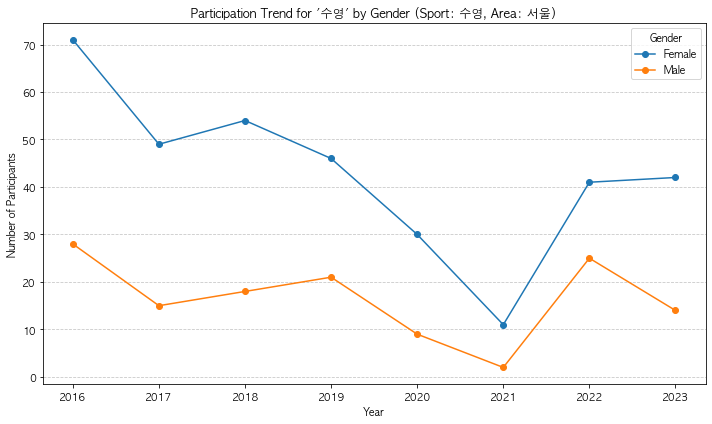

Trend Data for '수영' by Gender (Sport: 수영, Area: 서울):
gender  Female  Male
dyear               
2016        71    28
2017        49    15
2018        54    18
2019        46    21
2020        30     9
2021        11     2
2022        41    25
2023        42    14

--- Showing trend for '수영' of '경기' ---


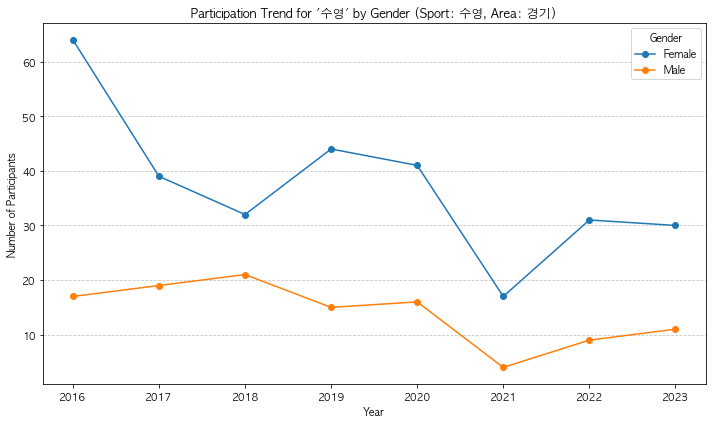

Trend Data for '수영' by Gender (Sport: 수영, Area: 경기):
gender  Female  Male
dyear               
2016        64    17
2017        39    19
2018        32    21
2019        44    15
2020        41    16
2021        17     4
2022        31     9
2023        30    11

--- Showing trend for '수영' of '부산' ---


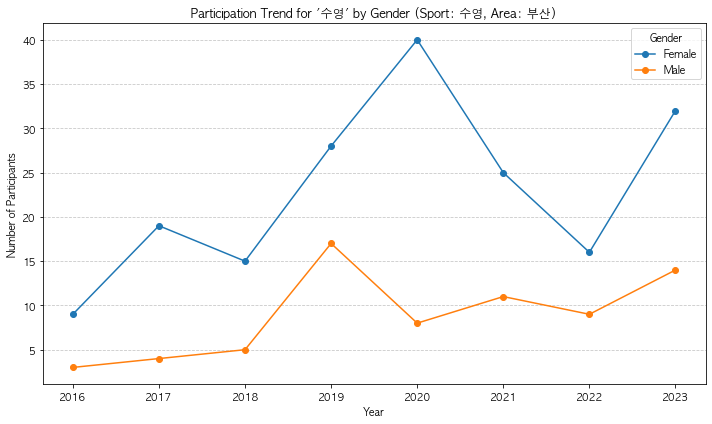

Trend Data for '수영' by Gender (Sport: 수영, Area: 부산):
gender  Female  Male
dyear               
2016         9     3
2017        19     4
2018        15     5
2019        28    17
2020        40     8
2021        25    11
2022        16     9
2023        32    14

--- Showing trend for '요가, 필라테스, 태보' of '서울' ---


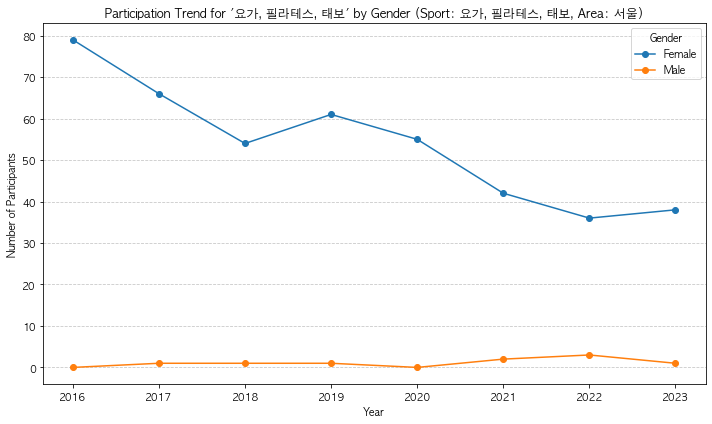

Trend Data for '요가, 필라테스, 태보' by Gender (Sport: 요가, 필라테스, 태보, Area: 서울):
gender  Female  Male
dyear               
2016        79     0
2017        66     1
2018        54     1
2019        61     1
2020        55     0
2021        42     2
2022        36     3
2023        38     1

--- Showing trend for '요가, 필라테스, 태보' of '경기' ---


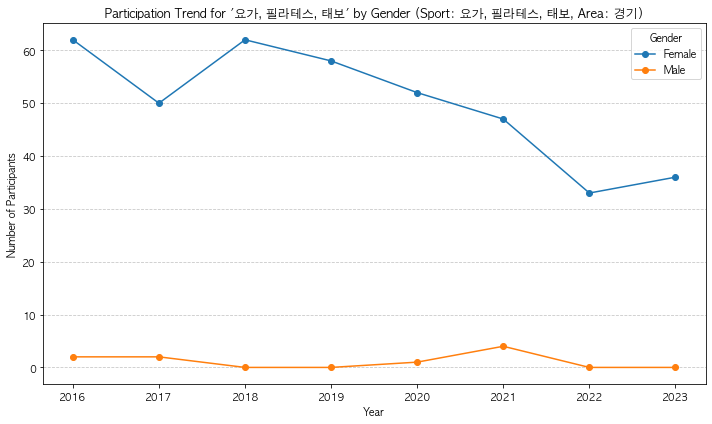

Trend Data for '요가, 필라테스, 태보' by Gender (Sport: 요가, 필라테스, 태보, Area: 경기):
gender  Female  Male
dyear               
2016        62     2
2017        50     2
2018        62     0
2019        58     0
2020        52     1
2021        47     4
2022        33     0
2023        36     0

--- Showing trend for '요가, 필라테스, 태보' of '부산' ---


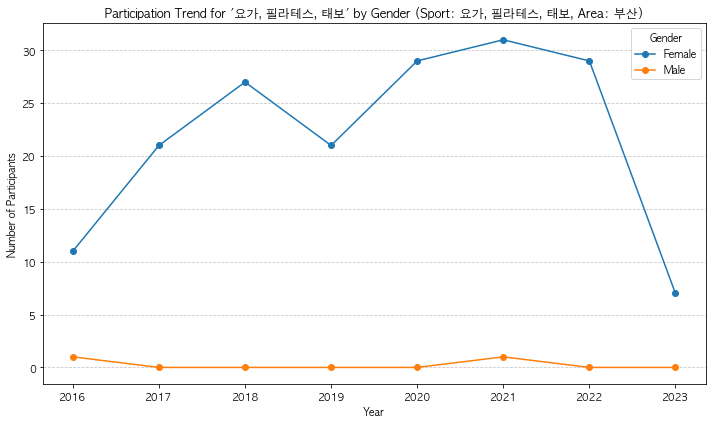

Trend Data for '요가, 필라테스, 태보' by Gender (Sport: 요가, 필라테스, 태보, Area: 부산):
gender  Female  Male
dyear               
2016        11     1
2017        21     0
2018        27     0
2019        21     0
2020        29     0
2021        31     1
2022        29     0
2023         7     0

--- Showing trend for '축구, 풋살' of '서울' ---


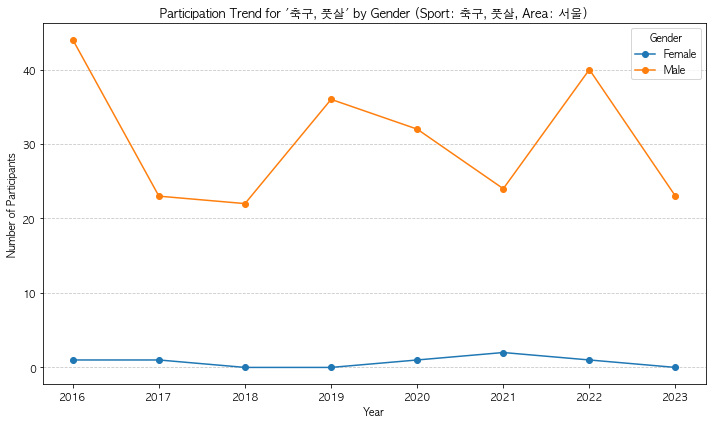

Trend Data for '축구, 풋살' by Gender (Sport: 축구, 풋살, Area: 서울):
gender  Female  Male
dyear               
2016         1    44
2017         1    23
2018         0    22
2019         0    36
2020         1    32
2021         2    24
2022         1    40
2023         0    23

--- Showing trend for '축구, 풋살' of '경기' ---


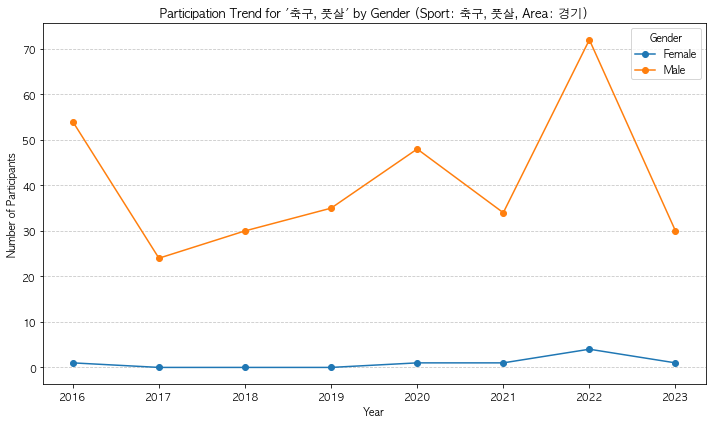

Trend Data for '축구, 풋살' by Gender (Sport: 축구, 풋살, Area: 경기):
gender  Female  Male
dyear               
2016         1    54
2017         0    24
2018         0    30
2019         0    35
2020         1    48
2021         1    34
2022         4    72
2023         1    30

--- Showing trend for '축구, 풋살' of '부산' ---


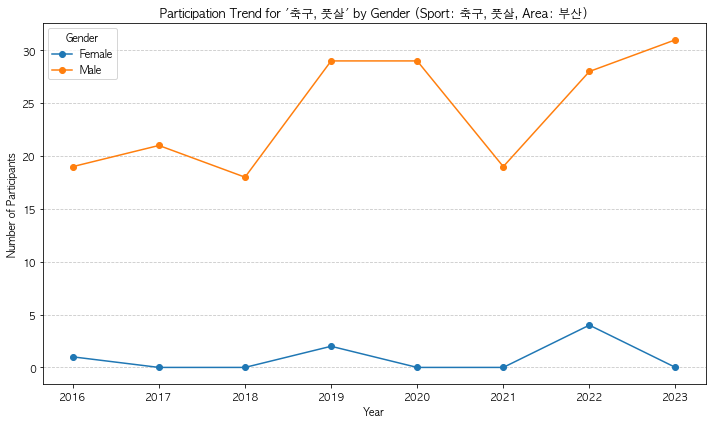

Trend Data for '축구, 풋살' by Gender (Sport: 축구, 풋살, Area: 부산):
gender  Female  Male
dyear               
2016         1    19
2017         0    21
2018         0    18
2019         2    29
2020         0    29
2021         0    19
2022         4    28
2023         0    31

--- Showing trend for '골프(그라운드, 파크 포함)' of '서울' ---


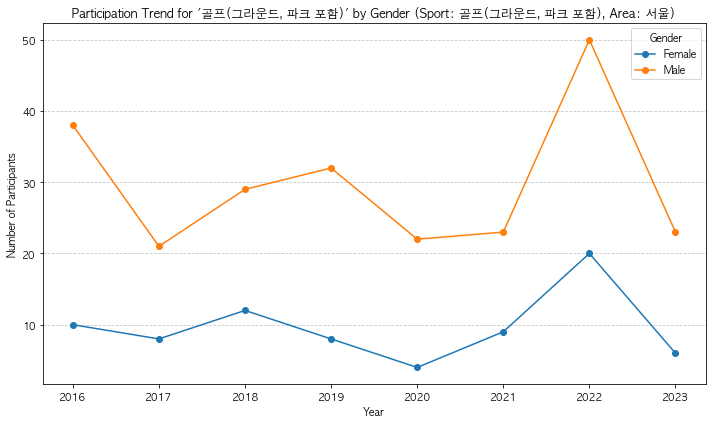

Trend Data for '골프(그라운드, 파크 포함)' by Gender (Sport: 골프(그라운드, 파크 포함), Area: 서울):
gender  Female  Male
dyear               
2016        10    38
2017         8    21
2018        12    29
2019         8    32
2020         4    22
2021         9    23
2022        20    50
2023         6    23

--- Showing trend for '골프(그라운드, 파크 포함)' of '경기' ---


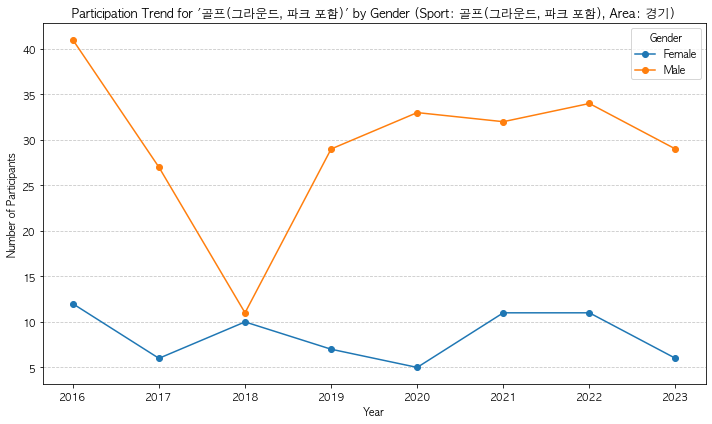

Trend Data for '골프(그라운드, 파크 포함)' by Gender (Sport: 골프(그라운드, 파크 포함), Area: 경기):
gender  Female  Male
dyear               
2016        12    41
2017         6    27
2018        10    11
2019         7    29
2020         5    33
2021        11    32
2022        11    34
2023         6    29

--- Showing trend for '골프(그라운드, 파크 포함)' of '부산' ---


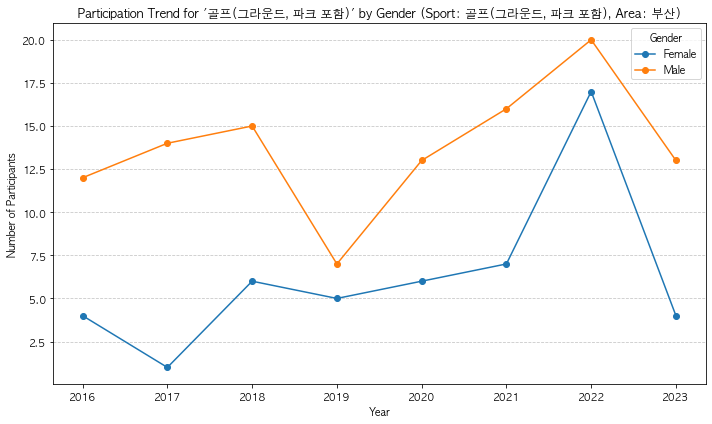

Trend Data for '골프(그라운드, 파크 포함)' by Gender (Sport: 골프(그라운드, 파크 포함), Area: 부산):
gender  Female  Male
dyear               
2016         4    12
2017         1    14
2018         6    15
2019         5     7
2020         6    13
2021         7    16
2022        17    20
2023         4    13

--- Showing trend for '자전거, 사이클, 산악자전거' of '서울' ---


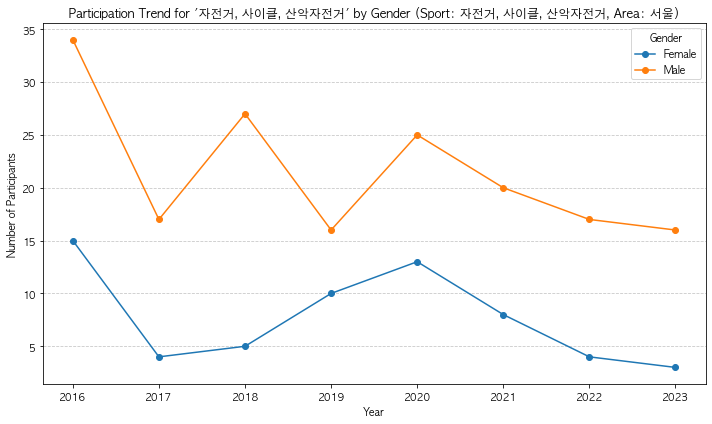

Trend Data for '자전거, 사이클, 산악자전거' by Gender (Sport: 자전거, 사이클, 산악자전거, Area: 서울):
gender  Female  Male
dyear               
2016        15    34
2017         4    17
2018         5    27
2019        10    16
2020        13    25
2021         8    20
2022         4    17
2023         3    16

--- Showing trend for '자전거, 사이클, 산악자전거' of '경기' ---


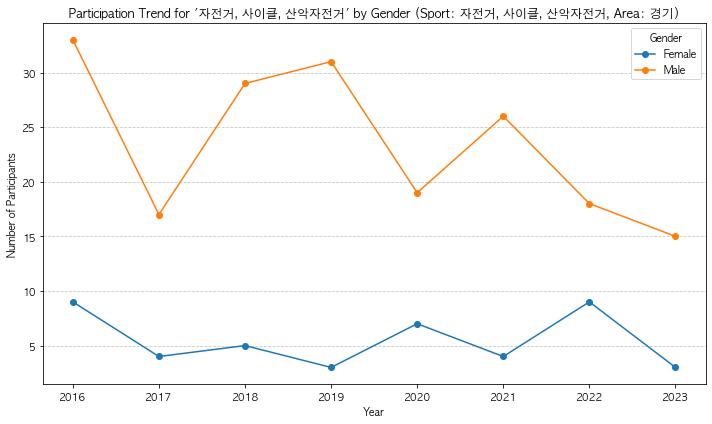

Trend Data for '자전거, 사이클, 산악자전거' by Gender (Sport: 자전거, 사이클, 산악자전거, Area: 경기):
gender  Female  Male
dyear               
2016         9    33
2017         4    17
2018         5    29
2019         3    31
2020         7    19
2021         4    26
2022         9    18
2023         3    15

--- Showing trend for '자전거, 사이클, 산악자전거' of '부산' ---


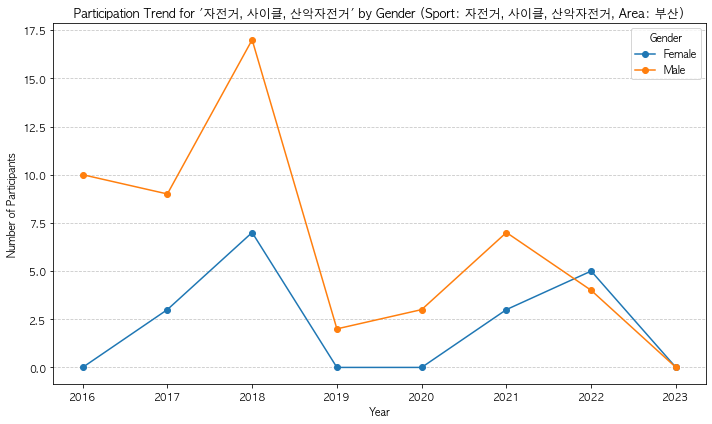

Trend Data for '자전거, 사이클, 산악자전거' by Gender (Sport: 자전거, 사이클, 산악자전거, Area: 부산):
gender  Female  Male
dyear               
2016         0    10
2017         3     9
2018         7    17
2019         0     2
2020         0     3
2021         3     7
2022         5     4
2023         0     0

--- Showing trend for '배드민턴' of '서울' ---


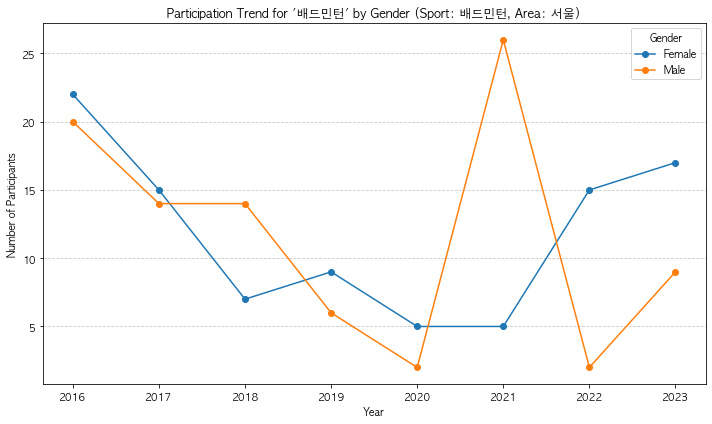

Trend Data for '배드민턴' by Gender (Sport: 배드민턴, Area: 서울):
gender  Female  Male
dyear               
2016        22    20
2017        15    14
2018         7    14
2019         9     6
2020         5     2
2021         5    26
2022        15     2
2023        17     9

--- Showing trend for '배드민턴' of '경기' ---


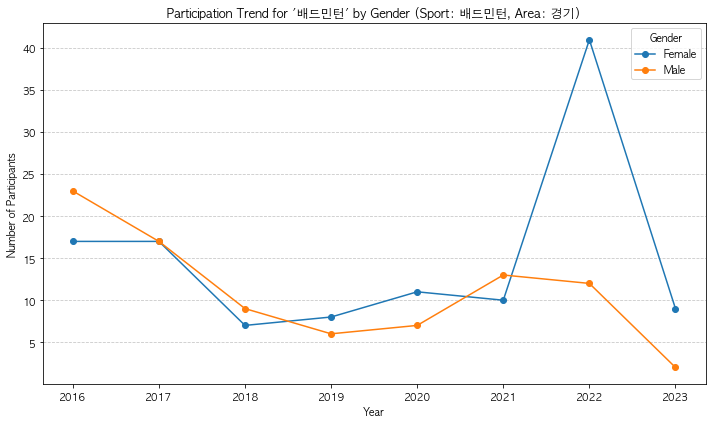

Trend Data for '배드민턴' by Gender (Sport: 배드민턴, Area: 경기):
gender  Female  Male
dyear               
2016        17    23
2017        17    17
2018         7     9
2019         8     6
2020        11     7
2021        10    13
2022        41    12
2023         9     2

--- Showing trend for '배드민턴' of '부산' ---


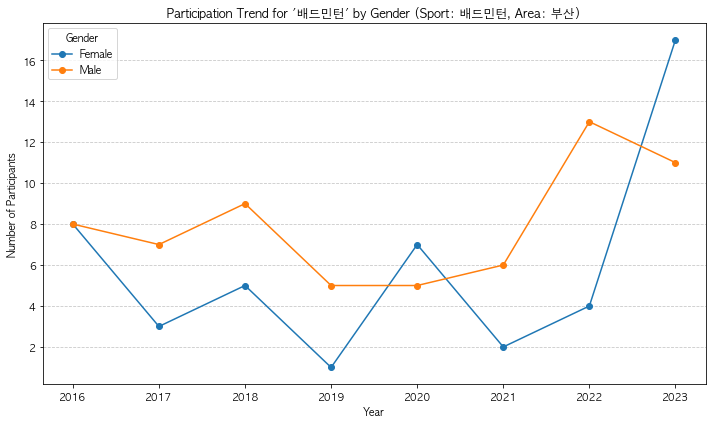

Trend Data for '배드민턴' by Gender (Sport: 배드민턴, Area: 부산):
gender  Female  Male
dyear               
2016         8     8
2017         3     7
2018         5     9
2019         1     5
2020         7     5
2021         2     6
2022         4    13
2023        17    11

--- Showing trend for '체조(맨손체조, 생활체조)' of '서울' ---


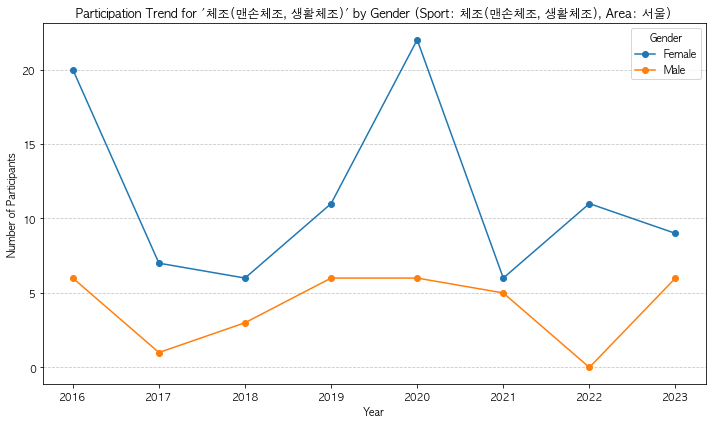

Trend Data for '체조(맨손체조, 생활체조)' by Gender (Sport: 체조(맨손체조, 생활체조), Area: 서울):
gender  Female  Male
dyear               
2016        20     6
2017         7     1
2018         6     3
2019        11     6
2020        22     6
2021         6     5
2022        11     0
2023         9     6

--- Showing trend for '체조(맨손체조, 생활체조)' of '경기' ---


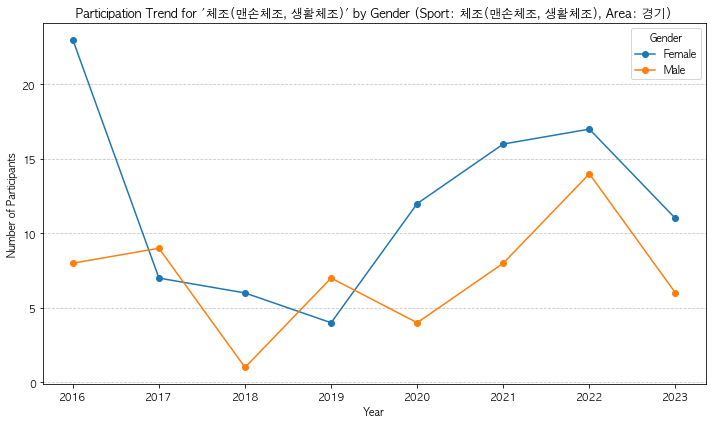

Trend Data for '체조(맨손체조, 생활체조)' by Gender (Sport: 체조(맨손체조, 생활체조), Area: 경기):
gender  Female  Male
dyear               
2016        23     8
2017         7     9
2018         6     1
2019         4     7
2020        12     4
2021        16     8
2022        17    14
2023        11     6

--- Showing trend for '체조(맨손체조, 생활체조)' of '부산' ---


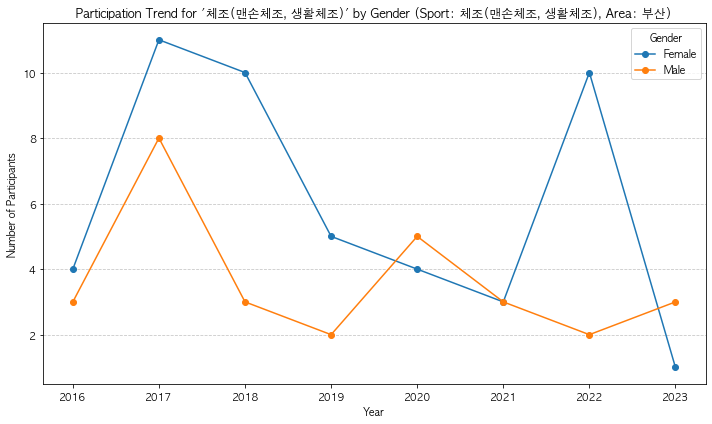

Trend Data for '체조(맨손체조, 생활체조)' by Gender (Sport: 체조(맨손체조, 생활체조), Area: 부산):
gender  Female  Male
dyear               
2016         4     3
2017        11     8
2018        10     3
2019         5     2
2020         4     5
2021         3     3
2022        10     2
2023         1     3

--- Showing trend for '농구' of '서울' ---


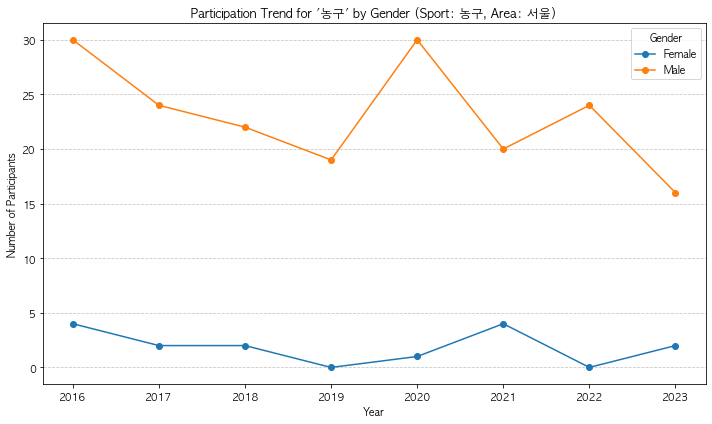

Trend Data for '농구' by Gender (Sport: 농구, Area: 서울):
gender  Female  Male
dyear               
2016         4    30
2017         2    24
2018         2    22
2019         0    19
2020         1    30
2021         4    20
2022         0    24
2023         2    16

--- Showing trend for '농구' of '경기' ---


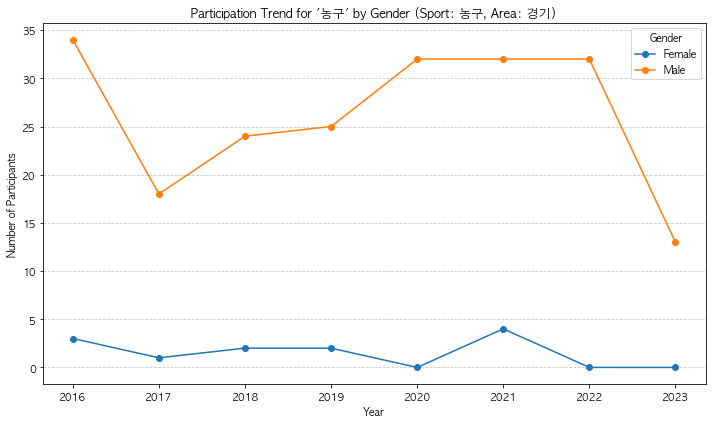

Trend Data for '농구' by Gender (Sport: 농구, Area: 경기):
gender  Female  Male
dyear               
2016         3    34
2017         1    18
2018         2    24
2019         2    25
2020         0    32
2021         4    32
2022         0    32
2023         0    13

--- Showing trend for '농구' of '부산' ---


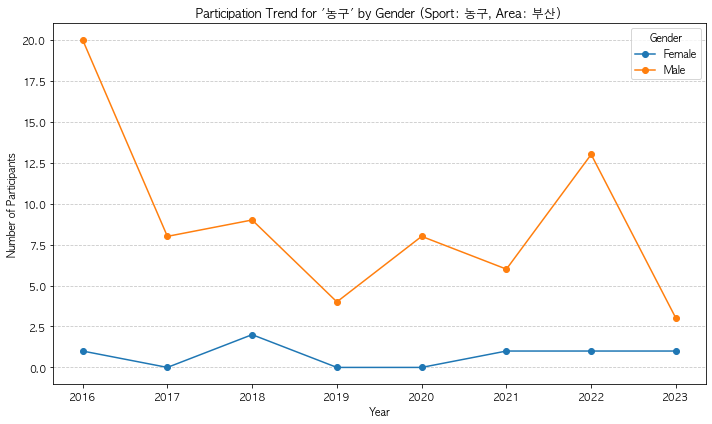

Trend Data for '농구' by Gender (Sport: 농구, Area: 부산):
gender  Female  Male
dyear               
2016         1    20
2017         0     8
2018         2     9
2019         0     4
2020         0     8
2021         1     6
2022         1    13
2023         1     3

--- Showing trend for '당구, 포켓볼' of '서울' ---


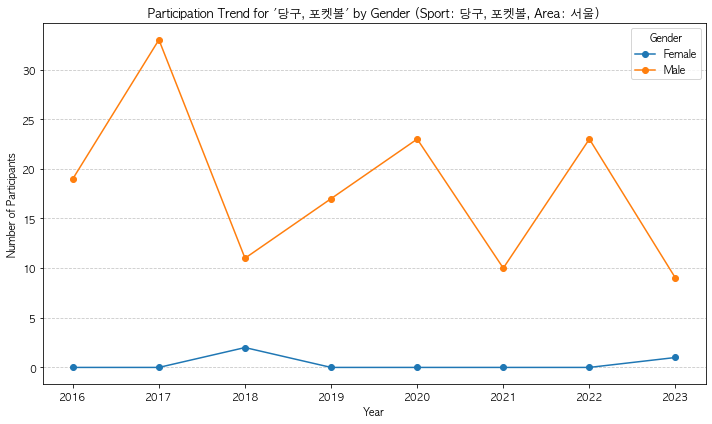

Trend Data for '당구, 포켓볼' by Gender (Sport: 당구, 포켓볼, Area: 서울):
gender  Female  Male
dyear               
2016         0    19
2017         0    33
2018         2    11
2019         0    17
2020         0    23
2021         0    10
2022         0    23
2023         1     9

--- Showing trend for '당구, 포켓볼' of '경기' ---


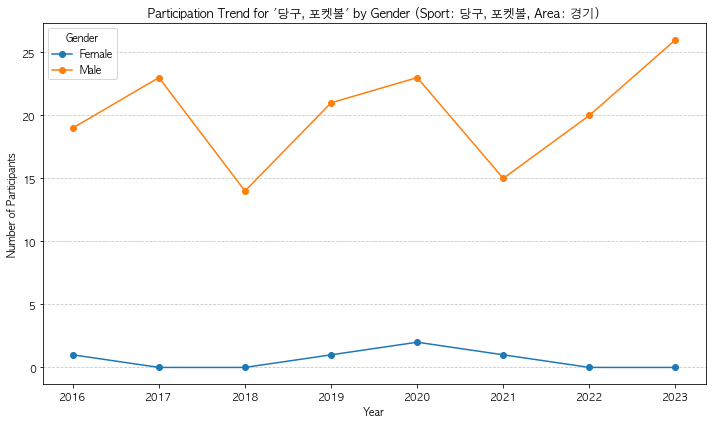

Trend Data for '당구, 포켓볼' by Gender (Sport: 당구, 포켓볼, Area: 경기):
gender  Female  Male
dyear               
2016         1    19
2017         0    23
2018         0    14
2019         1    21
2020         2    23
2021         1    15
2022         0    20
2023         0    26

--- Showing trend for '당구, 포켓볼' of '부산' ---


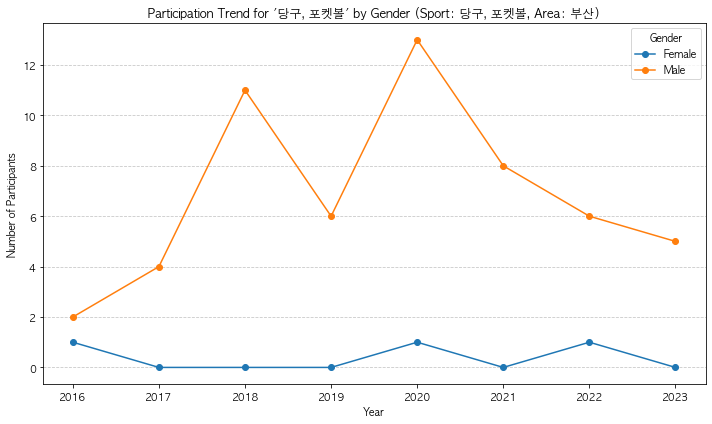

Trend Data for '당구, 포켓볼' by Gender (Sport: 당구, 포켓볼, Area: 부산):
gender  Female  Male
dyear               
2016         1     2
2017         0     4
2018         0    11
2019         0     6
2020         1    13
2021         0     8
2022         1     6
2023         0     5

--- Showing trend for '탁구' of '서울' ---


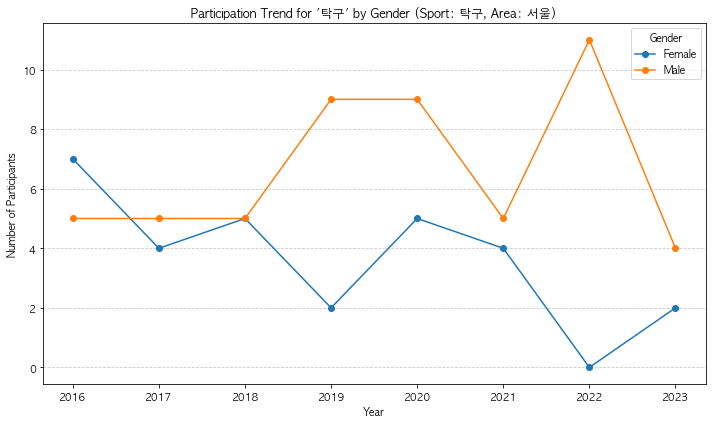

Trend Data for '탁구' by Gender (Sport: 탁구, Area: 서울):
gender  Female  Male
dyear               
2016         7     5
2017         4     5
2018         5     5
2019         2     9
2020         5     9
2021         4     5
2022         0    11
2023         2     4

--- Showing trend for '탁구' of '경기' ---


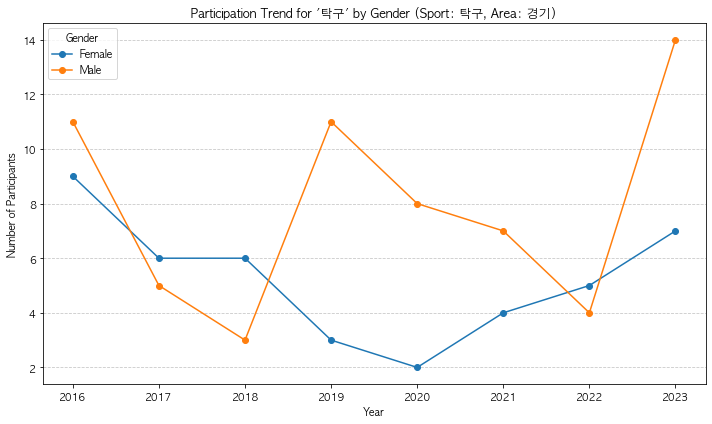

Trend Data for '탁구' by Gender (Sport: 탁구, Area: 경기):
gender  Female  Male
dyear               
2016         9    11
2017         6     5
2018         6     3
2019         3    11
2020         2     8
2021         4     7
2022         5     4
2023         7    14

--- Showing trend for '탁구' of '부산' ---


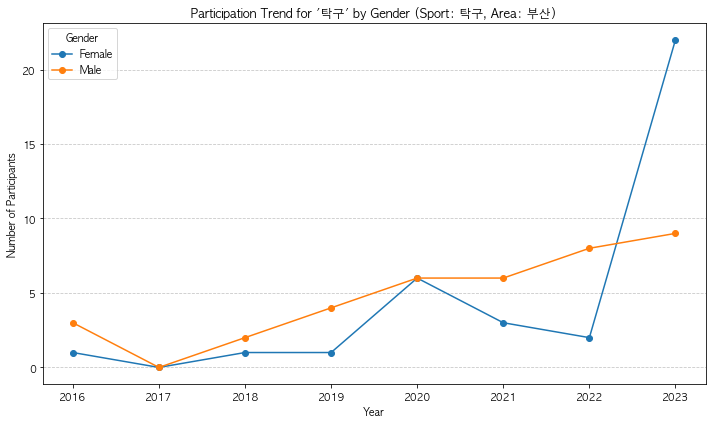

Trend Data for '탁구' by Gender (Sport: 탁구, Area: 부산):
gender  Female  Male
dyear               
2016         1     3
2017         0     0
2018         1     2
2019         1     4
2020         6     6
2021         3     6
2022         2     8
2023        22     9

--- Showing trend for '볼링' of '서울' ---


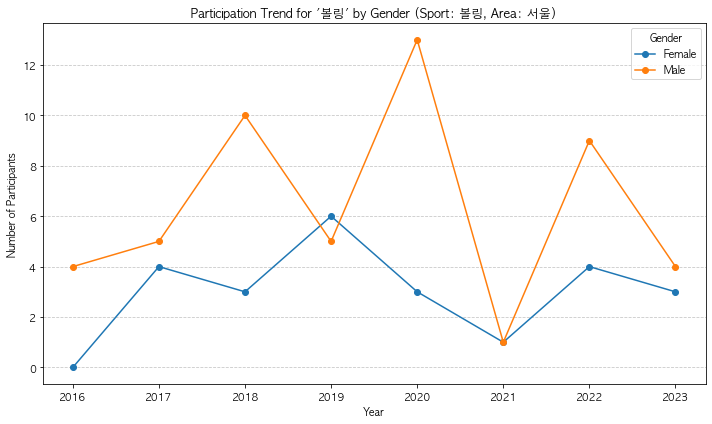

Trend Data for '볼링' by Gender (Sport: 볼링, Area: 서울):
gender  Female  Male
dyear               
2016         0     4
2017         4     5
2018         3    10
2019         6     5
2020         3    13
2021         1     1
2022         4     9
2023         3     4

--- Showing trend for '볼링' of '경기' ---


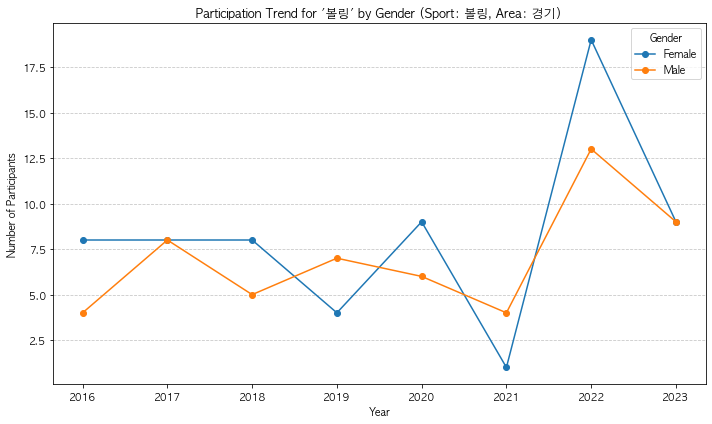

Trend Data for '볼링' by Gender (Sport: 볼링, Area: 경기):
gender  Female  Male
dyear               
2016         8     4
2017         8     8
2018         8     5
2019         4     7
2020         9     6
2021         1     4
2022        19    13
2023         9     9

--- Showing trend for '볼링' of '부산' ---


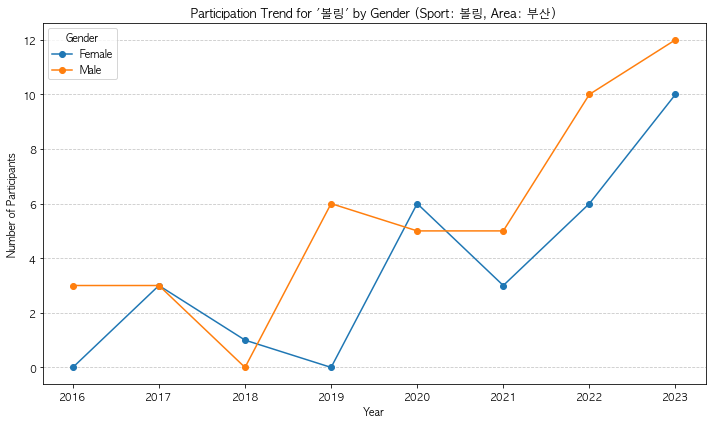

Trend Data for '볼링' by Gender (Sport: 볼링, Area: 부산):
gender  Female  Male
dyear               
2016         0     3
2017         3     3
2018         1     0
2019         0     6
2020         6     5
2021         3     5
2022         6    10
2023        10    12

--- Showing trend for '에어로빅' of '서울' ---


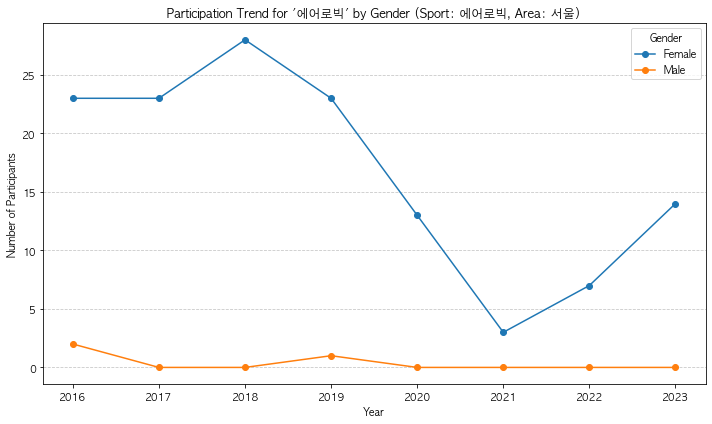

Trend Data for '에어로빅' by Gender (Sport: 에어로빅, Area: 서울):
gender  Female  Male
dyear               
2016        23     2
2017        23     0
2018        28     0
2019        23     1
2020        13     0
2021         3     0
2022         7     0
2023        14     0

--- Showing trend for '에어로빅' of '경기' ---


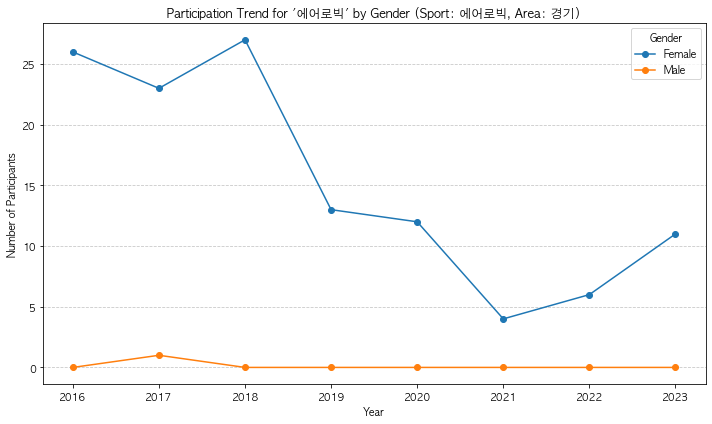

Trend Data for '에어로빅' by Gender (Sport: 에어로빅, Area: 경기):
gender  Female  Male
dyear               
2016        26     0
2017        23     1
2018        27     0
2019        13     0
2020        12     0
2021         4     0
2022         6     0
2023        11     0

--- Showing trend for '에어로빅' of '부산' ---


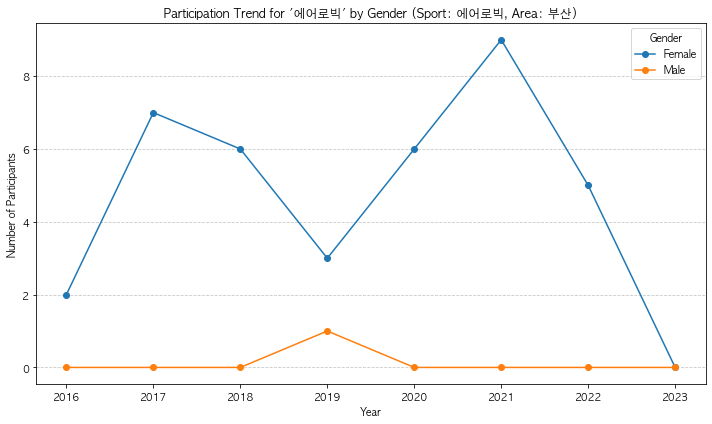

Trend Data for '에어로빅' by Gender (Sport: 에어로빅, Area: 부산):
gender  Female  Male
dyear               
2016         2     0
2017         7     0
2018         6     0
2019         3     1
2020         6     0
2021         9     0
2022         5     0
2023         0     0

--- Showing trend for '줄넘기' of '서울' ---


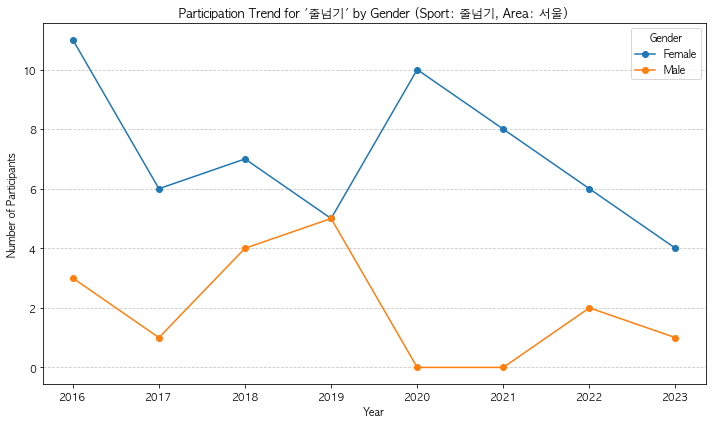

Trend Data for '줄넘기' by Gender (Sport: 줄넘기, Area: 서울):
gender  Female  Male
dyear               
2016        11     3
2017         6     1
2018         7     4
2019         5     5
2020        10     0
2021         8     0
2022         6     2
2023         4     1

--- Showing trend for '줄넘기' of '경기' ---


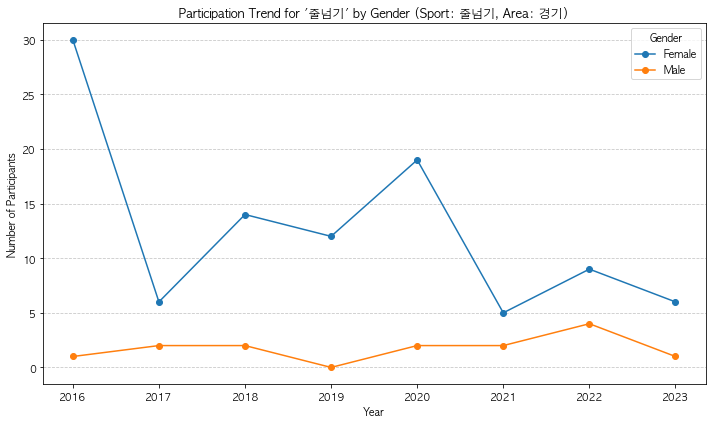

Trend Data for '줄넘기' by Gender (Sport: 줄넘기, Area: 경기):
gender  Female  Male
dyear               
2016        30     1
2017         6     2
2018        14     2
2019        12     0
2020        19     2
2021         5     2
2022         9     4
2023         6     1

--- Showing trend for '줄넘기' of '부산' ---


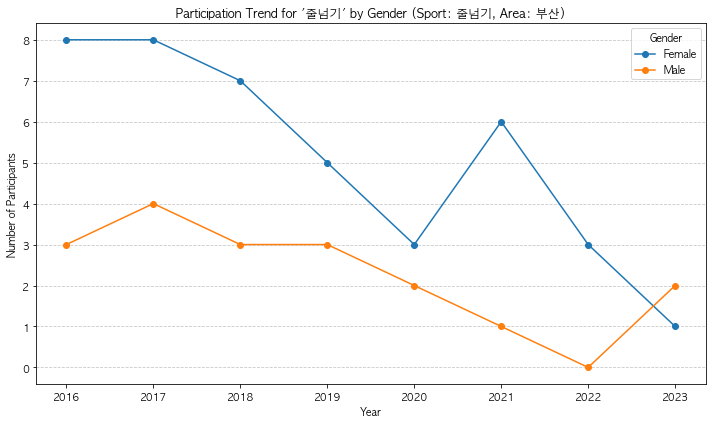

Trend Data for '줄넘기' by Gender (Sport: 줄넘기, Area: 부산):
gender  Female  Male
dyear               
2016         8     3
2017         8     4
2018         7     3
2019         5     3
2020         3     2
2021         6     1
2022         3     0
2023         1     2

--- Showing trend for '테니스' of '서울' ---


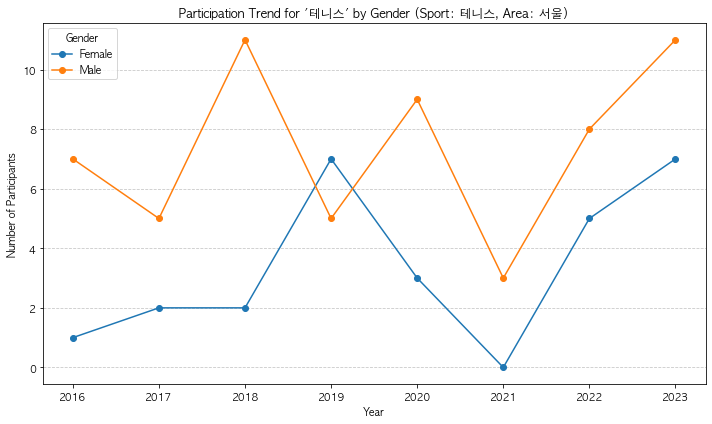

Trend Data for '테니스' by Gender (Sport: 테니스, Area: 서울):
gender  Female  Male
dyear               
2016         1     7
2017         2     5
2018         2    11
2019         7     5
2020         3     9
2021         0     3
2022         5     8
2023         7    11

--- Showing trend for '테니스' of '경기' ---


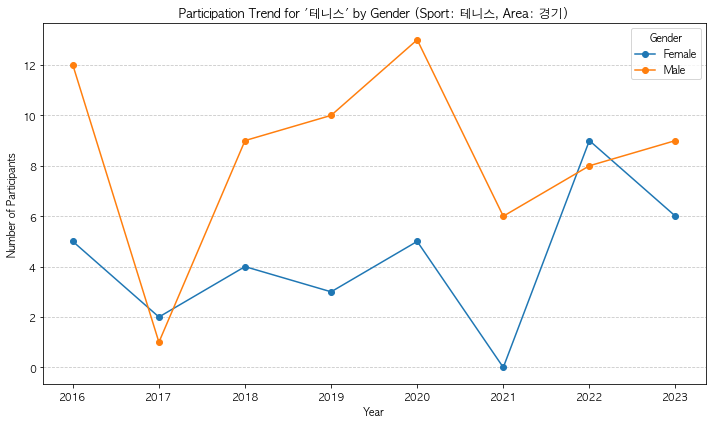

Trend Data for '테니스' by Gender (Sport: 테니스, Area: 경기):
gender  Female  Male
dyear               
2016         5    12
2017         2     1
2018         4     9
2019         3    10
2020         5    13
2021         0     6
2022         9     8
2023         6     9

--- Showing trend for '테니스' of '부산' ---


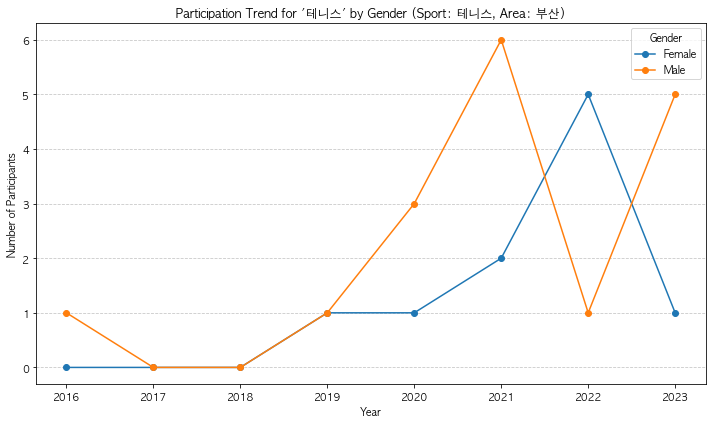

Trend Data for '테니스' by Gender (Sport: 테니스, Area: 부산):
gender  Female  Male
dyear               
2016         0     1
2017         0     0
2018         0     0
2019         1     1
2020         1     3
2021         2     6
2022         5     1
2023         1     5

--- Showing trend for '태권도' of '서울' ---


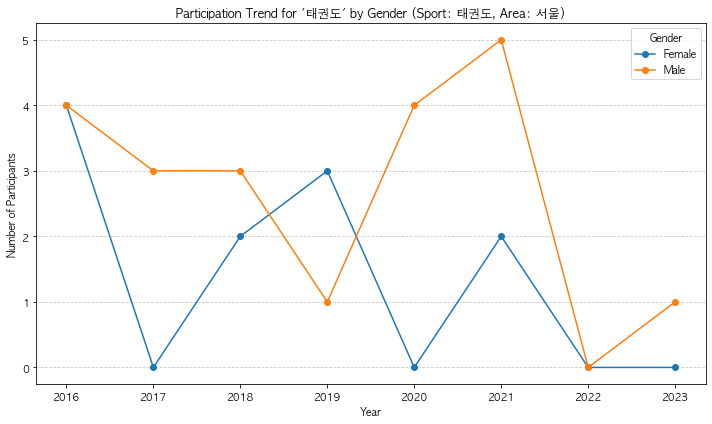

Trend Data for '태권도' by Gender (Sport: 태권도, Area: 서울):
gender  Female  Male
dyear               
2016         4     4
2017         0     3
2018         2     3
2019         3     1
2020         0     4
2021         2     5
2022         0     0
2023         0     1

--- Showing trend for '태권도' of '경기' ---


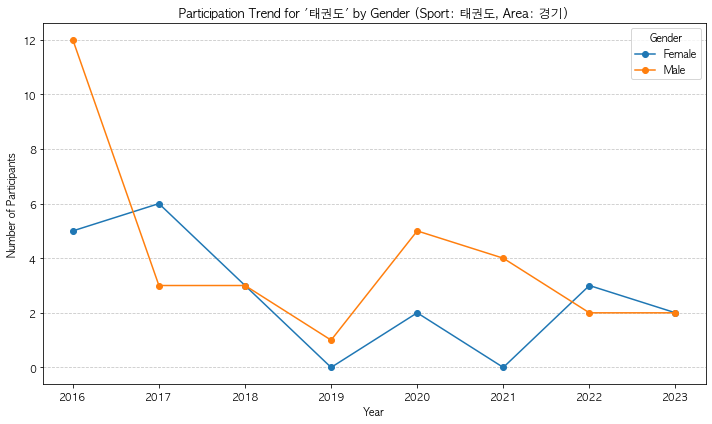

Trend Data for '태권도' by Gender (Sport: 태권도, Area: 경기):
gender  Female  Male
dyear               
2016         5    12
2017         6     3
2018         3     3
2019         0     1
2020         2     5
2021         0     4
2022         3     2
2023         2     2

--- Showing trend for '태권도' of '부산' ---


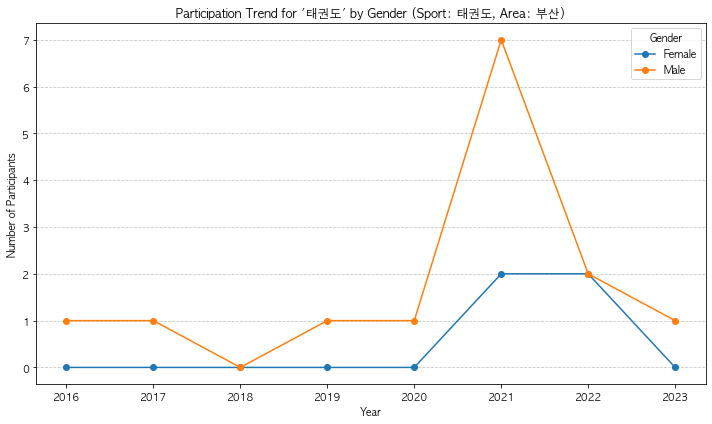

Trend Data for '태권도' by Gender (Sport: 태권도, Area: 부산):
gender  Female  Male
dyear               
2016         0     1
2017         0     1
2018         0     0
2019         0     1
2020         0     1
2021         2     7
2022         2     2
2023         0     1

--- Showing trend for '낚시' of '서울' ---


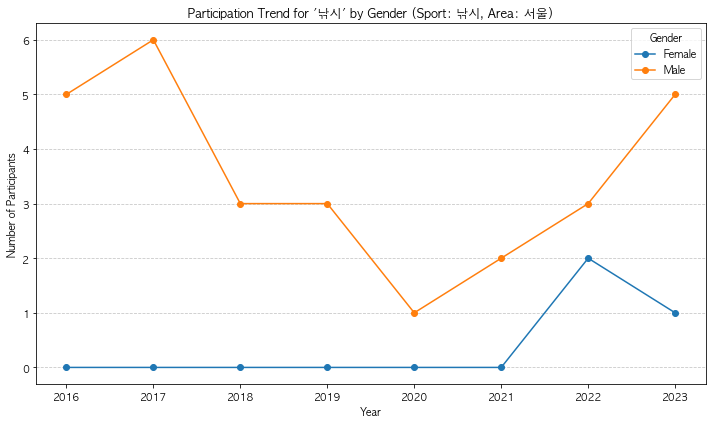

Trend Data for '낚시' by Gender (Sport: 낚시, Area: 서울):
gender  Female  Male
dyear               
2016         0     5
2017         0     6
2018         0     3
2019         0     3
2020         0     1
2021         0     2
2022         2     3
2023         1     5

--- Showing trend for '낚시' of '경기' ---


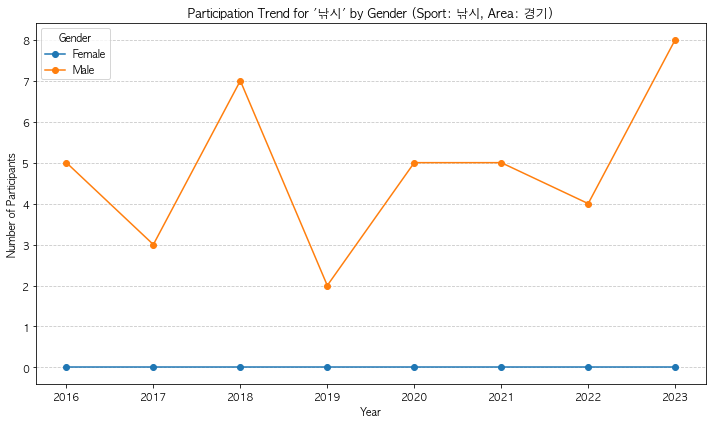

Trend Data for '낚시' by Gender (Sport: 낚시, Area: 경기):
gender  Female  Male
dyear               
2016         0     5
2017         0     3
2018         0     7
2019         0     2
2020         0     5
2021         0     5
2022         0     4
2023         0     8

--- Showing trend for '낚시' of '부산' ---


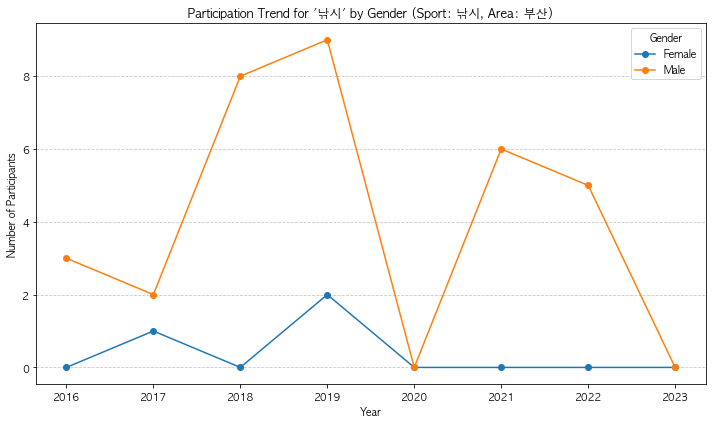

Trend Data for '낚시' by Gender (Sport: 낚시, Area: 부산):
gender  Female  Male
dyear               
2016         0     3
2017         1     2
2018         0     8
2019         2     9
2020         0     0
2021         0     6
2022         0     5
2023         0     0

--- Showing trend for '육상(걷기, 마라톤 제외)' of '서울' ---


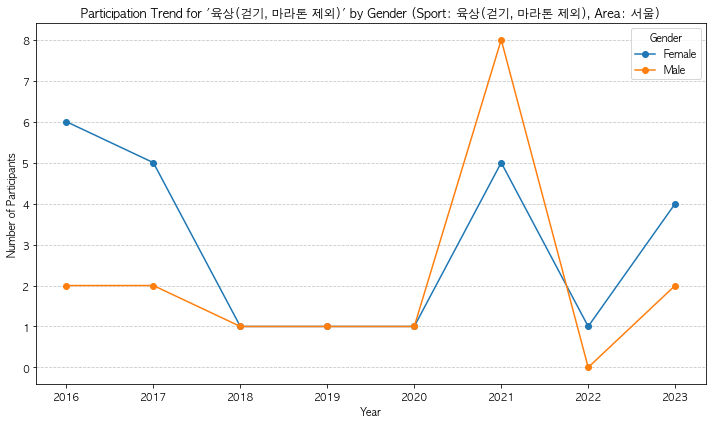

Trend Data for '육상(걷기, 마라톤 제외)' by Gender (Sport: 육상(걷기, 마라톤 제외), Area: 서울):
gender  Female  Male
dyear               
2016         6     2
2017         5     2
2018         1     1
2019         1     1
2020         1     1
2021         5     8
2022         1     0
2023         4     2

--- Showing trend for '육상(걷기, 마라톤 제외)' of '경기' ---


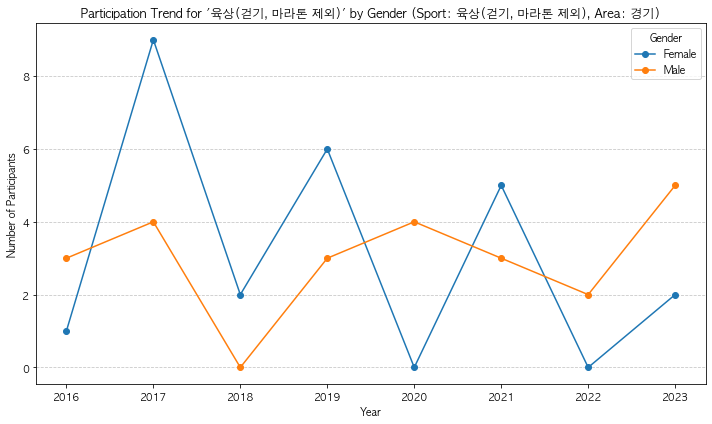

Trend Data for '육상(걷기, 마라톤 제외)' by Gender (Sport: 육상(걷기, 마라톤 제외), Area: 경기):
gender  Female  Male
dyear               
2016         1     3
2017         9     4
2018         2     0
2019         6     3
2020         0     4
2021         5     3
2022         0     2
2023         2     5

--- Showing trend for '육상(걷기, 마라톤 제외)' of '부산' ---


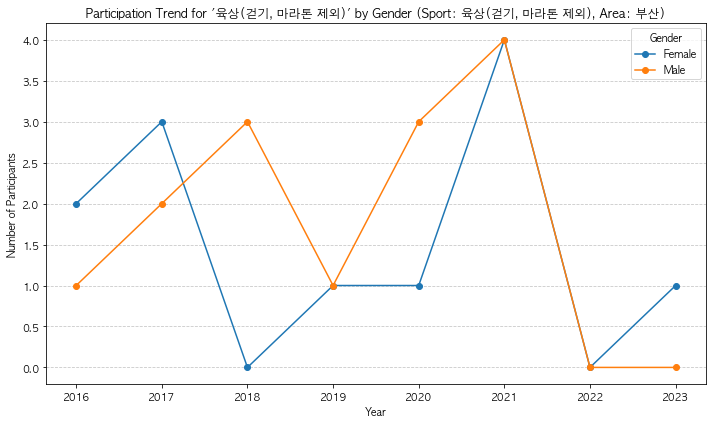

Trend Data for '육상(걷기, 마라톤 제외)' by Gender (Sport: 육상(걷기, 마라톤 제외), Area: 부산):
gender  Female  Male
dyear               
2016         2     1
2017         3     2
2018         0     3
2019         1     1
2020         1     3
2021         4     4
2022         0     0
2023         1     0


In [97]:
# Get the top 20 most frequent sports in the 'ksport' column
top_20_sports = df['ksport'].value_counts().head(20).index.tolist()

# Loop through each sport and call show_trend for 'cage'
for sport in top_20_sports:
    for area in ['서울','경기','부산']:
        print(f"\n--- Showing trend for '{sport}' of '{area}' ---")
        show_trend(df, filter_type='gender', ksport=sport, area=area)

## RQ: Prediction